# Create figures for scoping review

Import packages

In [1]:
# Import packages
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)
library(stringr)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE



Import all the data:

### META DATA


In [2]:
# Meta data
datMeta <- read.csv("tblStudyMeta.csv", header=T)
head(datMeta)

datMeta$species <- gsub("\\s+", "", datMeta$species)


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182477024 AS/SE      Fondjo      2020 Human   Ghana        Mother     
6 1182477025 AS/SE      Shamsi      2010 Human   Pakistan     Mother     
  studyScore
1 II        
2 III       
3 II        
4 II        
5 II        
6 III


### INFECTION DATA


In [3]:
# Infection data
datInf<-read.csv("tblStudyInfections.csv",header=T)
head(datInf)

studyRef   infectionType                   X X.1 X.2 X.3 X.4 X.5 X.6 X.7 X.8
1 1182475512 Bacterial infection                                              
2 1182475524 Inflammatory/immune reponse                                      
3 1182476286 Urinary/Genital Tract Infection                                  
4 1182476955 Urinary/Genital Tract Infection                                  
5 1182477024 Malaria                                                          
6 1182477025 Urinary/Genital Tract Infection

In [4]:
# long format with multiple infection types per study shown in multiple rows
datInf_long <- datInf %>%
  pivot_longer(cols = -studyRef, values_to = "infectionType") %>%
  mutate(infectionType = na_if(infectionType, "")) %>%
  filter(!is.na(infectionType))

#trim white space
datInf_long$infectionType <-trimws(datInf_long$infectionType)

In [5]:
# Categorise Infection data

#What are all the Infection types?
unique(datInf_long$infectionType)

## Table catagorising infection types
infection_lookup <- data.frame(
  Infection = c("HPV", "Yeast infection", "Sepsis", "Systemic infection", "Tuberculosis",
                "Toxoplasmosis", "Zika virus", "Autoimmune disorder", "Rubella immune status",
                "Herpes virus (HSV)", "Influenza", "Pyelonephritis (Kidney infection)", "Fever or cold",
                "Periodontal", "Group B streptococcus", "H. pylori infection", "Vaccine response",
                "Bacterial infection", "LPS injection", "C-reactive protein",
                "Unspecified maternal infection", "Hepatitis B/C", "Intra-amniotic/intra-uterine infection (chorioamnionitis)",
                "STI", "Respiratory infection", "Other", "Malaria", 
                "Parasitic infection (nematode/hookworm etc)", "HIV", "Covid-19", "Urinary/Genital Tract Infection",
                "Inflammatory/immune reponse"),
  InfCat = c("Viral", "Fungal", "Bacterial", "Unspecified Infection", "Bacterial",
             "Parasitic", "Viral", "Immune", "Viral",
             "Viral", "Viral", "Bacterial", "Unspecified Infection",
             "Unspecified Infection", "Bacterial", "Bacterial", "Immune",
             "Bacterial", "Immune", "Immune",
             "Unspecified Infection", "Viral", "Bacterial",
             "Bacterial", "Bacterial", "General", "Parasitic",
             "Parasitic", "Viral", "Viral", "Unspecified Infection", "Immune")
)

#Check that all the infection types have been categorised
setdiff(unique(datInf_long$infectionType), unique(infection_lookup$Infection))
setdiff(unique(infection_lookup$Infection), unique(datInf_long$infectionType))

#Create catagorised dataset
# Left join infection_lookup with datInf
datInfType_long <- merge(datInf_long, infection_lookup, by.x = "infectionType", by.y = "Infection", all.x = TRUE)
datInfType_long <- datInfType_long[,-3]
head(datInfType_long[order(datInfType_long$studyRef),])


[1] "Bacterial infection"                                      
 [2] "Inflammatory/immune reponse"                              
 [3] "Urinary/Genital Tract Infection"                          
 [4] "Malaria"                                                  
 [5] "Respiratory infection"                                    
 [6] "Fever or cold"                                            
 [7] "Other"                                                    
 [8] "Influenza"                                                
 [9] "Periodontal"                                              
[10] "Covid-19"                                                 
[11] "LPS injection"                                            
[12] "HIV"                                                      
[13] "Parasitic infection (nematode/hookworm etc)"              
[14] "H. pylori infection"                                      
[15] "Hepatitis B/C"                                            
[16] "STI"                                                      
[17] "Vaccine response"                                         
[18] "C-reactive protein"                                       
[19] "Intra-amniotic/intra-uterine infection (chorioamnionitis)"
[20] "Group B streptococcus"                                    
[21] "Toxoplasmosis"                                            
[22] "Herpes virus (HSV)"                                       
[23] "Rubella immune status"                                    
[24] "Unspecified maternal infection"                           
[25] "Pyelonephritis (Kidney infection)"                        
[26] "Zika virus"                                               
[27] "Sepsis"                                                   
[28] "Yeast infection"                                          
[29] "Autoimmune disorder"                                      
[30] "HPV"                                                      
[31] "Systemic infection"                                       
[32] "Tuberculosis"

character(0)

character(0)

infectionType                               studyRef   InfCat   
477 LPS injection                               1182475095 Immune   
275 Inflammatory/immune reponse                 1182475123 Immune   
630 Parasitic infection (nematode/hookworm etc) 1182475134 Parasitic
262 HIV                                         1182475144 Viral    
505 Malaria                                     1182475144 Parasitic
533 Malaria                                     1182475147 Parasitic


### NUTRITION DATA



In [6]:
datNut<-read.csv("tblStudyNutrition.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datNut_long <- datNut %>%
  pivot_longer(cols = -studyRef, values_to = "nutritionType") %>%
  mutate(nutritionType = na_if(nutritionType, "")) %>%
  filter(!is.na(nutritionType))

#trim white space
datNut_long$nutritionType <-trimws(datNut_long$nutritionType)



In [7]:
#What are all the nutritionTypes?
unique(datNut_long$nutritionType)

# add categorisation
# Lookup table with shortened category names

##Notes: 
#### Anaemia has been changed to a Clinical Indicator rather than Anthromometric
#### Minerals and Vitamins have been combined into Micronutrients
#### Because of the above combination we can now add Multivitamin/micronutrient supplement to Micronutrients. 

nutrient_lookup <- data.frame(
  Nutrition = c("Boron", "Phosphorus", "Magnesium", "Calcium", "Copper", "Selenium", "Zinc", "Iron",
                "Vitamin A", "Vitamin B2/B6/B12", "Vitamin C", "Vitamin D", "Vitamin E", "Folic acid",
                "Protein", "Fatty acids", "Fibre", "High fat diet",
                "Multivitamin/micronutrient supplement etc",
                "BMI", "Gestational weight gain", "Mid-upper arm circumference (MUAC)", "Anaemia",
                "Dietary diversity/change", "Other"),
  Category = c(
    "Micronutrients", "Micronutrients", "Micronutrients", "Micronutrients",
    "Micronutrients", "Micronutrients", "Micronutrients", "Micronutrients",
    
    "Micronutrients", "Micronutrients", "Micronutrients", "Micronutrients",
    "Micronutrients", "Micronutrients",
    
    "Macronutrients", "Macronutrients", "Macronutrients", "Macronutrients",
    
    "Micronutrients",
    
    "Anthropometrics", "Anthropometrics", "Anthropometrics", "Clinical Indicator",
    
    "Diet/Other", "Diet/Other"
  ),
  stringsAsFactors = FALSE
)



#Check that all the nutrition types have been categorised
setdiff(unique(datNut_long$nutritionType), unique(nutrient_lookup$Nutrition))
setdiff(unique(nutrient_lookup$Nutrition), unique(datNut_long$nutritionType))

#Create catagorised dataset
# Left join nutrient_lookup with datNut
datNutType_long <- merge(datNut_long, nutrient_lookup, by.x = "nutritionType", by.y = "Nutrition", all.x = TRUE)
datNutType_long <- datNutType_long[,-3] #remove "name" column
head(datNutType_long[order(datNutType_long$studyRef),])





[1] "BMI"                                      
 [2] "Dietary diversity/change"                 
 [3] "Anaemia"                                  
 [4] "Folic acid"                               
 [5] "Iron"                                     
 [6] "Mid-upper arm circumference (MUAC)"       
 [7] "Vitamin A"                                
 [8] "Other"                                    
 [9] "Vitamin B2/B6/B12"                        
[10] "Zinc"                                     
[11] "Vitamin D"                                
[12] "Vitamin C"                                
[13] "Magnesium"                                
[14] "Vitamin E"                                
[15] "Fatty acids"                              
[16] "Calcium"                                  
[17] "Copper"                                   
[18] "Boron"                                    
[19] "Protein"                                  
[20] "Multivitamin/micronutrient supplement etc"
[21] "High fat diet"                            
[22] "Gestational weight gain"                  
[23] "Selenium"                                 
[24] "Fibre"                                    
[25] "Phosphorus"

character(0)

character(0)

nutritionType studyRef   Category       
683 Iron          1182475095 Micronutrients 
82  BMI           1182475123 Anthropometrics
606 Folic acid    1182475134 Micronutrients 
680 Iron          1182475134 Micronutrients 
810 Other         1182475134 Diet/Other     
898 Vitamin A     1182475134 Micronutrients


### PREGNANCY OUTCOMES



In [8]:
## This data was collected as MaternalOutcomes and OffspringOutcomes. We will combine these data into a single PregnancyOutcome column


######## Maternal data
datMat<-read.csv("tblStudyMaternalOutcomes.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datMat_long <- datMat %>%
  pivot_longer(cols = -studyRef, values_to = "maternalOutcomeType") %>%
  mutate(maternalOutcomeType = na_if(maternalOutcomeType, "")) %>%
  filter(!is.na(maternalOutcomeType))

#trim white space
datMat_long$maternalOutcomeType <-trimws(datMat_long$maternalOutcomeType)
datMat_long <- datMat_long[,-2]

#Remove all "None" entries (~NA in our data)
datMat_long[datMat_long == "None"] <- NA
datMat_long <- na.omit(datMat_long)

#View data
head(datMat_long[order(datMat_long$studyRef),])

###### Offspring data
datOff<-read.csv("tblStudyOffspringOutcomes.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datOff_long <- datOff %>%
  pivot_longer(cols = -studyRef, values_to = "offspringOutcomeType") %>%
  mutate(offspringOutcomeType = na_if(offspringOutcomeType, "")) %>%
  filter(!is.na(offspringOutcomeType))

#trim white space
datOff_long$offspringOutcomeType <-trimws(datOff_long$offspringOutcomeType)
datOff_long <- datOff_long[,-2]

#Remove all "None" entries (~NA in our data)
datOff_long[datOff_long == "None"] <- NA
datOff_long <- na.omit(datOff_long)


#View data
head(datOff_long[order(datOff_long$studyRef),])
unique(datOff_long$offspringOutcomeType)

studyRef   maternalOutcomeType              
1 1182475095 Biomarkers of immunity - maternal
2 1182475123 Placental inflammation           
3 1182475123 Other - maternal                 
4 1182475134 Anaemia - maternal               
5 1182475144 Anaemia - maternal               
6 1182475147 Anaemia - maternal

studyRef   offspringOutcomeType            
1 1182475095 Behavioural change              
2 1182475159 Birth weight                    
3 1182475165 Birth weight                    
4 1182475165 Gestational age (Large or Small)
5 1182475165 Neonate length                  
6 1182475165 Head circumference

[1] "Birth weight"                       "Apgar score"                       
 [3] "Gestational age (Large or Small)"   "NICU admission"                    
 [5] "Other - offspring"                  "Gestational age (Days/Weeks)"      
 [7] "Cord blood pH"                      "Respiratory distress"              
 [9] "Congenital malformations"           "Congenital heart disease"          
[11] "Growth"                             "Macrosomia"                        
[13] "Foetal distress"                    "Neonatal death"                    
[15] "COVID status"                       "Behavioural change"                
[17] "Neonate length"                     "Head circumference"                
[19] "Cleft palate"                       "Microcephaly"                      
[21] "Gene expression - offspring"        "Language and motor development"    
[23] "Biomarkers of immunity - offspring" "Autism spectrum disorder"          
[25] "Motor development"                  "Neonatal encephalopathy"

In [9]:
# Combine the two datasets into a list of Pregnancy Outcomes. 
# use the PregnancyOutcomes lookup table to create a Pregnancy Outcomes variable df. 

#1. Rename columns to facilitate rbind
names(datOff_long)[2] <- "pregnancyOutcomeType"
names(datMat_long)[2] <- "pregnancyOutcomeType"

datPreg_long <- bind_rows(datOff_long, datMat_long)


# add categorisation
# Lookup table with shortened category names

##Notes: 
#### None means no data/NA


pregnancy_lookup <- data.frame(Pregnancy = c("Mode of delivery / caesarean section rate", "Maternal mortality", "Hypertension (pregnancy-induced)",
"Pre-eclampsia", "Anaemia - maternal", "Gestational diabetes", "Haemorrhage", "Hospitalisation or ICU admission", "Postterm pregnancy",
"Placental abruption", "Maternal mental health", "Cancer risk", "Venous thromboembolism / pulmonary embolism / deep vein thrombosis",
"Prolonged labour (labour dystocia)", "Hyperemesis gravidarum", "Ectopic pregnancy", "COVID status", 
"Stillbirth", "Miscarriage / spontaneous abortion",
"Perinatal mortality", "Neonatal death", "NICU admission", "Birth weight", "Gestational age (Large or Small)", "Gestational age (Days/Weeks)",
"Apgar score", "Cord blood pH", "Respiratory distress", "Congenital malformations", "Congenital heart disease", "Foetal distress", "Macrosomia",
"Intrauterine growth restriction (IUGR)", "Neonatal encephalopathy", "Cleft palate", "Microcephaly", "Neonate length", "Head circumference",
"Pre-term birth", "Pre-term pre-labour rupture of membranes (PPROM)", "PROM", "Placental inflammation", "Placental size", "Placental lesions",
"Parasite load", "Biomarkers of immunity - maternal", "Haemoglobin levels - maternal", "Gene expression - maternal", "DNA methylation - maternal", 
"Biomarkers of immunity - offspring", "Haemoglobin levels - offspring", "Gene expression - offspring", "DNA methylation - offspring", 
"Growth", "Language and motor development", "Motor development",
"Autism spectrum disorder", "Behavioural change", "Other - maternal", "Other - offspring", "None"),
Category = c(
rep("Maternal Outcomes", 17),
rep("Foetal and Neonatal Mortality", 4),
rep("Foetal and Neonatal Outcomes", 17),
rep("Pregnancy Complications", 3),
rep("Placental Pathology", 3),
rep("Maternal Molecular and Clinical Biomarkers", 5),
rep("Offspring Molecular and Clinical Biomarkers", 4),
rep("Developmental and Long-term Child Outcomes", 5),
rep("Other - maternal", 1),
rep("Other - offspring", 1),
rep("None", 1)
),
    stringsAsFactors = FALSE
)


In [10]:
#Check that all the pregnancy outcome types have been categorised
print("These terms appear in datPreg_long, but not in pregnancy_lookup:")
setdiff(unique(datPreg_long$pregnancyOutcomeType), unique(pregnancy_lookup$Pregnancy))
print("These terms appear in pregnancy_lookup, but not in datPreg_long:")
setdiff(unique(pregnancy_lookup$Pregnancy), unique(datPreg_long$pregnancyOutcomeType))

#Create catagorised dataset
# Left join nutrient_lookup with datNut
datPregType_long <- merge(datPreg_long, pregnancy_lookup, by.x = "pregnancyOutcomeType", by.y = "Pregnancy", all.x = TRUE)

head(datPregType_long[order(datPregType_long$studyRef),])

[1] "These terms appear in datPreg_long, but not in pregnancy_lookup:"


character(0)

[1] "These terms appear in pregnancy_lookup, but not in datPreg_long:"


[1] "Haemoglobin levels - offspring" "DNA methylation - offspring"   
[3] "None"

pregnancyOutcomeType              studyRef  
132  Behavioural change                1182475095
287  Biomarkers of immunity - maternal 1182475095
1628 Other - maternal                  1182475123
1967 Placental inflammation            1182475123
39   Anaemia - maternal                1182475134
21   Anaemia - maternal                1182475144
     Category                                  
132  Developmental and Long-term Child Outcomes
287  Maternal Molecular and Clinical Biomarkers
1628 Other - maternal                          
1967 Placental Pathology                       
39   Maternal Outcomes                         
21   Maternal Outcomes



# Full join pregnancy Outcome with Meta, Nutrition, and Infection

This creates one big table with all the input and output variables for a specific study. 



In [11]:
#List of all the dfs

dfs_list <- list(datMeta, datNutType_long, datInfType_long, datPregType_long)

# Full join all data frames by "studyRef"

datMetaNutInfPreg <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)
datMetaNutInfPreg <- rename(datMetaNutInfPreg, "NutCat" = "Category.x", "PregCat" = "Category.y")

#Create a speciesCat column
datMetaNutInfPreg <- datMetaNutInfPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

                            
head(datMetaNutInfPreg)
dim(datMetaNutInfPreg)

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore nutritionType NutCat          infectionType       InfCat   
1 II         BMI           Anthropometrics Bacterial infection Bacterial
2 II         BMI           Anthropometrics Bacterial infection Bacterial
3 II         BMI           Anthropometrics Bacterial infection Bacterial
4 II         BMI           Anthropometrics Bacterial infection Bacterial
5 II         BMI           Anthropometrics Bacterial infection Bacterial
6 II         BMI           Anthropometrics Bacterial infection Bacterial
  pregnancyOutcomeType                      PregCat                     
1 Apgar score                               Foetal and Neonatal Outcomes
2 Birth weight                              Foetal and Neonatal Outcomes
3 Maternal mortality                        Maternal Outcomes           
4 Mode of delivery / caesarean section rate Maternal Outcomes           
5 Other - maternal                          Other - maternal            
6 Pre-term birth                            Pregnancy Complications     
  speciesCat
1 Human     
2 Human     
3 Human     
4 Human     
5 Human     
6 Human

[1] 6465   15

# PLOTS 

## Maps

In [12]:
## Map Global 

## Add additional columns needed to datMeta
datMeta <- datMeta %>%
  mutate(
    species_grouped = ifelse(species == "Human", "Human", "Other"),
    studyScore = factor(studyScore, labels = c("Type I", "Type II", "Type III"))
  )

# Rename Gambia, The to Gambia.
# Need to do this here to avoid the name being treated as two different countries below
datMeta <- datMeta %>% mutate(countryStudy = recode(countryStudy, "Gambia, The" = "Gambia"))


### Human
# Step 1: Split multi-country entries into separate rows
datMeta_clean <- datMeta %>%
  separate_rows(countryStudy, sep = ",") %>%
  mutate(countryStudy = str_trim(countryStudy))

# Step 2: Apply country name mapping 
country_mapping <- c(
  "USA" = "United States",
  "UK" = "United Kingdom",
  "Republic of Korea (South Korea)" = "Dem. Rep. Korea",
  "Democratic Republic of the Congo" = "Dem. Rep. Congo"
)

datMeta_clean <- datMeta_clean %>%
  mutate(countryStudy = recode(countryStudy, !!!country_mapping))


# Filter for Human species
human_data <- datMeta_clean %>%
  filter(species_grouped == "Human")


# Count studies per country
study_counts <- human_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())


# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data <- world %>%
  left_join(study_counts, by = c("name" = "countryStudy"))


In [13]:
#Are there any countries that have not been mapped to the world data?
sort(setdiff(study_counts$countryStudy, world_data$name))

[1] "Multiple countries"

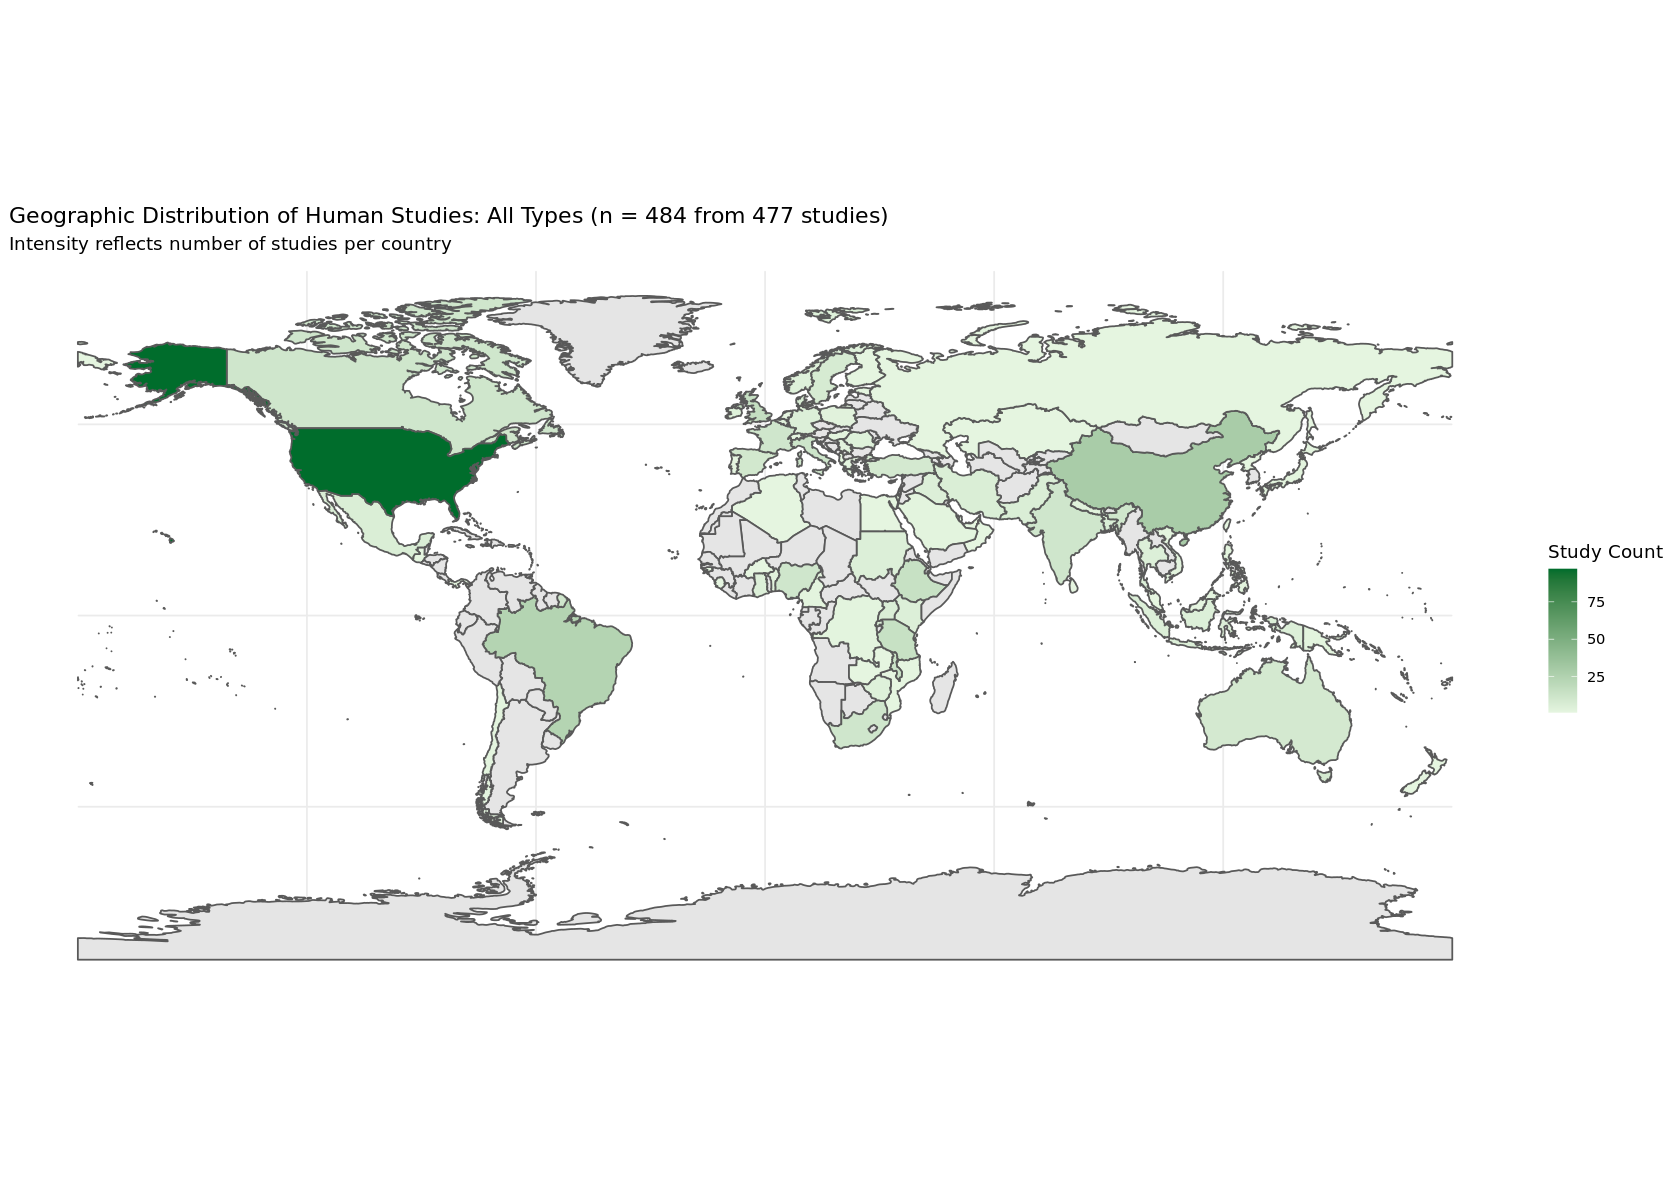

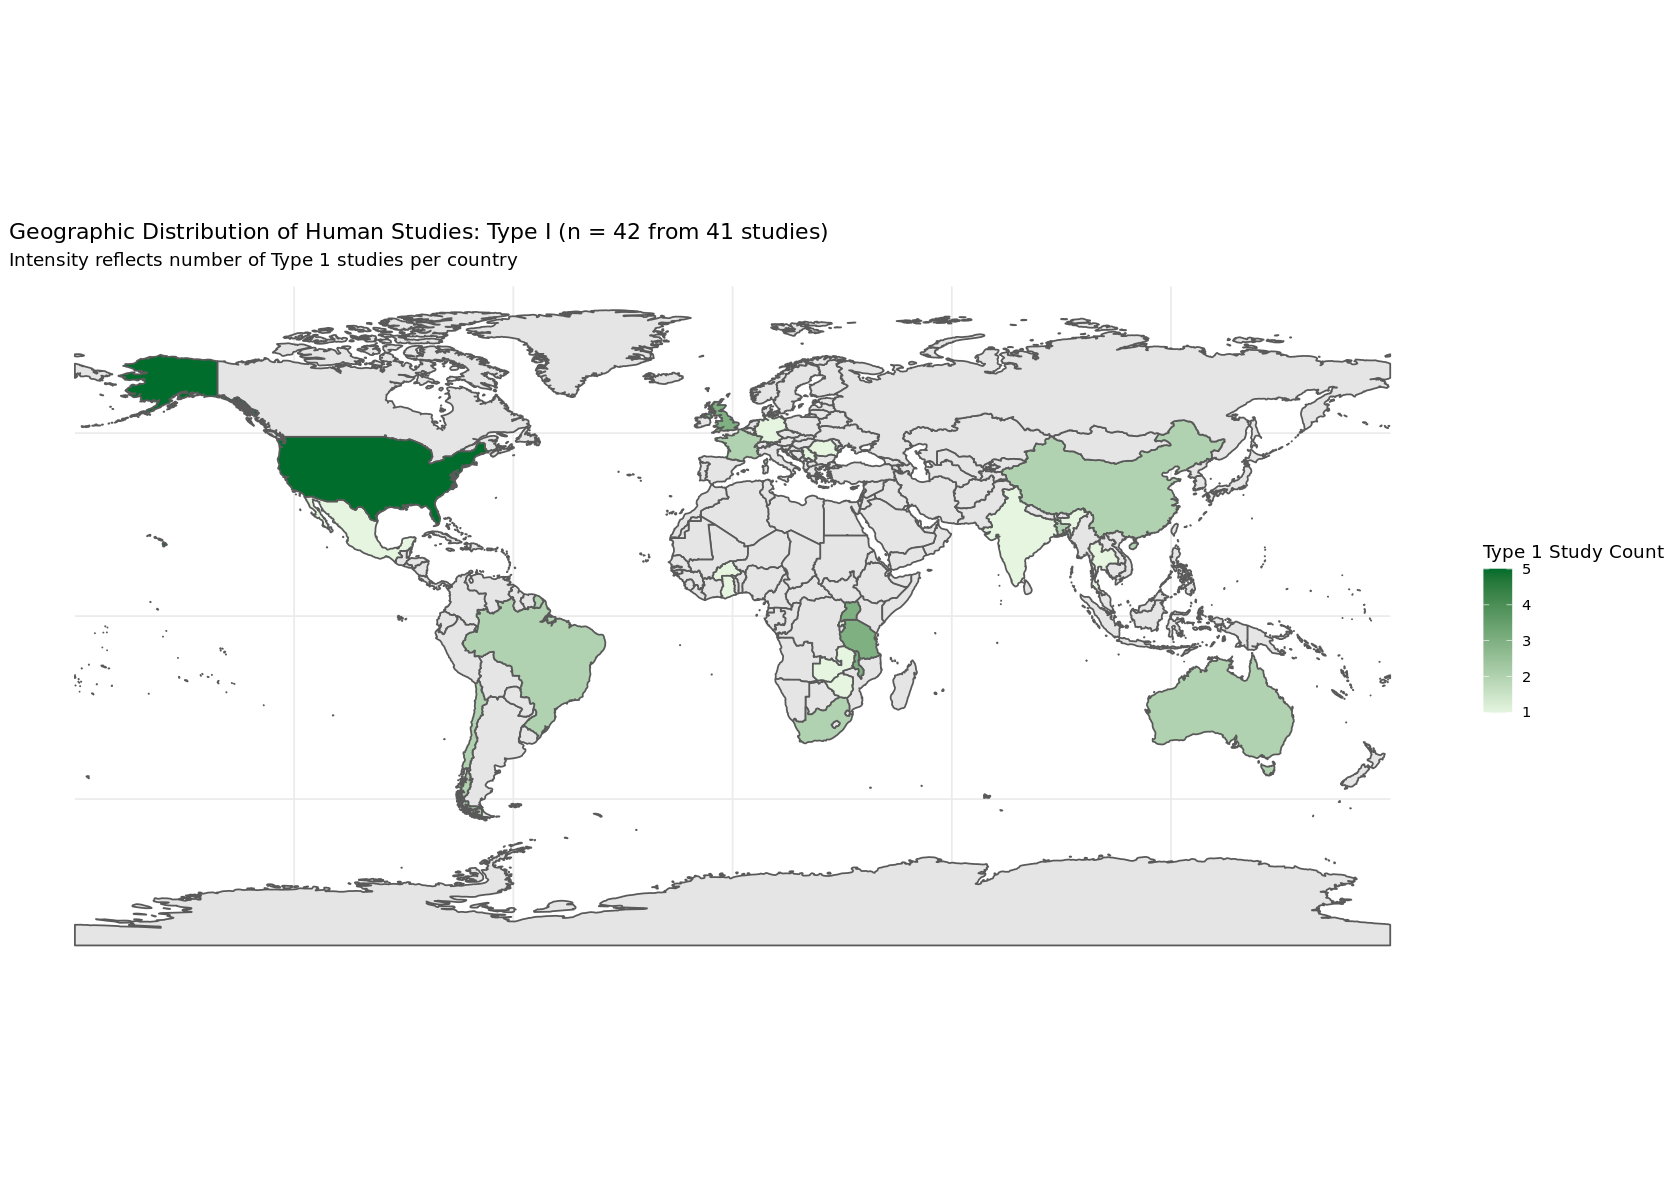

In [14]:
# Plot the map
options(repr.plot.width = 14, repr.plot.height = 10)

ggplot(data = world_data) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Study Count",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Human Studies: All Types (n = 484 from 477 studies)",
       subtitle = "Intensity reflects number of studies per country")

## Geographic map of type 1 studies only

options(repr.plot.width = 14, repr.plot.height = 10)

# Filter for Human species and Type 1 studies
human_type1_data <- datMeta_clean %>%
  filter(species_grouped == "Human", studyScore == "Type I")


# Count studies per country
study_counts_type1 <- human_type1_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())

# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data_type1 <- world %>%
  left_join(study_counts_type1, by = c("name" = "countryStudy"))

# Plot the map with green shades
ggplot(data = world_data_type1) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Type 1 Study Count",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Human Studies: Type I (n = 42 from 41 studies)",
       subtitle = "Intensity reflects number of Type 1 studies per country")



In [15]:
# Filter for Other species
other_data <- datMeta_clean %>%
  filter(species_grouped == "Other")

# Count studies per country
study_counts <- other_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())

# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data <- world %>%
  left_join(study_counts, by = c("name" = "countryStudy"))


In [16]:
#Are there any countries that have not been mapped to the world data?
sort(setdiff(study_counts$countryStudy, world_data$name))

character(0)

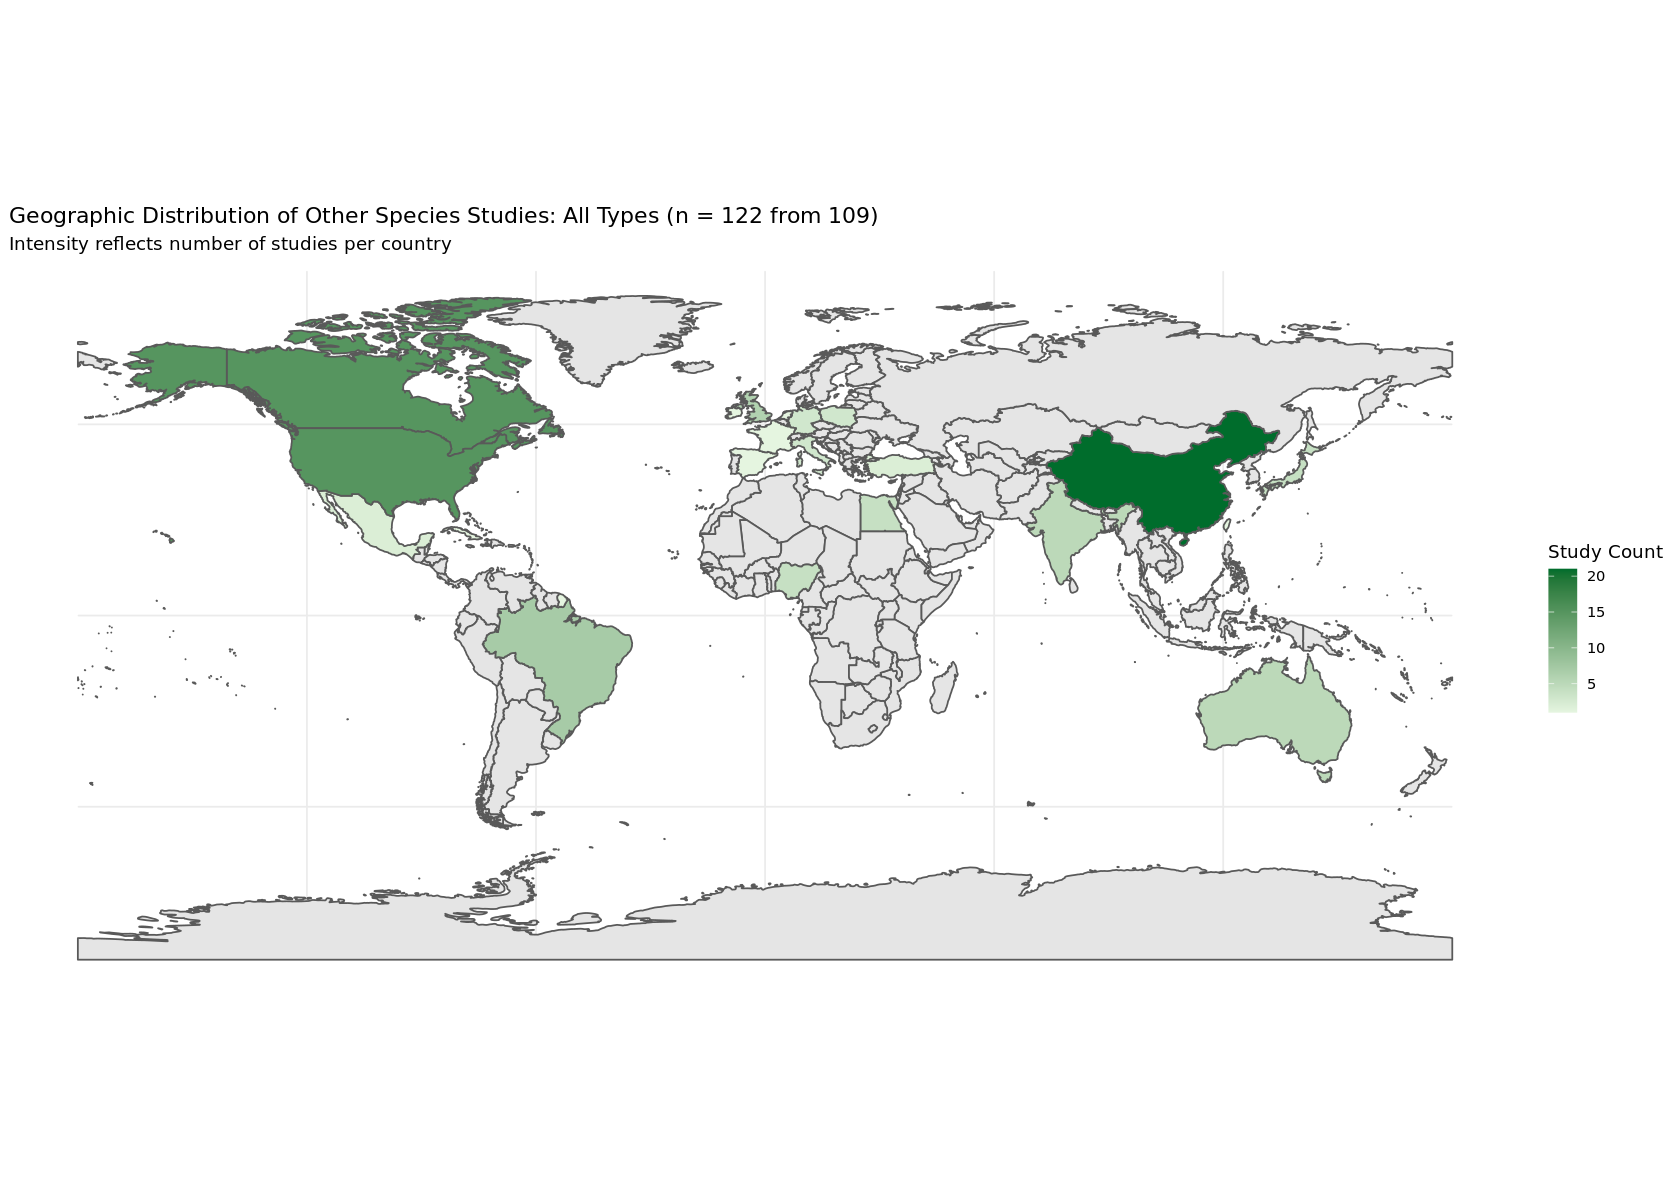

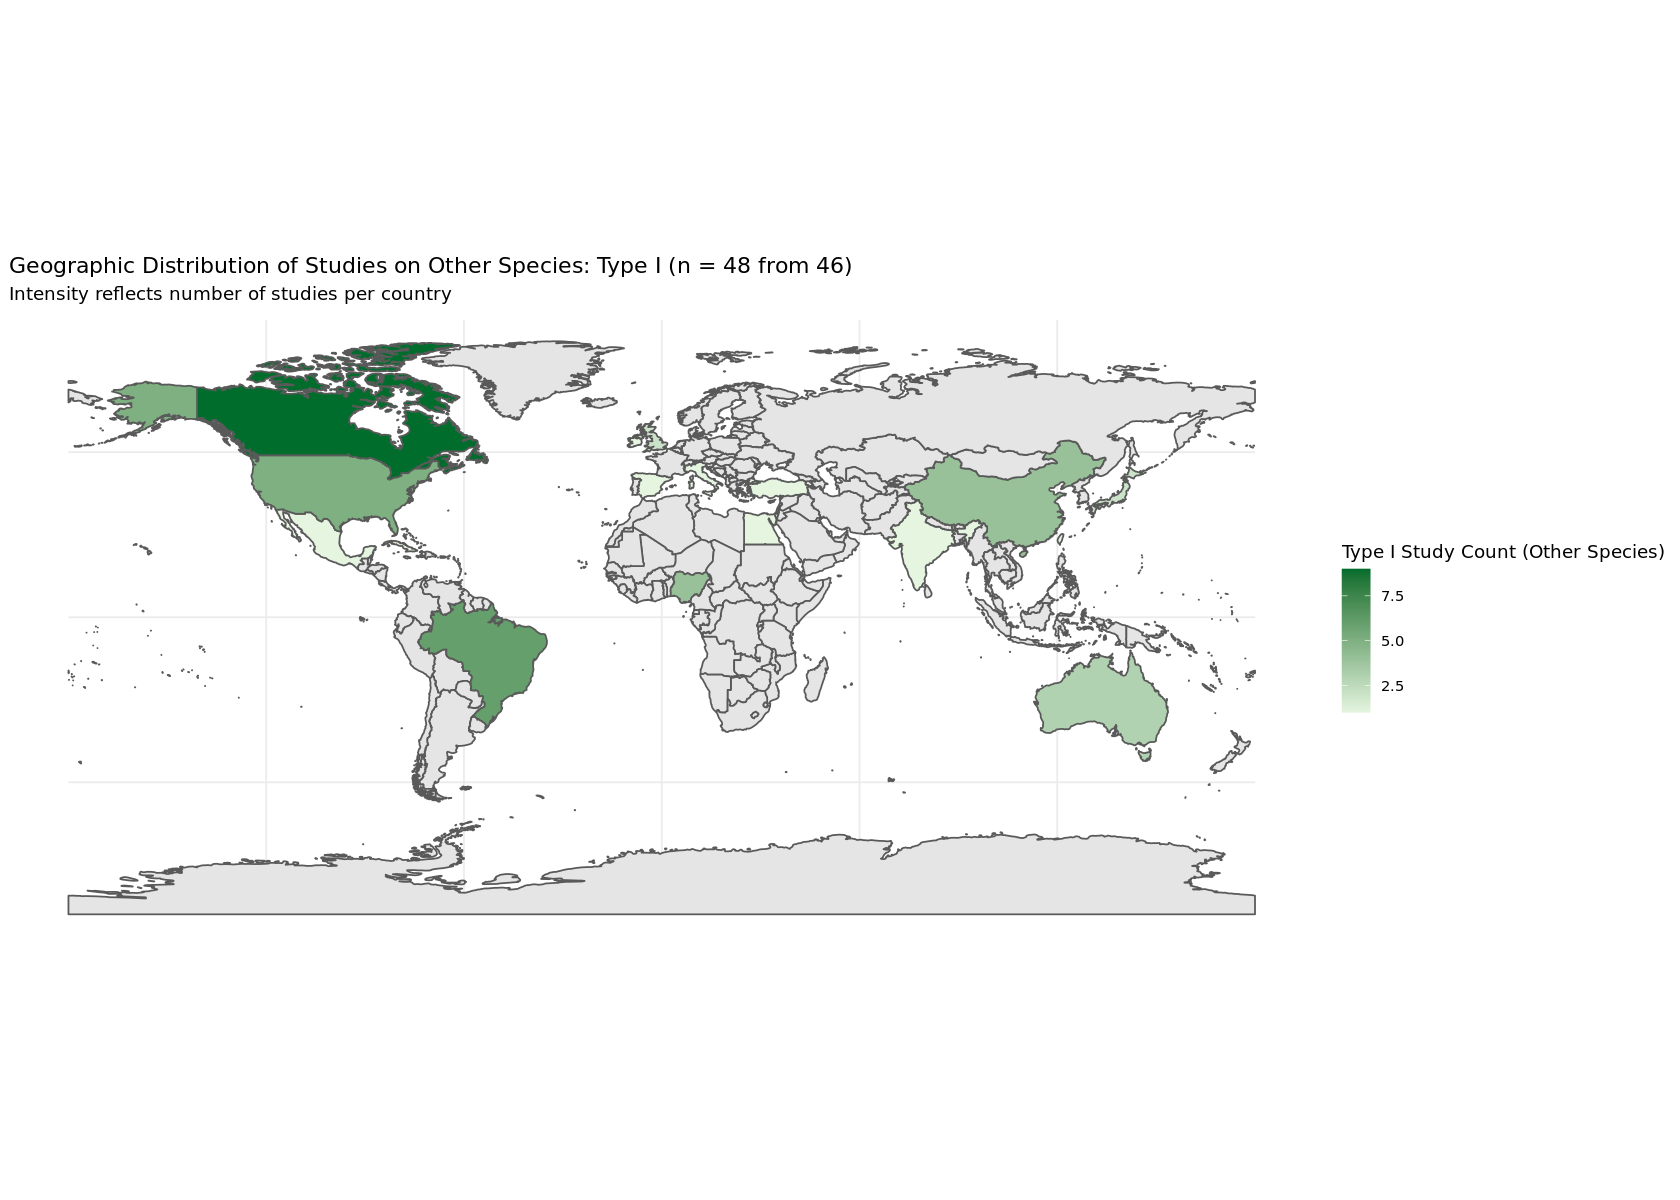

In [17]:
# Plot the map

options(repr.plot.width = 14, repr.plot.height = 10)


ggplot(data = world_data) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Study Count",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Other Species Studies: All Types (n = 122 from 109)",
       subtitle = "Intensity reflects number of studies per country")



## Geographic map of type 1 studies only

# Filter for Other species and Type I studies
other_type1_data <- datMeta_clean %>%
  filter(species_grouped == "Other", studyScore == "Type I")


# Count studies per country
study_counts <- other_type1_data %>%
  group_by(countryStudy) %>%
  summarise(study_count = n())

# Load world map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Merge with study counts
world_data <- world %>%
  left_join(study_counts, by = c("name" = "countryStudy"))

# Plot the map
ggplot(data = world_data) +
  geom_sf(aes(fill = study_count)) +
  scale_fill_gradient(name = "Type I Study Count (Other Species)",
                      low = "#e5f5e0", high = "#006d2c", na.value = "grey90") +
  theme_minimal() +
  labs(title = "Geographic Distribution of Studies on Other Species: Type I (n = 48 from 46)",
       subtitle = "Intensity reflects number of studies per country")


### Frequency of Terms within each data Type

#### Infection Frequencies:

In [18]:
#Step 1: Create a df based on datInfType_long (where multiple infections per study is listed in multiple lines) and Meta which lists eg species. 
#List of all the dfs

dfs_list <- list(datMeta, datInfType_long)

# Full join all data frames by "studyRef"

datMetaInf <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)

#Create a speciesCat column
datMetaInf <- datMetaInf %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

                            
head(datMetaInf)
dim(datMetaInf)
                    

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182477024 AS/SE      Fondjo      2020 Human   Ghana        Mother     
6 1182477025 AS/SE      Shamsi      2010 Human   Pakistan     Mother     
  studyScore species_grouped infectionType                  
1 Type II    Human           Bacterial infection            
2 Type III   Human           Inflammatory/immune reponse    
3 Type II    Human           Urinary/Genital Tract Infection
4 Type II    Human           Urinary/Genital Tract Infection
5 Type II    Human           Malaria                        
6 Type III   Human           Urinary/Genital Tract Infection
  InfCat                speciesCat
1 Bacterial             Human     
2 Immune                Human     
3 Unspecified Infection Human     
4 Unspecified Infection Human     
5 Parasitic             Human     
6 Unspecified Infection Human

[1] 899  12

infectionType      n InfCat               
1 HPV                2 Viral                
2 Yeast infection    2 Fungal               
3 Sepsis             3 Bacterial            
4 Systemic infection 3 Unspecified Infection
5 Tuberculosis       3 Bacterial            
6 Toxoplasmosis      4 Parasitic

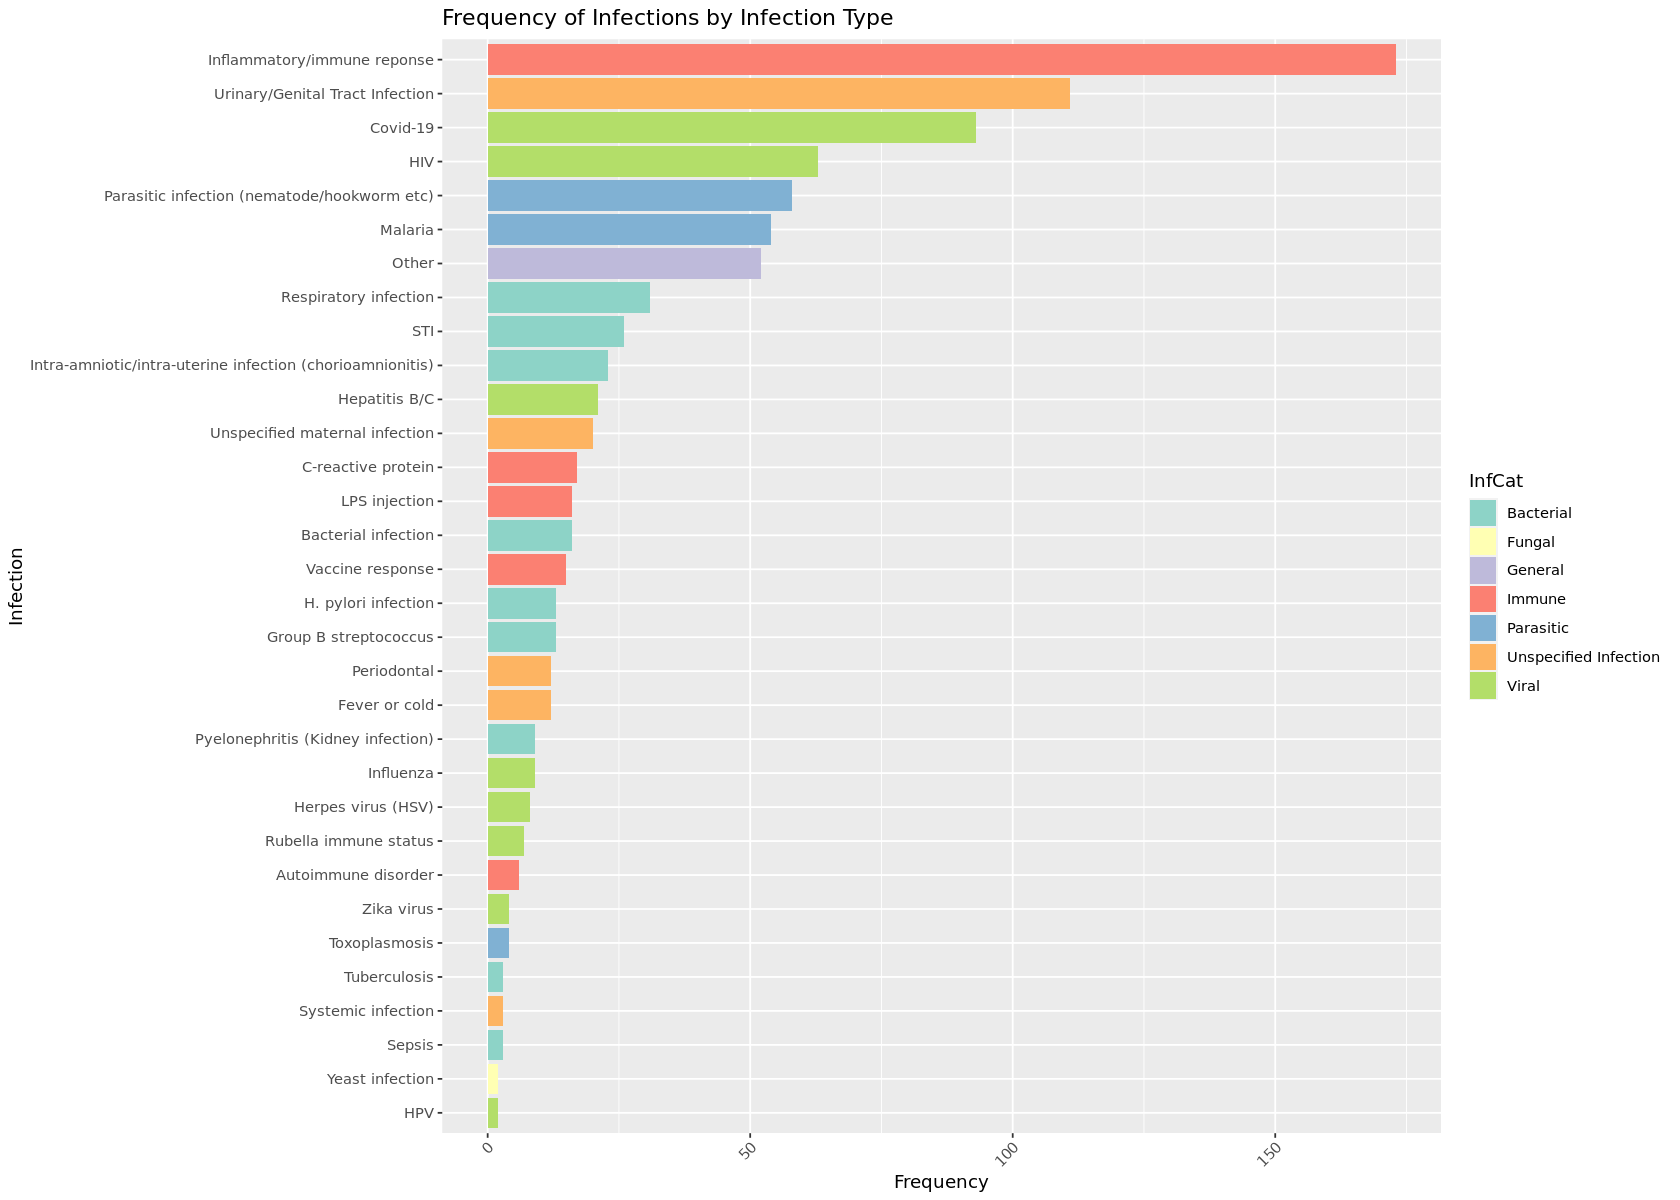

In [19]:
#Step 2: Create a df that counts the occurrence of each infection type


# 1: Count occurrences of each infection type
datMetaInf_cat <- datMetaInf %>%
    filter(infectionType != "") %>%
    count(infectionType) %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


# 2: Left join with the lookup table from before to add InfCat
datMetaInf_cat <- datMetaInf_cat %>% 
    left_join(infection_lookup %>% select(Infection, InfCat),
        by = c("infectionType" = "Infection"))


# 3: Ensure infectionType is ordered by frequency
datMetaInf_cat <- datMetaInf_cat %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


head(datMetaInf_cat)

# 4: Create a fixed colour fill for each of the categories in InfCat
# Get all unique InfCat levels combined from both datasets
all_infcat_levels <- sort(unique(datMetaInf$InfCat))

# Pick a palette with enough colors (max 12 colors for Set3)
palette_colors <- brewer.pal(n = max(3, length(all_infcat_levels)), name = "Set3")

# Assign colors named by InfCat levels
infcat_colors <- setNames(palette_colors[1:length(all_infcat_levels)], all_infcat_levels)


# 5: Draw the plot
ggplot(datMetaInf_cat, aes(x = infectionType, y = n, fill = InfCat)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Infections by Infection Type", x = "Infection", y = "Frequency") +
  scale_fill_manual(values = infcat_colors)


In [20]:
# Draw plots based on Humans/Other and Type I vs all studies:

#Step 1: Create a df based on datInfType_long for Humans only and for Humans Type I only. 
dfs_list <- list(datMeta, datInfType_long) # Full join all data frames by "studyRef" 

datMetaInf <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list) 

#Create a speciesCat column 
datMetaInf <- datMetaInf %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other")) 

#Filter Human data only 
datMetaInf_human <- datMetaInf %>% filter(speciesCat =="Human") 
dim(datMetaInf_human) 
head(datMetaInf_human) 

#Filter Human Type I data only 
datMetaInf_humanI <- datMetaInf %>% filter(speciesCat =="Human", studyScore =="Type I") 
dim(datMetaInf_humanI) 
head(datMetaInf_humanI)

#Filter Other data only
datMetaInf_other <- datMetaInf %>% filter(speciesCat =="Other") 
dim(datMetaInf_other) 
head(datMetaInf_other) 


#Filter Other Type I data only
datMetaInf_otherI <- datMetaInf %>% filter(speciesCat =="Other", studyScore =="Type I") 
dim(datMetaInf_otherI) 
head(datMetaInf_otherI)

[1] 782  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182477024 AS/SE      Fondjo      2020 Human   Ghana        Mother     
6 1182477025 AS/SE      Shamsi      2010 Human   Pakistan     Mother     
  studyScore species_grouped infectionType                  
1 Type II    Human           Bacterial infection            
2 Type III   Human           Inflammatory/immune reponse    
3 Type II    Human           Urinary/Genital Tract Infection
4 Type II    Human           Urinary/Genital Tract Infection
5 Type II    Human           Malaria                        
6 Type III   Human           Urinary/Genital Tract Infection
  InfCat                speciesCat
1 Bacterial             Human     
2 Immune                Human     
3 Unspecified Infection Human     
4 Unspecified Infection Human     
5 Parasitic             Human     
6 Unspecified Infection Human

[1] 71 12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
2 1182475279 AS         Muhangi     2007 Human   Uganda       Mother     
3 1182475279 AS         Muhangi     2007 Human   Uganda       Mother     
4 1182475279 AS         Muhangi     2007 Human   Uganda       Mother     
5 1182475345 AS         Clarke      2021 Human   Australia    Mother     
6 1182475379 AS         Citu        2022 Human   Romania      Mother     
  studyScore species_grouped infectionType                              
1 Type I     Human           Covid-19                                   
2 Type I     Human           HIV                                        
3 Type I     Human           Malaria                                    
4 Type I     Human           Parasitic infection (nematode/hookworm etc)
5 Type I     Human           Vaccine response                           
6 Type I     Human           Covid-19                                   
  InfCat    speciesCat
1 Viral     Human     
2 Viral     Human     
3 Parasitic Human     
4 Parasitic Human     
5 Immune    Human     
6 Viral     Human

[1] 117  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475276 AS         Chebel      2021 Cow     USA          Mother     
3 1182475318 AS         McGlone     2001 Pig     USA          Both       
4 1182475351 AS         Sharma      2020 Buffalo India        Mother     
5 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
6 1182475386 AS         Sebastiano  2017 Sheep   Ireland      Mother     
  studyScore species_grouped infectionType                              
1 Type I     Other           LPS injection                              
2 Type II    Other           Other                                      
3 Type III   Other           Inflammatory/immune reponse                
4 Type III   Other           Inflammatory/immune reponse                
5 Type I     Other           Parasitic infection (nematode/hookworm etc)
6 Type I     Other           Parasitic infection (nematode/hookworm etc)
  InfCat    speciesCat
1 Immune    Other     
2 General   Other     
3 Immune    Other     
4 Immune    Other     
5 Parasitic Other     
6 Parasitic Other

[1] 53 12

studyRef   assessedBy firstAuthor     year species    countryStudy
1 1182475095 AS         Harvey          2014 Rat        Canada      
2 1182475381 AS         Houdijk         2000 Sheep      UK          
3 1182475386 AS         Sebastiano      2017 Sheep      Ireland     
4 1182475571 AGD        Barbeito-Andres 2020 Human,Mice Brazil      
5 1182475774 AS         Harvey          2014 Rat        Canada      
6 1182475845 AS         Ren             2012 Mouse      China       
  mainOutcome studyScore species_grouped
1 Offspring   Type I     Other          
2 Both        Type I     Other          
3 Mother      Type I     Other          
4 Both        Type I     Other          
5 Both        Type I     Other          
6 Both        Type I     Other          
  infectionType                               InfCat    speciesCat
1 LPS injection                               Immune    Other     
2 Parasitic infection (nematode/hookworm etc) Parasitic Other     
3 Parasitic infection (nematode/hookworm etc) Parasitic Other     
4 Zika virus                                  Viral     Other     
5 LPS injection                               Immune    Other     
6 Other                                       General   Other

[1] 32  3

infectionType      n InfCat               
1 HPV                2 Viral                
2 Yeast infection    2 Fungal               
3 Sepsis             3 Bacterial            
4 Systemic infection 3 Unspecified Infection
5 Toxoplasmosis      3 Parasitic            
6 Tuberculosis       3 Bacterial

[1] 21  3

infectionType                     n InfCat   
1 Group B streptococcus             1 Bacterial
2 Hepatitis B/C                     1 Viral    
3 Pyelonephritis (Kidney infection) 1 Bacterial
4 Vaccine response                  1 Immune   
5 Zika virus                        1 Viral    
6 Bacterial infection               2 Bacterial

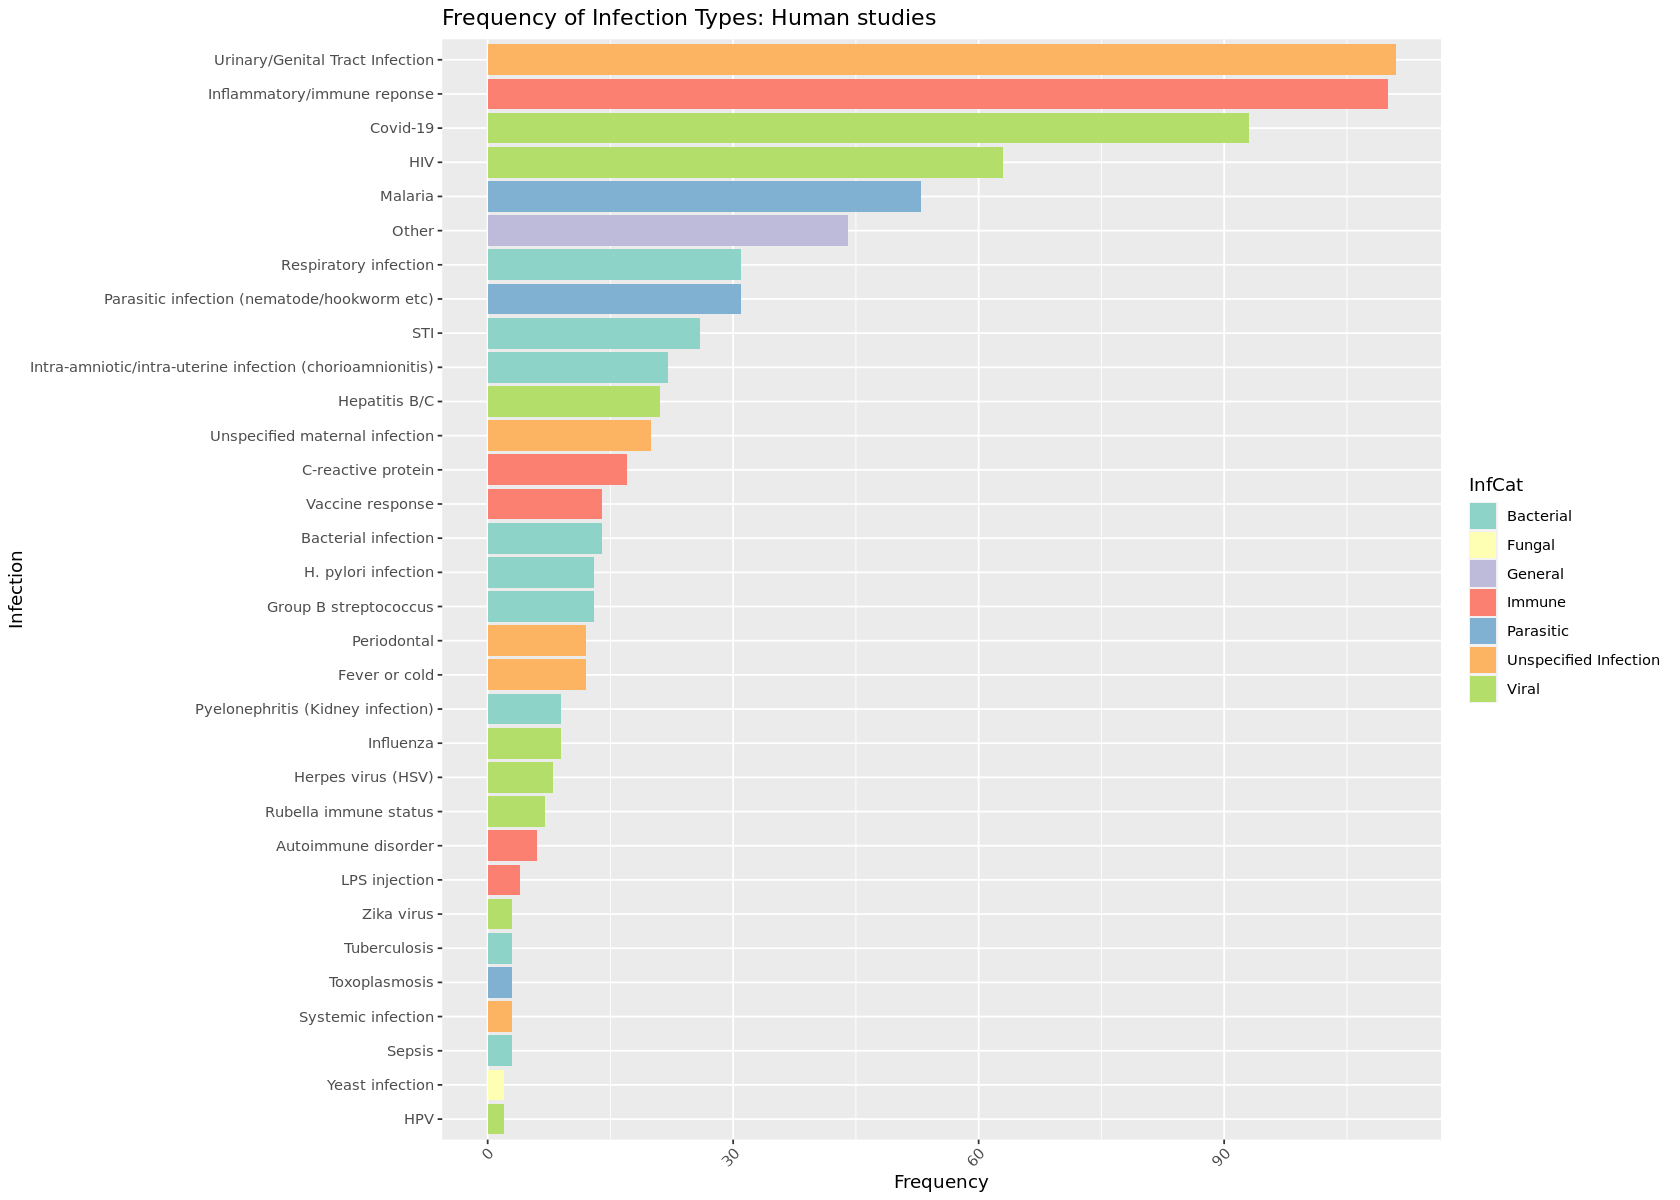

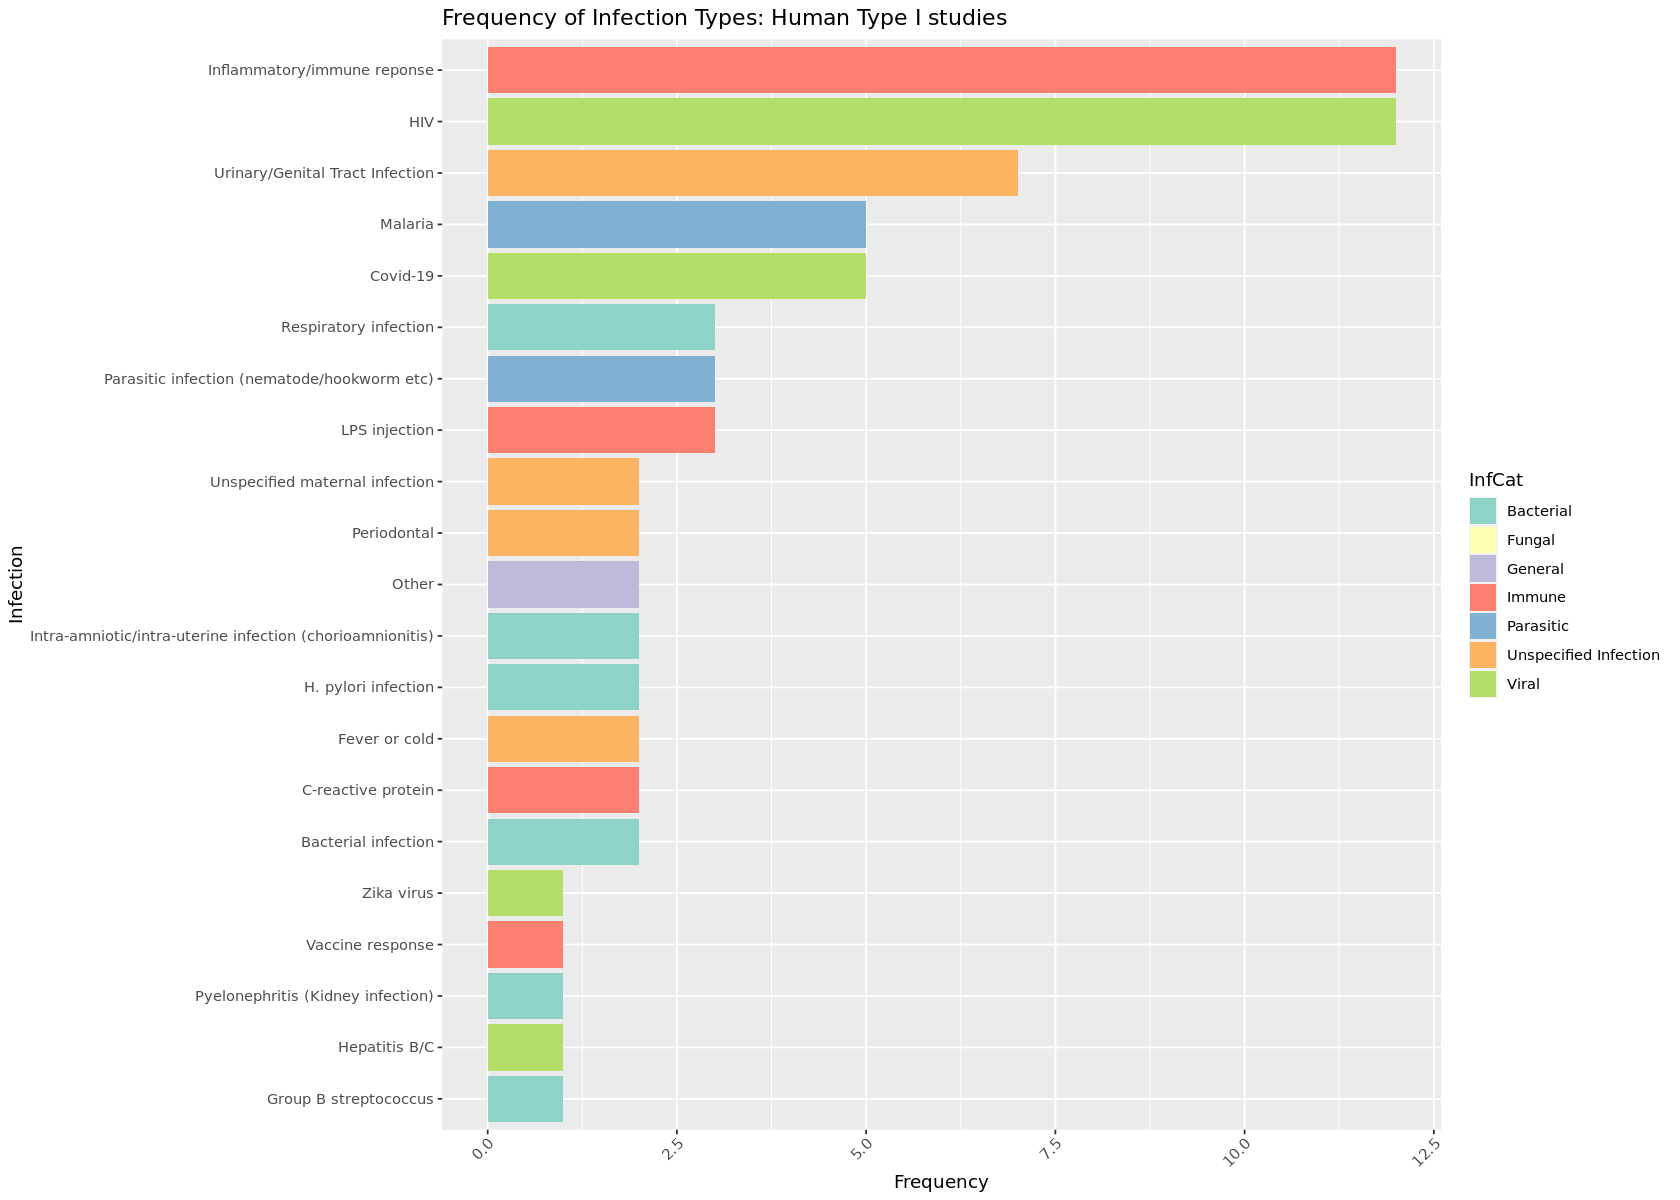

In [21]:
# Draw the figures

# 1: Count occurrences of each infection type
datMetaInf_human_cat <- datMetaInf_human %>%
    filter(infectionType != "") %>%
    count(infectionType) %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))

datMetaInf_humanI_cat <- datMetaInf_humanI %>%
    filter(infectionType != "") %>%
    count(infectionType) %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


# 2: Left join with the lookup table from before to add InfCat
datMetaInf_human_cat <- datMetaInf_human_cat %>% 
    left_join(infection_lookup %>% select(Infection, InfCat),
        by = c("infectionType" = "Infection"))

datMetaInf_humanI_cat <- datMetaInf_humanI_cat %>% 
    left_join(infection_lookup %>% select(Infection, InfCat),
        by = c("infectionType" = "Infection"))

# 3: Ensure infectionType is ordered by frequency
datMetaInf_human_cat <- datMetaInf_human_cat %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


datMetaInf_humanI_cat <- datMetaInf_humanI_cat %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))

dim(datMetaInf_human_cat)
head(datMetaInf_human_cat)

dim(datMetaInf_humanI_cat)
head(datMetaInf_humanI_cat)

# 4: Draw the plot

ggplot(datMetaInf_human_cat, aes(x = infectionType, y = n, fill = InfCat)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Infection Types: Human studies", x = "Infection", y = "Frequency") +
  scale_fill_manual(values = infcat_colors)

ggplot(datMetaInf_humanI_cat, aes(x = infectionType, y = n, fill = InfCat)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Infection Types: Human Type I studies", x = "Infection", y = "Frequency") +
  scale_fill_manual(values = infcat_colors)

[1] 10  3

infectionType                                             n InfCat   
1 Intra-amniotic/intra-uterine infection (chorioamnionitis) 1 Bacterial
2 Malaria                                                   1 Parasitic
3 Toxoplasmosis                                             1 Parasitic
4 Vaccine response                                          1 Immune   
5 Zika virus                                                1 Viral    
6 Bacterial infection                                       2 Bacterial

[1] 9 3

infectionType       n InfCat   
1 Malaria             1 Parasitic
2 Toxoplasmosis       1 Parasitic
3 Vaccine response    1 Immune   
4 Zika virus          1 Viral    
5 Bacterial infection 2 Bacterial
6 Other               4 General

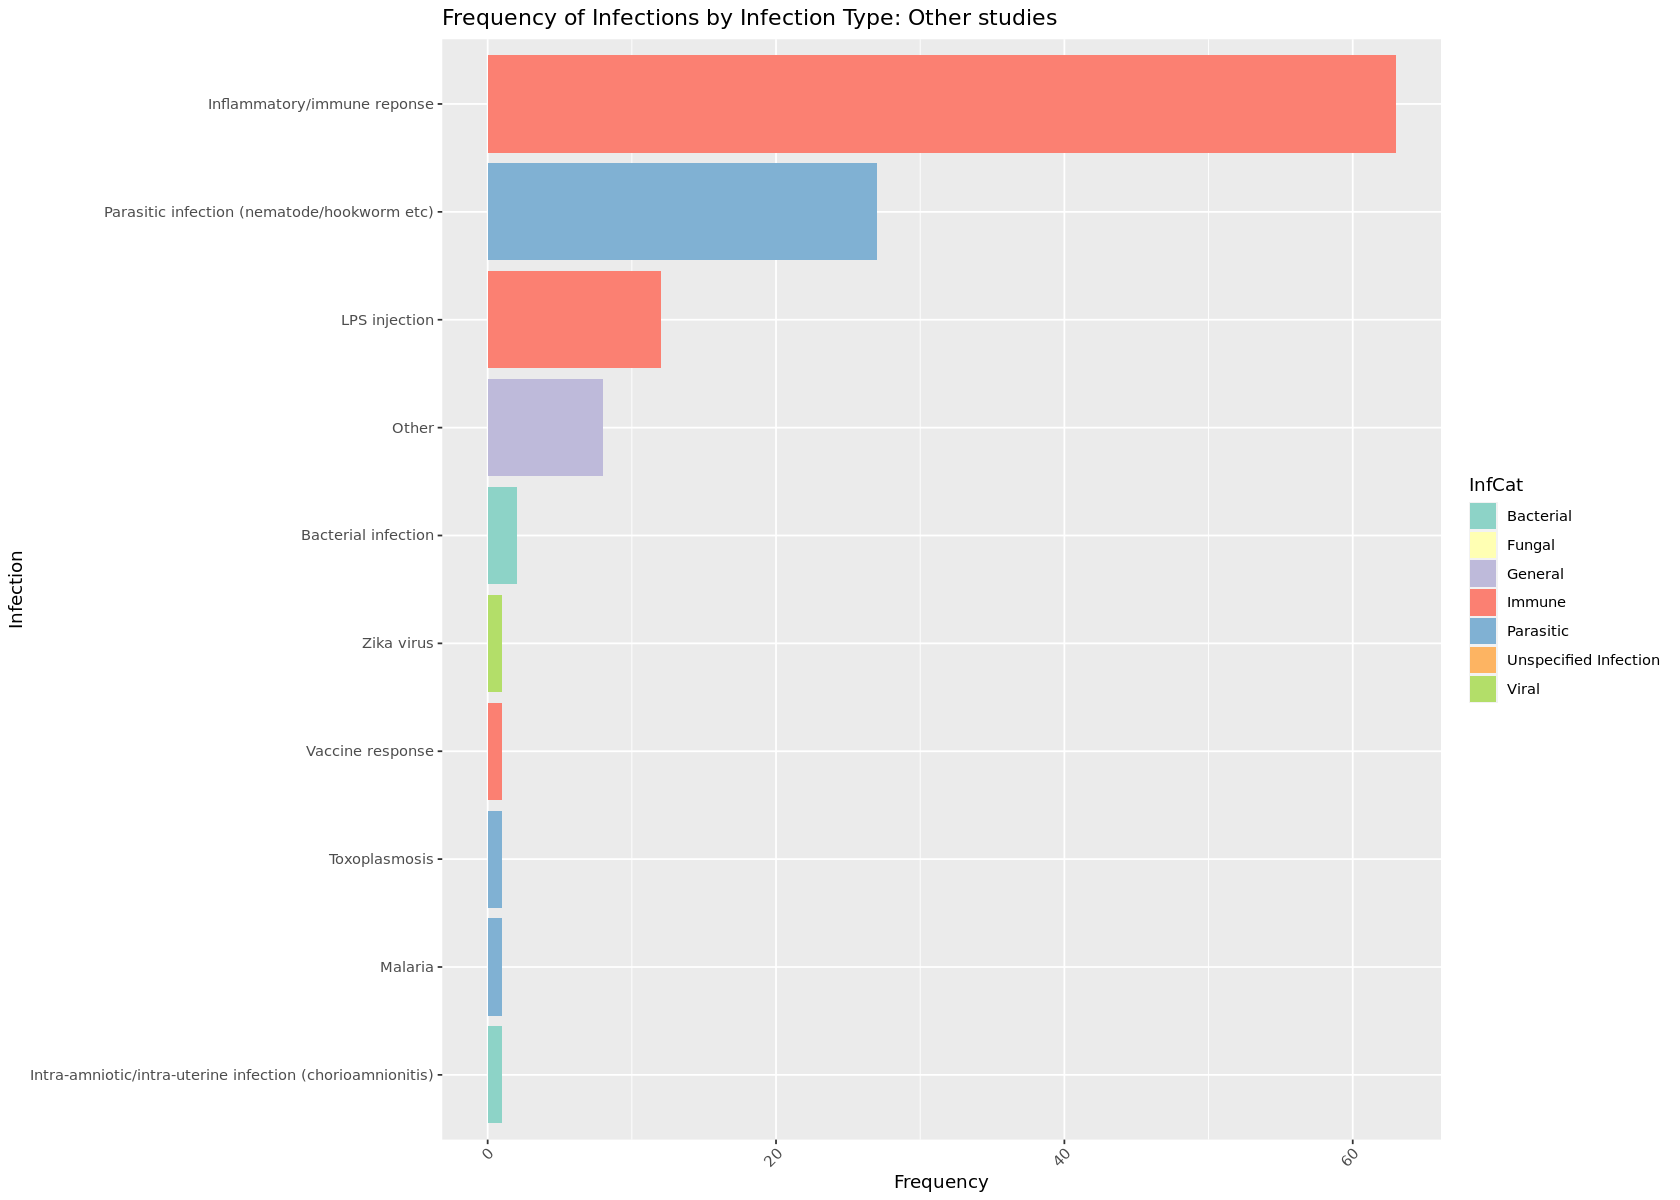

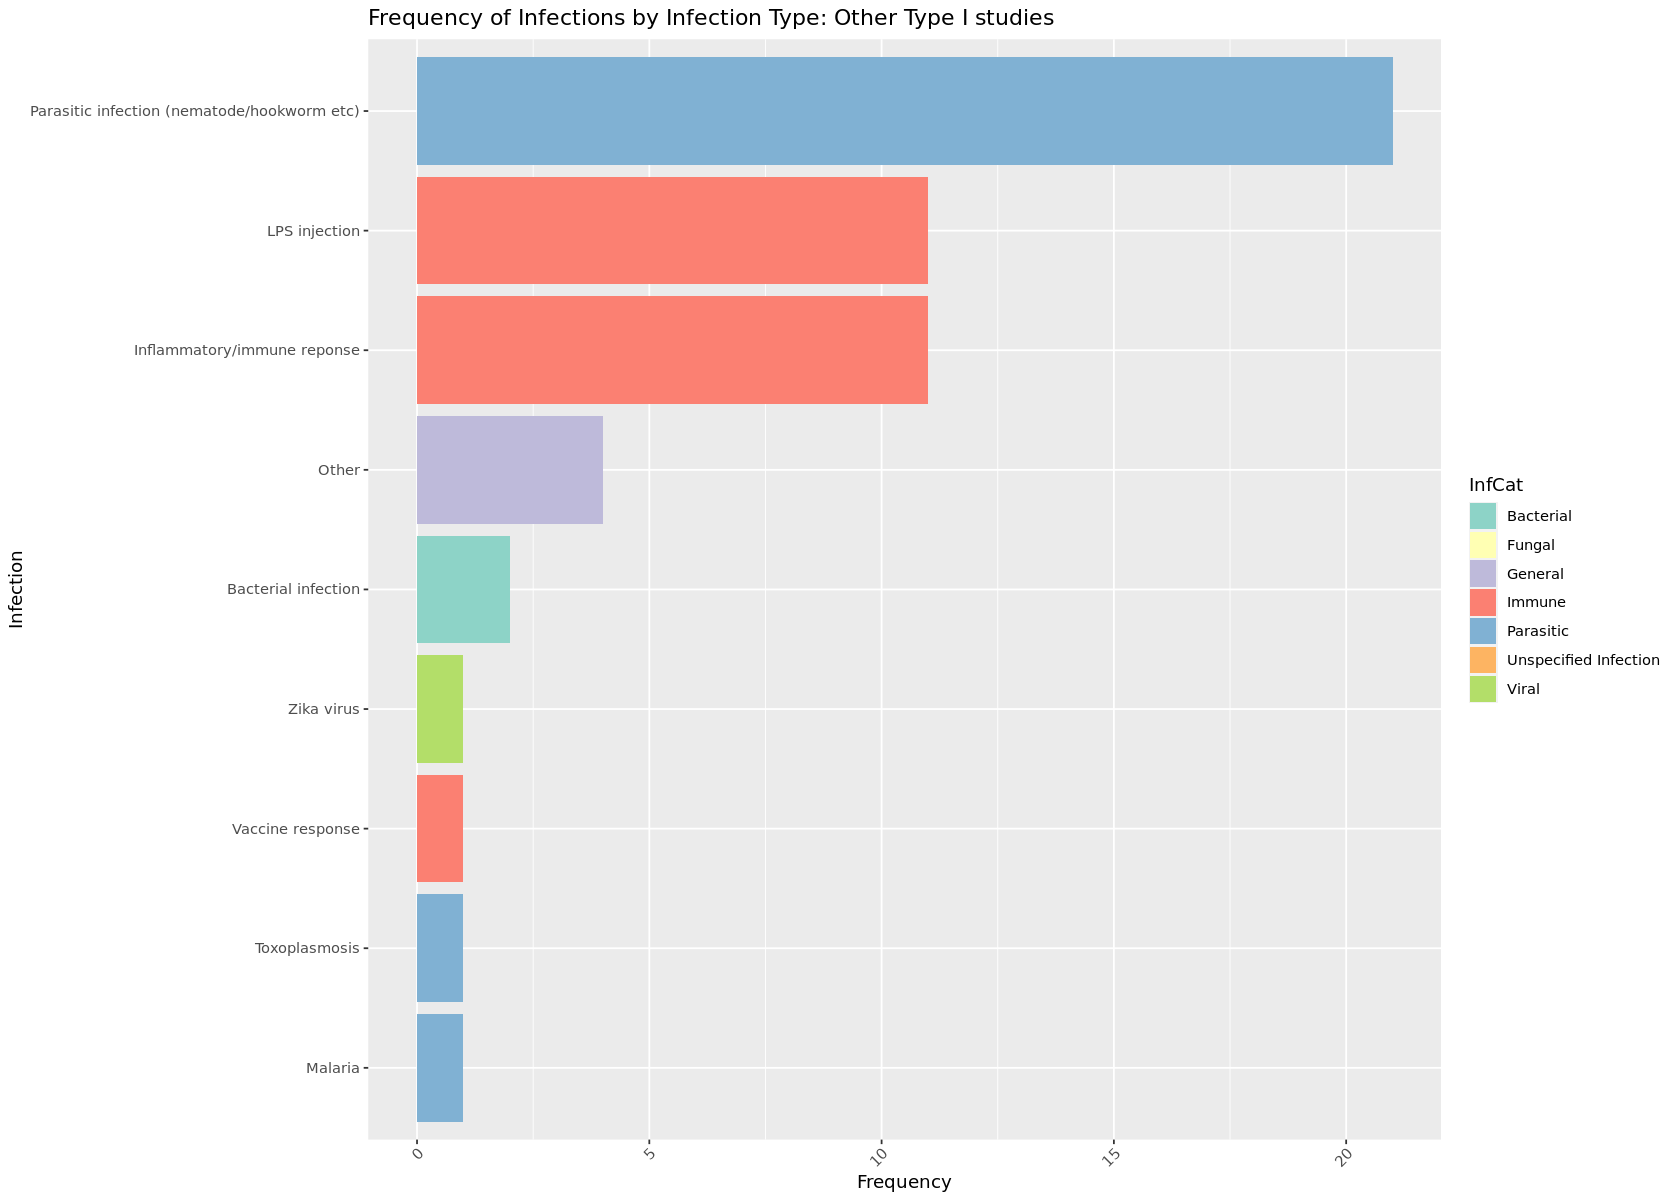

In [22]:
# Draw the figures

# 1: Count occurrences of each infection type
datMetaInf_other_cat <- datMetaInf_other %>%
    filter(infectionType != "") %>%
    count(infectionType) %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))

datMetaInf_otherI_cat <- datMetaInf_otherI %>%
    filter(infectionType != "") %>%
    count(infectionType) %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))


# 2: Left join with the lookup table from before to add InfCat
datMetaInf_other_cat <- datMetaInf_other_cat %>% 
    left_join(infection_lookup %>% select(Infection, InfCat),
        by = c("infectionType" = "Infection"))

datMetaInf_otherI_cat <- datMetaInf_otherI_cat %>% 
    left_join(infection_lookup %>% select(Infection, InfCat),
        by = c("infectionType" = "Infection"))

# 3: Ensure infectionType is ordered by frequency
datMetaInf_other_cat <- datMetaInf_other_cat %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))

datMetaInf_otherI_cat <- datMetaInf_otherI_cat %>%
    arrange(n) %>%
    mutate(infectionType = factor(infectionType, levels = infectionType))

dim(datMetaInf_other_cat)
head(datMetaInf_other_cat)

dim(datMetaInf_otherI_cat)
head(datMetaInf_otherI_cat)

# 4: Draw the plot

ggplot(datMetaInf_other_cat, aes(x = infectionType, y = n, fill = InfCat)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Infections by Infection Type: Other studies", x = "Infection", y = "Frequency") +
  scale_fill_manual(values = infcat_colors)

ggplot(datMetaInf_otherI_cat, aes(x = infectionType, y = n, fill = InfCat)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Infections by Infection Type: Other Type I studies", x = "Infection", y = "Frequency") +
  scale_fill_manual(values = infcat_colors)


#### Nutrition frequencies: 

In [23]:
#Step 1: Create a df based on datNutType_long (where multiple nutrients per study is listed in multiple lines) and Meta which lists eg species. 
#List of all the dfs

dfs_list <- list(datMeta, datNutType_long)

# Full join all data frames by "studyRef"

datMetaNut <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)

#Create a speciesCat column
datMetaNut <- datMetaNut %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

                            
head(datMetaNut)
dim(datMetaNut)
                  


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
6 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
  studyScore species_grouped nutritionType            Category       
1 Type II    Human           BMI                      Anthropometrics
2 Type III   Human           BMI                      Anthropometrics
3 Type II    Human           BMI                      Anthropometrics
4 Type II    Human           Dietary diversity/change Diet/Other     
5 Type II    Human           BMI                      Anthropometrics
6 Type II    Human           Dietary diversity/change Diet/Other     
  speciesCat
1 Human     
2 Human     
3 Human     
4 Human     
5 Human     
6 Human

[1] 990  12

nutritionType n Category      
1 Boron         1 Micronutrients
2 Fibre         1 Macronutrients
3 Phosphorus    1 Micronutrients
4 Magnesium     2 Micronutrients
5 Calcium       8 Micronutrients
6 High fat diet 8 Macronutrients

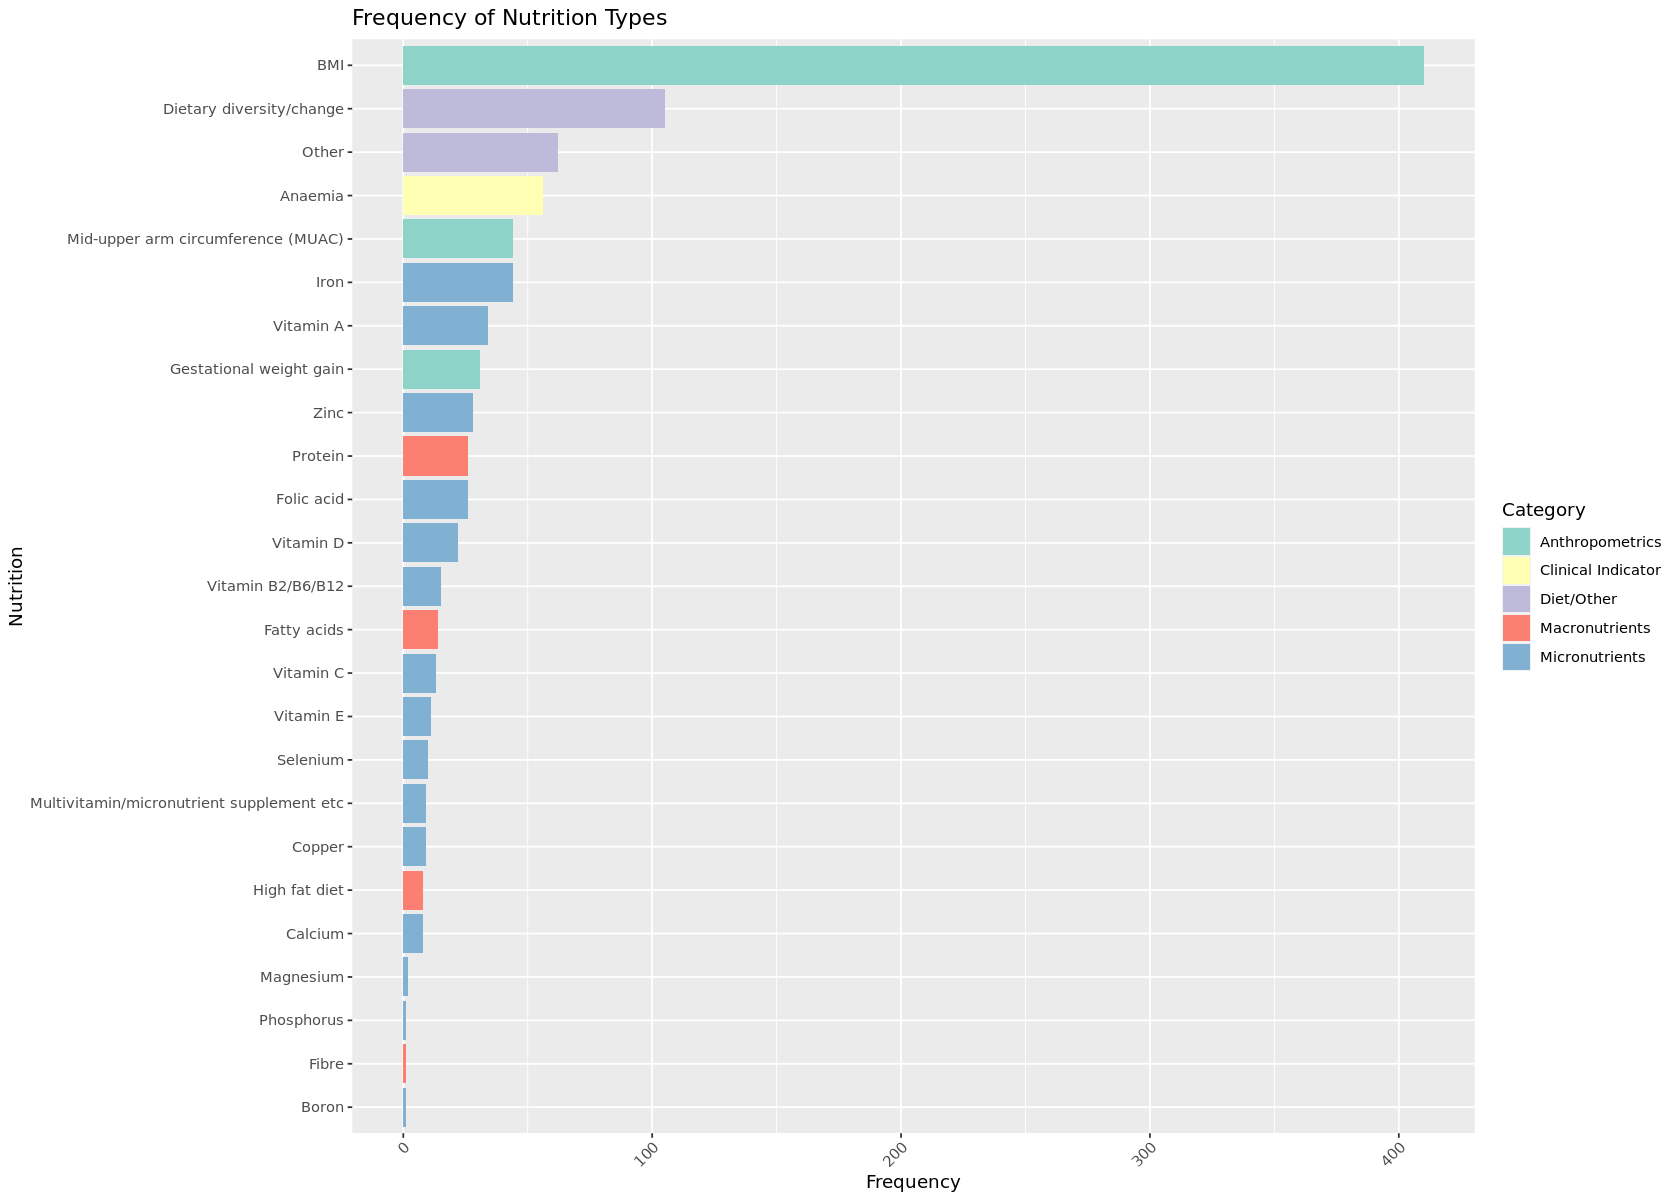

In [24]:
#Step 2: Create a df that counts the occurrence of each Nutrition type


# 1: Count occurrences of each nutrient type
datMetaNut_cat <- datMetaNut %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


# 2: Left join with the lookup table from before to add InfCat
datMetaNut_cat <- datMetaNut_cat %>% 
    left_join(nutrient_lookup %>% select(Nutrition, Category),
        by = c("nutritionType" = "Nutrition"))


# 3: Ensure infectionType is ordered by frequency
datMetaNut_cat <- datMetaNut_cat %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


head(datMetaNut_cat)

# 4: Create a fixed colour fill for each of the categories in InfCat
# Get all unique InfCat levels combined from both datasets
all_nutcat_levels <- sort(unique(datMetaNut$Category))

# Pick a palette with enough colors (max 12 colors for Set3)
palette_colors <- brewer.pal(n = max(3, length(all_nutcat_levels)), name = "Set3")

# Assign colors named by InfCat levels
nutcat_colors <- setNames(palette_colors[1:length(all_nutcat_levels)], all_nutcat_levels)


# 5: Draw the plot
ggplot(datMetaNut_cat, aes(x = nutritionType, y = n, fill = Category)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Nutrition Types", x = "Nutrition", y = "Frequency") +
  scale_fill_manual(values = nutcat_colors)

nutritionType n  Category      
1 Boron          2 Micronutrients
2 Fibre          2 Macronutrients
3 Magnesium      2 Micronutrients
4 Phosphorus     3 Micronutrients
5 Calcium       31 Micronutrients
6 Selenium      32 Micronutrients

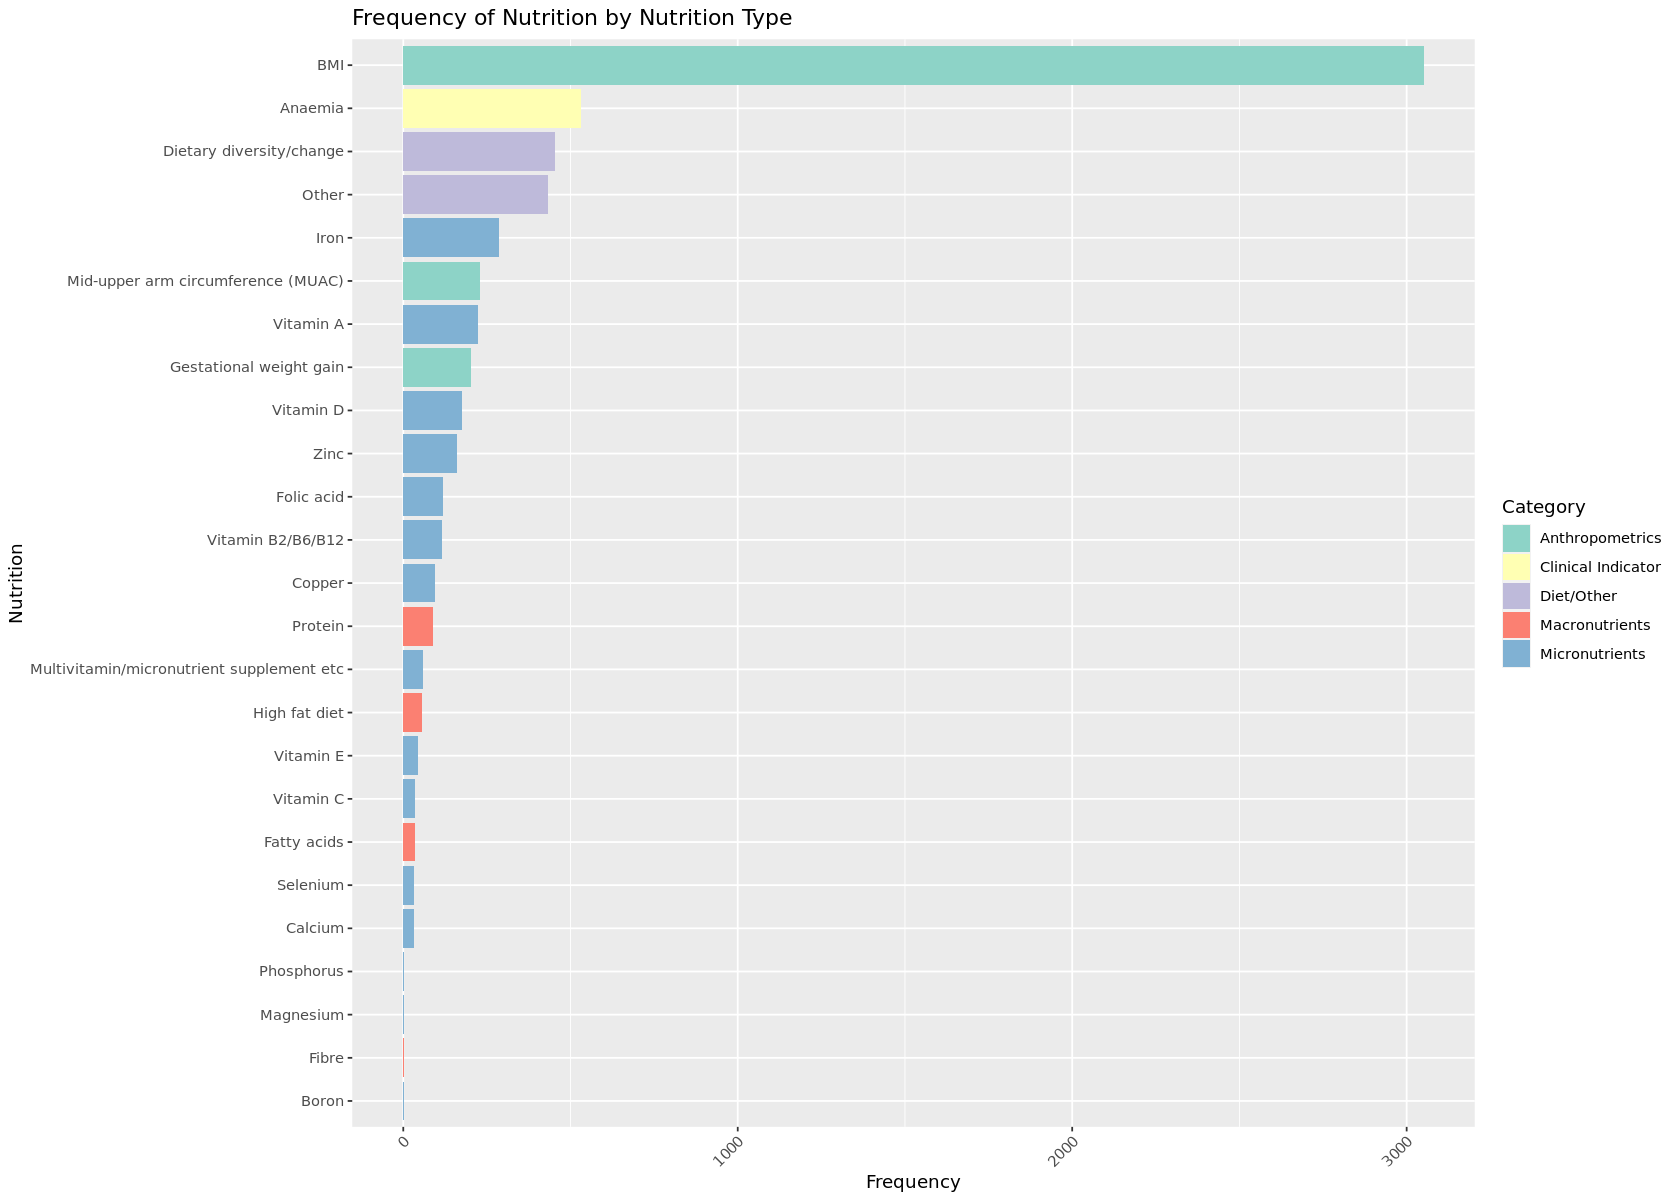

In [25]:
#Create a df that counts the occurrence of each nutrition type

# Step 1: Count occurrences of each nutrition type
datNut <- datMetaNutInfPreg %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


# Step2: Left join with the lookup table from before to add NutCat
datNut <- datNut %>% 
    left_join(nutrient_lookup %>% select(Nutrition, Category),
        by = c("nutritionType" = "Nutrition"))


# Step 3: Ensure infectionType is ordered by frequency
datNut <- datNut %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


head(datNut)

# Step 4: Draw the plot
ggplot(datNut, aes(x = nutritionType, y = n, fill = Category)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Nutrition by Nutrition Type", x = "Nutrition", y = "Frequency") +
  scale_fill_brewer(palette = "Set3")


##### Nutrient Frequencies: Human/Other and Human/Other Type I studies only

In [26]:
# Draw plots based on Humans/Other and Type I vs all studies:

#Step 1: Create a df based on datNutType_long for Humans only and for Humans Type I only. 
dfs_list <- list(datMeta, datNutType_long) # Full join all data frames by "studyRef" 

datMetaNut <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list) 

#Create a speciesCat column 
datMetaNut <- datMetaNut %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other")) 

#Filter Human data only 
datMetaNut_human <- datMetaNut %>% filter(speciesCat =="Human") 
dim(datMetaNut_human) 
head(datMetaNut_human) 

#Filter Human Type I data only 
datMetaNut_humanI <- datMetaNut %>% filter(speciesCat =="Human", studyScore =="Type I") 
dim(datMetaNut_humanI) 
head(datMetaNut_humanI)

#Filter Other data only
datMetaNut_other <- datMetaNut %>% filter(speciesCat =="Other") 
dim(datMetaNut_other) 
head(datMetaNut_other) 


#Filter Other Type I data only
datMetaNut_otherI <- datMetaNut %>% filter(speciesCat =="Other", studyScore =="Type I") 
dim(datMetaNut_otherI) 
head(datMetaNut_otherI)

[1] 840  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475524 AS/SE      Cox         2019 Human   Belgium      Both       
3 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
4 1182476286 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
5 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
6 1182476955 AS/SE      Assaf-Balut 2019 Human   Spain        Both       
  studyScore species_grouped nutritionType            Category       
1 Type II    Human           BMI                      Anthropometrics
2 Type III   Human           BMI                      Anthropometrics
3 Type II    Human           BMI                      Anthropometrics
4 Type II    Human           Dietary diversity/change Diet/Other     
5 Type II    Human           BMI                      Anthropometrics
6 Type II    Human           Dietary diversity/change Diet/Other     
  speciesCat
1 Human     
2 Human     
3 Human     
4 Human     
5 Human     
6 Human

[1] 110  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
2 1182475279 AS         Muhangi     2007 Human   Uganda       Mother     
3 1182475345 AS         Clarke      2021 Human   Australia    Mother     
4 1182475379 AS         Citu        2022 Human   Romania      Mother     
5 1182475379 AS         Citu        2022 Human   Romania      Mother     
6 1182475379 AS         Citu        2022 Human   Romania      Mother     
  studyScore species_grouped nutritionType Category           speciesCat
1 Type I     Human           BMI           Anthropometrics    Human     
2 Type I     Human           Anaemia       Clinical Indicator Human     
3 Type I     Human           BMI           Anthropometrics    Human     
4 Type I     Human           Calcium       Micronutrients     Human     
5 Type I     Human           Magnesium     Micronutrients     Human     
6 Type I     Human           Zinc          Micronutrients     Human

[1] 150  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475276 AS         Chebel      2021 Cow     USA          Mother     
3 1182475318 AS         McGlone     2001 Pig     USA          Both       
4 1182475351 AS         Sharma      2020 Buffalo India        Mother     
5 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
6 1182475386 AS         Sebastiano  2017 Sheep   Ireland      Mother     
  studyScore species_grouped nutritionType            Category       speciesCat
1 Type I     Other           Iron                     Micronutrients Other     
2 Type II    Other           Dietary diversity/change Diet/Other     Other     
3 Type III   Other           Dietary diversity/change Diet/Other     Other     
4 Type III   Other           Boron                    Micronutrients Other     
5 Type I     Other           Protein                  Macronutrients Other     
6 Type I     Other           Protein                  Macronutrients Other

[1] 57 12

studyRef   assessedBy firstAuthor     year species    countryStudy
1 1182475095 AS         Harvey          2014 Rat        Canada      
2 1182475381 AS         Houdijk         2000 Sheep      UK          
3 1182475386 AS         Sebastiano      2017 Sheep      Ireland     
4 1182475571 AGD        Barbeito-Andres 2020 Human,Mice Brazil      
5 1182475571 AGD        Barbeito-Andres 2020 Human,Mice Brazil      
6 1182475774 AS         Harvey          2014 Rat        Canada      
  mainOutcome studyScore species_grouped nutritionType           
1 Offspring   Type I     Other           Iron                    
2 Both        Type I     Other           Protein                 
3 Mother      Type I     Other           Protein                 
4 Both        Type I     Other           Dietary diversity/change
5 Both        Type I     Other           Protein                 
6 Both        Type I     Other           Iron                    
  Category       speciesCat
1 Micronutrients Other     
2 Macronutrients Other     
3 Macronutrients Other     
4 Diet/Other     Other     
5 Macronutrients Other     
6 Micronutrients Other

[1] 23  3

nutritionType n Category      
1 Fibre         1 Macronutrients
2 High fat diet 1 Macronutrients
3 Magnesium     2 Micronutrients
4 Selenium      3 Micronutrients
5 Protein       4 Macronutrients
6 Copper        6 Micronutrients

[1] 21  3

nutritionType            n Category      
1 Calcium                  1 Micronutrients
2 Copper                   1 Micronutrients
3 Fatty acids              1 Macronutrients
4 Magnesium                1 Micronutrients
5 Selenium                 1 Micronutrients
6 Dietary diversity/change 2 Diet/Other

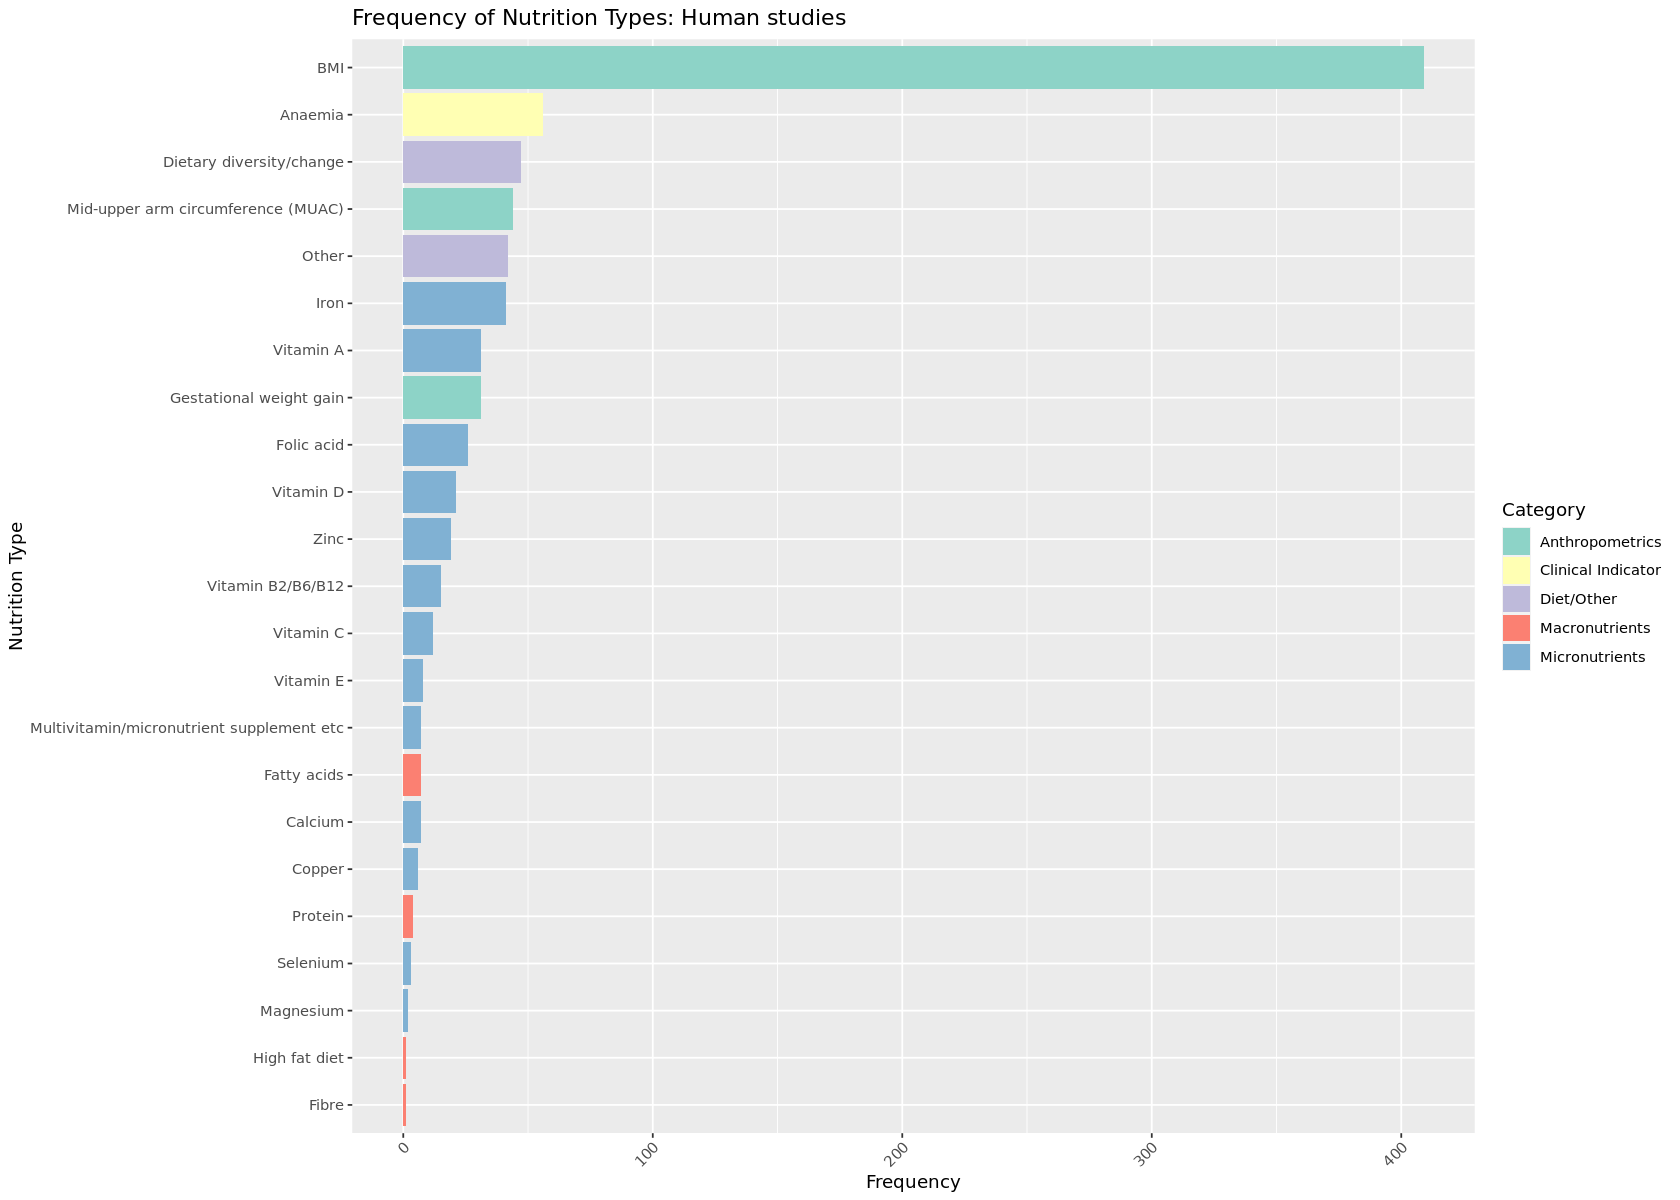

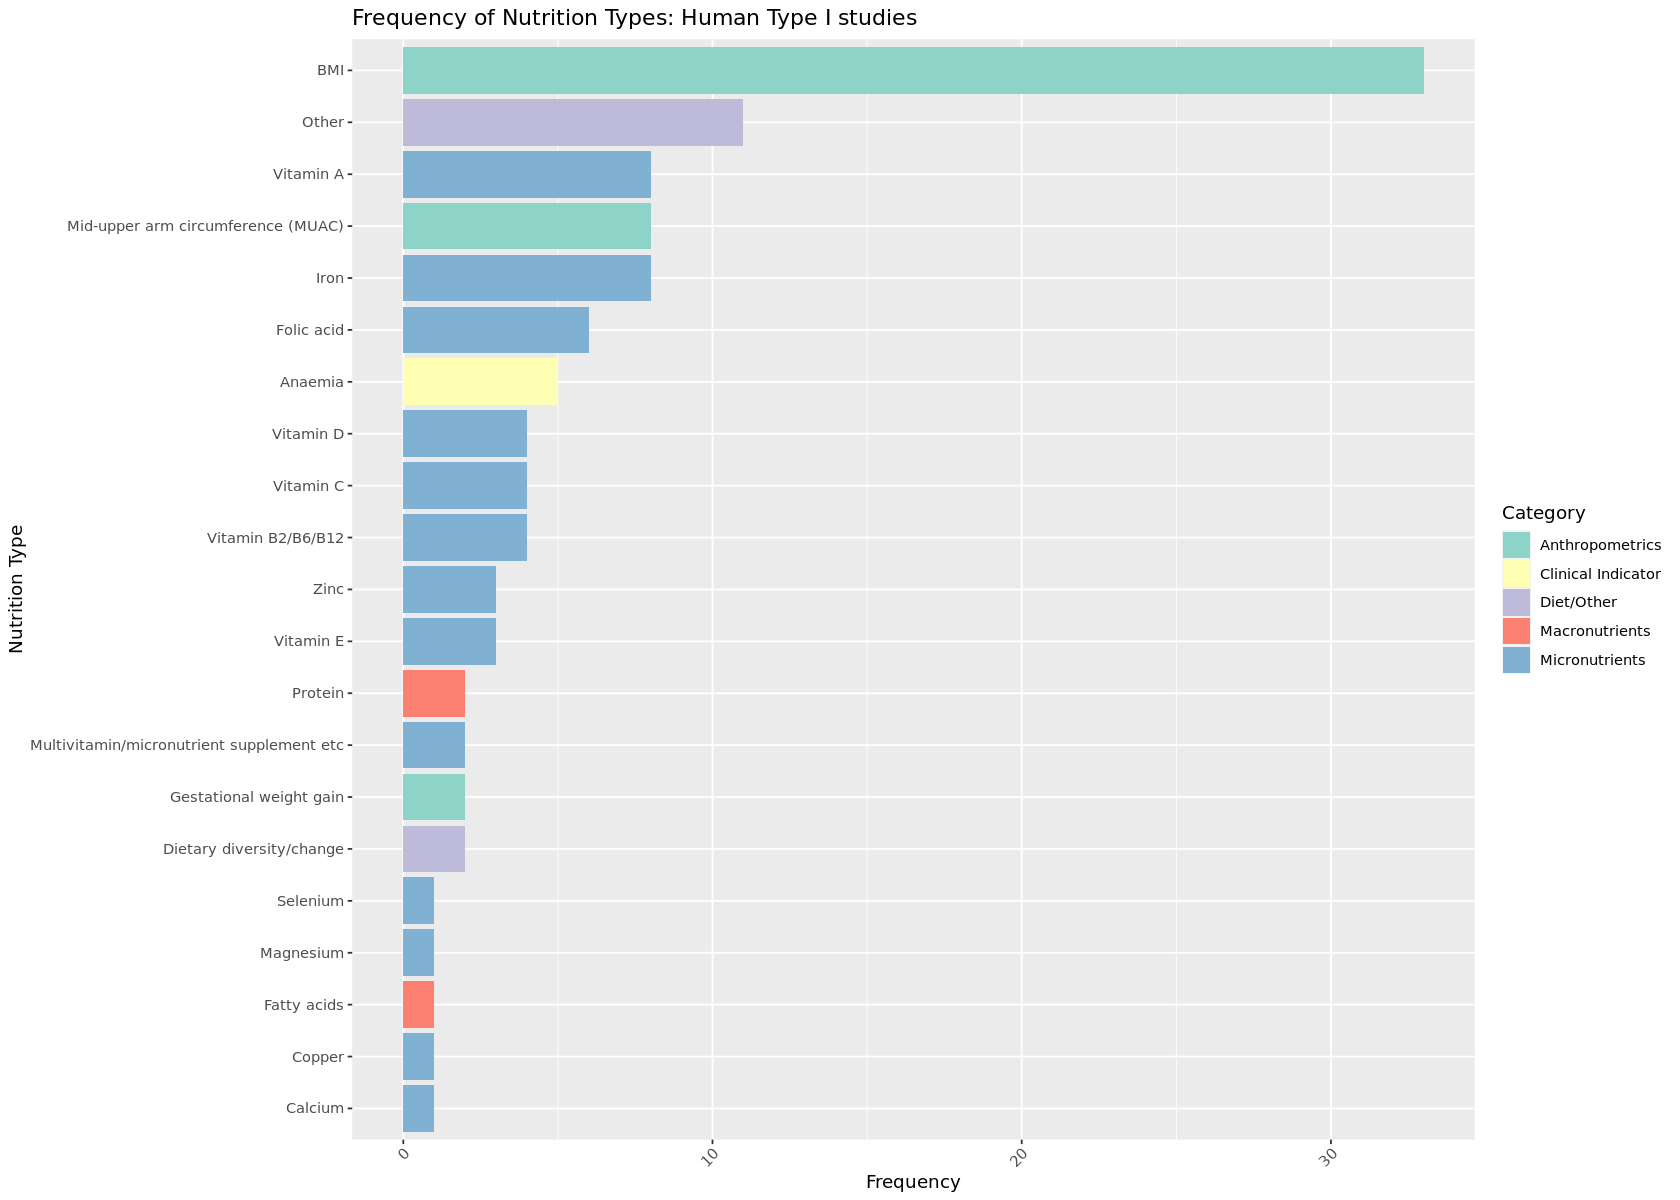

In [27]:
# 1: Count occurrences of each nutrition type
datMetaNut_human_cat <- datMetaNut_human %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))

datMetaNut_humanI_cat <- datMetaNut_humanI %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


# 2: Left join with the lookup table from before to add NutCat
datMetaNut_human_cat <- datMetaNut_human_cat %>% 
    left_join(nutrient_lookup %>% select(Nutrition, Category),
        by = c("nutritionType" = "Nutrition"))

datMetaNut_humanI_cat <- datMetaNut_humanI_cat %>% 
    left_join(nutrient_lookup %>% select(Nutrition, Category),
        by = c("nutritionType" = "Nutrition"))


# 3: Ensure nutritionType is ordered by frequency
datMetaNut_human_cat <- datMetaNut_human_cat %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


datMetaNut_humanI_cat <- datMetaNut_humanI_cat %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


dim(datMetaNut_human_cat)
head(datMetaNut_human_cat)

dim(datMetaNut_humanI_cat)
head(datMetaNut_humanI_cat)

# 4: Draw the plot

ggplot(datMetaNut_human_cat, aes(x = nutritionType, y = n, fill = Category)) +
  coord_flip() +  # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Nutrition Types: Human studies", x = "Nutrition Type", y = "Frequency") +
  scale_fill_manual(values = nutcat_colors)


ggplot(datMetaNut_humanI_cat, aes(x = nutritionType, y = n, fill = Category)) +
  coord_flip() + # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Nutrition Types: Human Type I studies", x = "Nutrition Type", y = "Frequency") +
  scale_fill_manual(values = nutcat_colors)


[1] 18  3

nutritionType n Category       
1 BMI           1 Anthropometrics
2 Boron         1 Micronutrients 
3 Calcium       1 Micronutrients 
4 Phosphorus    1 Micronutrients 
5 Vitamin C     1 Micronutrients 
6 Vitamin D     1 Micronutrients

[1] 10  3

nutritionType n Category       
1 BMI           1 Anthropometrics
2 High fat diet 1 Macronutrients 
3 Vitamin D     1 Micronutrients 
4 Fatty acids   2 Macronutrients 
5 Iron          3 Micronutrients 
6 Selenium      3 Micronutrients

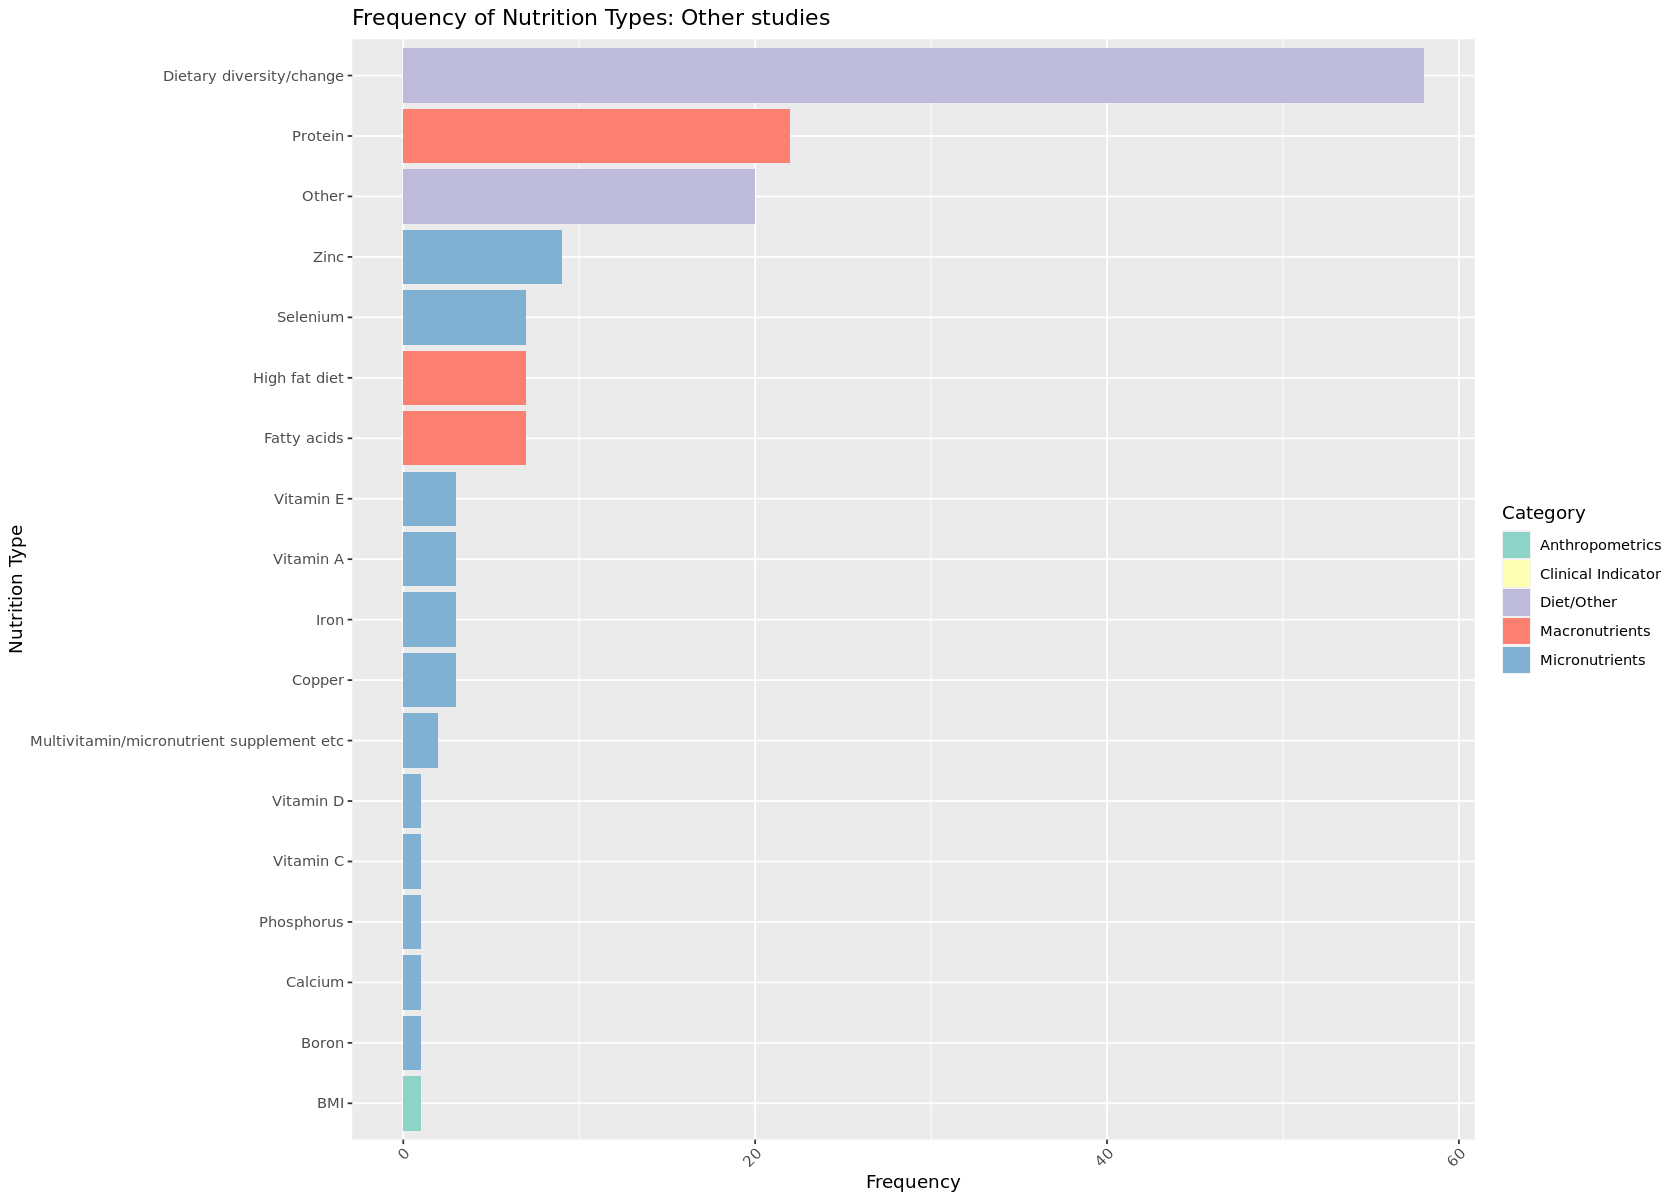

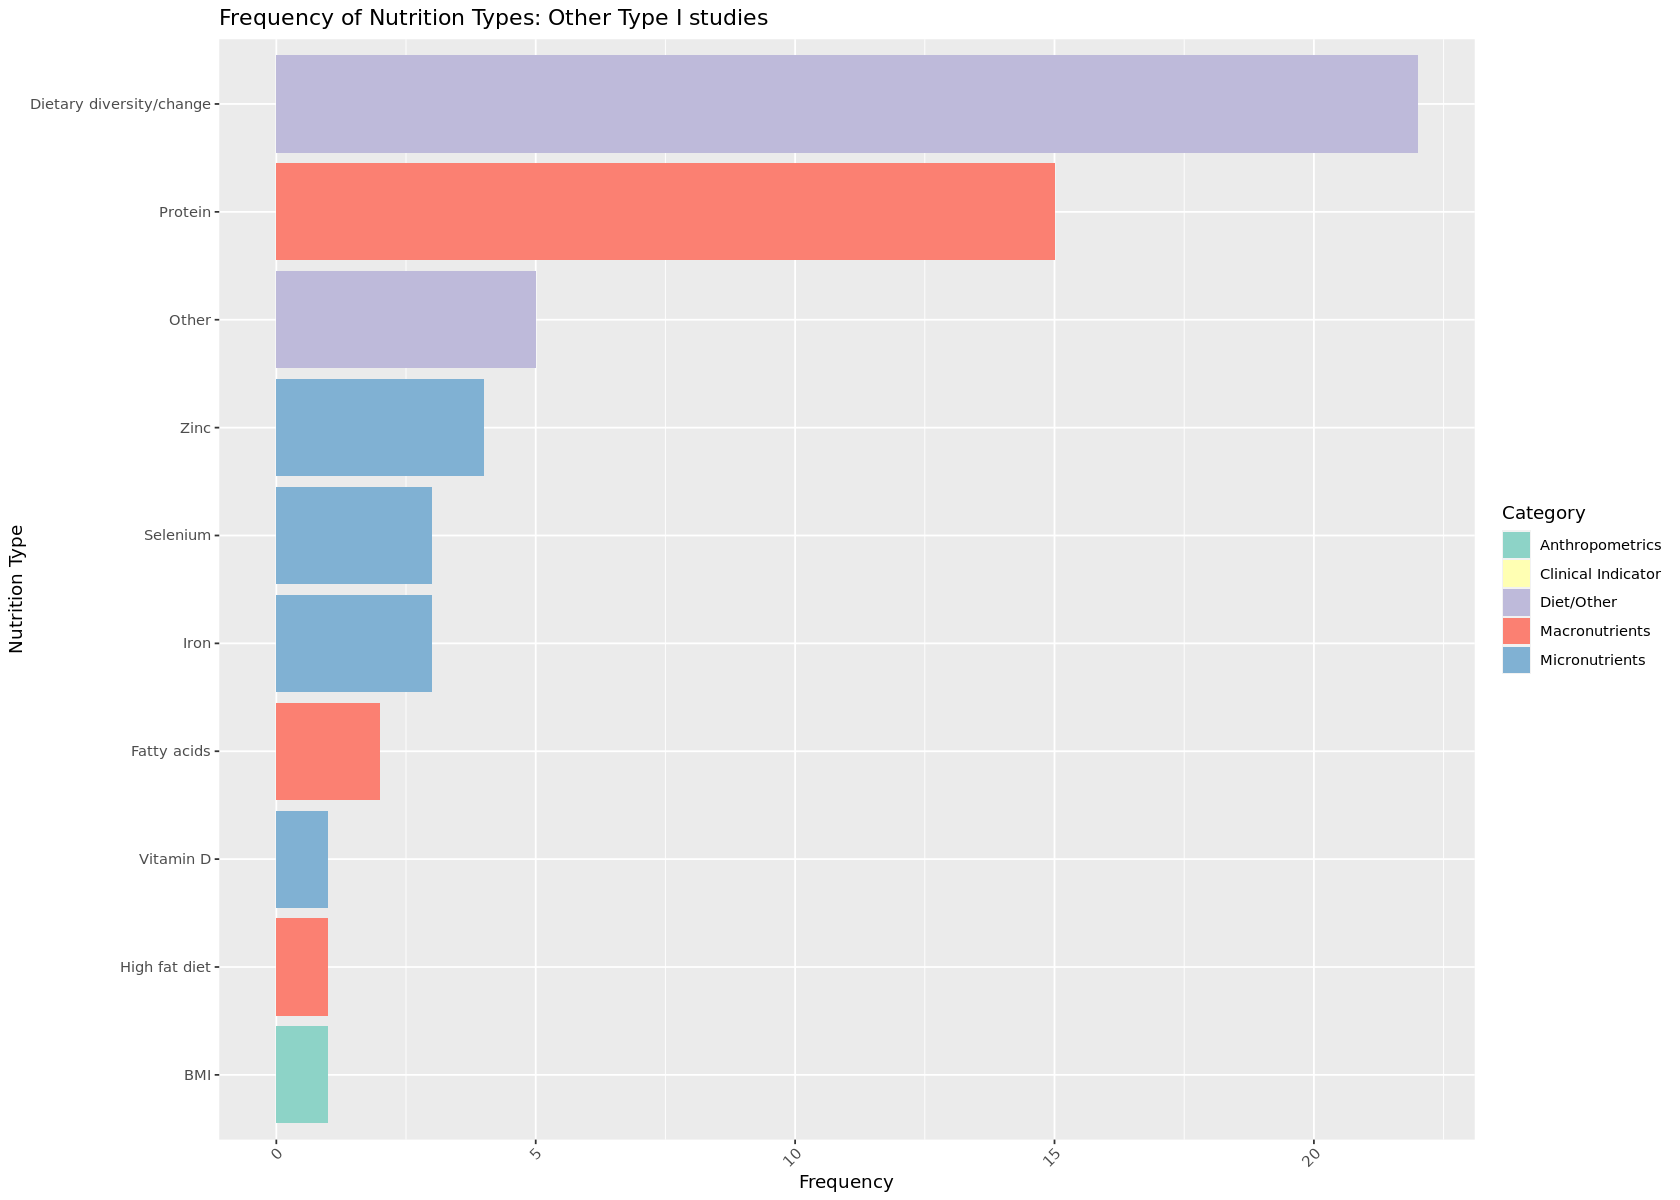

In [28]:
# 1: Count occurrences of each nutrition type
datMetaNut_other_cat <- datMetaNut_other %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))

datMetaNut_otherI_cat <- datMetaNut_otherI %>%
    filter(nutritionType != "") %>%
    count(nutritionType) %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


# 2: Left join with the lookup table from before to add Category
datMetaNut_other_cat <- datMetaNut_other_cat %>% 
    left_join(nutrient_lookup %>% select(Nutrition, Category),
        by = c("nutritionType" = "Nutrition"))

datMetaNut_otherI_cat <- datMetaNut_otherI_cat %>% 
    left_join(nutrient_lookup %>% select(Nutrition, Category),
        by = c("nutritionType" = "Nutrition"))


# 3: Ensure nutritionType is ordered by frequency
datMetaNut_other_cat <- datMetaNut_other_cat %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


datMetaNut_otherI_cat <- datMetaNut_otherI_cat %>%
    arrange(n) %>%
    mutate(nutritionType = factor(nutritionType, levels = nutritionType))


dim(datMetaNut_other_cat)
head(datMetaNut_other_cat)

dim(datMetaNut_otherI_cat)
head(datMetaNut_otherI_cat)

# 4: Draw the plot

ggplot(datMetaNut_other_cat, aes(x = nutritionType, y = n, fill = Category)) +
  coord_flip() +  # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Nutrition Types: Other studies", x = "Nutrition Type", y = "Frequency") +
  scale_fill_manual(values = nutcat_colors)

ggplot(datMetaNut_otherI_cat, aes(x = nutritionType, y = n, fill = Category)) +
  coord_flip() + # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Nutrition Types: Other Type I studies", x = "Nutrition Type", y = "Frequency") +
  scale_fill_manual(values = nutcat_colors)


#### Pregnancy Outcome Frequencies

In [29]:
# Step 1: Create a df based on datPregType_long (where multiple pregnancy types per study are listed in multiple lines) and Meta which lists eg species.
# List of all the dfs

dfs_list <- list(datMeta, datPregType_long)

# Full join all data frames by "studyRef"
datMetaPreg <- Reduce(function(x, y) full_join(x, y, by = "studyRef"), dfs_list)

# Create a speciesCat column
datMetaPreg <- datMetaPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

head(datMetaPreg)
dim(datMetaPreg) 


studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore species_grouped pregnancyOutcomeType                     
1 Type II    Human           Apgar score                              
2 Type II    Human           Birth weight                             
3 Type II    Human           Maternal mortality                       
4 Type II    Human           Mode of delivery / caesarean section rate
5 Type II    Human           Other - maternal                         
6 Type II    Human           Pre-term birth                           
  Category                     speciesCat
1 Foetal and Neonatal Outcomes Human     
2 Foetal and Neonatal Outcomes Human     
3 Maternal Outcomes            Human     
4 Maternal Outcomes            Human     
5 Other - maternal             Human     
6 Pregnancy Complications      Human

[1] 2405   12

pregnancyOutcomeType           n Category                                  
1 Autism spectrum disorder       1 Developmental and Long-term Child Outcomes
2 Cancer risk                    1 Maternal Outcomes                         
3 DNA methylation - maternal     1 Maternal Molecular and Clinical Biomarkers
4 Ectopic pregnancy              1 Maternal Outcomes                         
5 Language and motor development 1 Developmental and Long-term Child Outcomes
6 Motor development              1 Developmental and Long-term Child Outcomes

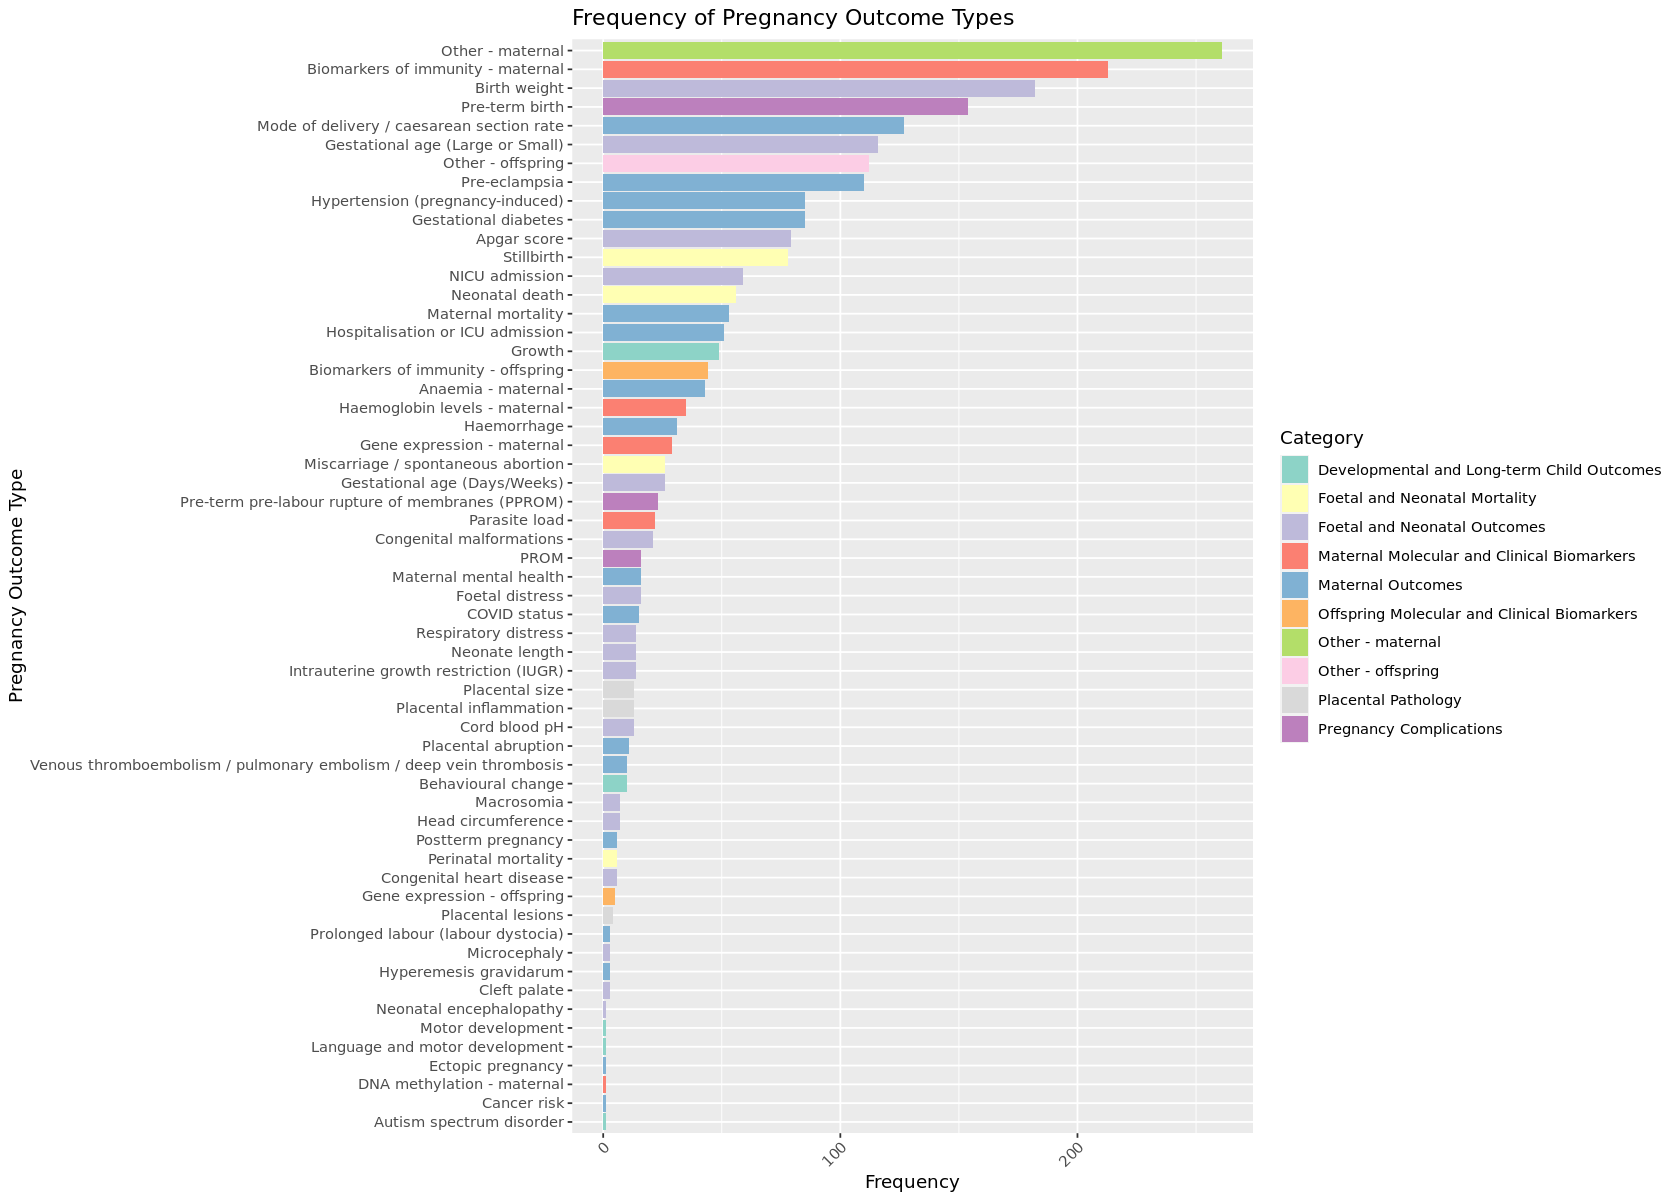

In [30]:
# Step 2: Create a df that counts the occurrence of each Pregnancy type

# 1: Count occurrences of each pregnancy outcome type
datMetaPreg_cat <- datMetaPreg %>%
    filter(pregnancyOutcomeType != "") %>%
    count(pregnancyOutcomeType) %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

# 2: Left join with the lookup table from before to add PregCat
datMetaPreg_cat <- datMetaPreg_cat %>% 
    left_join(pregnancy_lookup %>% select(Pregnancy, Category),
        by = c("pregnancyOutcomeType" = "Pregnancy"))

# 3: Ensure pregnancyOutcomeType is ordered by frequency
datMetaPreg_cat <- datMetaPreg_cat %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

head(datMetaPreg_cat)

# 4: Create a fixed colour fill for each of the categories in Category
# Get all unique PregCat levels combined from both datasets
all_pregcat_levels <- sort(unique(datMetaPreg$Category))

# Pick a palette with enough colors (max 12 colors for Set3)
palette_colors <- brewer.pal(n = max(3, length(all_pregcat_levels)), name = "Set3")

# Assign colors named by PregCat levels
pregcat_colors <- setNames(palette_colors[1:length(all_pregcat_levels)], all_pregcat_levels)

# 5: Draw the plot
ggplot(datMetaPreg_cat, aes(x = pregnancyOutcomeType, y = n, fill = Category)) +
  coord_flip() +  # This makes the bars horizontal
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Pregnancy Outcome Types", x = "Pregnancy Outcome Type", y = "Frequency") +
  scale_fill_manual(values = pregcat_colors)

[1] 2069   12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore species_grouped pregnancyOutcomeType                     
1 Type II    Human           Apgar score                              
2 Type II    Human           Birth weight                             
3 Type II    Human           Maternal mortality                       
4 Type II    Human           Mode of delivery / caesarean section rate
5 Type II    Human           Other - maternal                         
6 Type II    Human           Pre-term birth                           
  Category                     speciesCat
1 Foetal and Neonatal Outcomes Human     
2 Foetal and Neonatal Outcomes Human     
3 Maternal Outcomes            Human     
4 Maternal Outcomes            Human     
5 Other - maternal             Human     
6 Pregnancy Complications      Human

[1] 138  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
2 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
3 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
4 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
5 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
6 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
  studyScore species_grouped pregnancyOutcomeType            
1 Type I     Human           Apgar score                     
2 Type I     Human           Gestational age (Days/Weeks)    
3 Type I     Human           Gestational age (Large or Small)
4 Type I     Human           Hospitalisation or ICU admission
5 Type I     Human           Maternal mortality              
6 Type I     Human           Stillbirth                      
  Category                      speciesCat
1 Foetal and Neonatal Outcomes  Human     
2 Foetal and Neonatal Outcomes  Human     
3 Foetal and Neonatal Outcomes  Human     
4 Maternal Outcomes             Human     
5 Maternal Outcomes             Human     
6 Foetal and Neonatal Mortality Human

[1] 336  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
3 1182475276 AS         Chebel      2021 Cow     USA          Mother     
4 1182475318 AS         McGlone     2001 Pig     USA          Both       
5 1182475318 AS         McGlone     2001 Pig     USA          Both       
6 1182475318 AS         McGlone     2001 Pig     USA          Both       
  studyScore species_grouped pregnancyOutcomeType             
1 Type I     Other           Behavioural change               
2 Type I     Other           Biomarkers of immunity - maternal
3 Type II    Other           Other - maternal                 
4 Type III   Other           Biomarkers of immunity - maternal
5 Type III   Other           Birth weight                     
6 Type III   Other           Neonatal death                   
  Category                                   speciesCat
1 Developmental and Long-term Child Outcomes Other     
2 Maternal Molecular and Clinical Biomarkers Other     
3 Other - maternal                           Other     
4 Maternal Molecular and Clinical Biomarkers Other     
5 Foetal and Neonatal Outcomes               Other     
6 Foetal and Neonatal Mortality              Other

[1] 153  12

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
3 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
4 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
5 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
6 1182475381 AS         Houdijk     2000 Sheep   UK           Both       
  studyScore species_grouped pregnancyOutcomeType             
1 Type I     Other           Behavioural change               
2 Type I     Other           Biomarkers of immunity - maternal
3 Type I     Other           Biomarkers of immunity - maternal
4 Type I     Other           Birth weight                     
5 Type I     Other           Other - offspring                
6 Type I     Other           Parasite load                    
  Category                                   speciesCat
1 Developmental and Long-term Child Outcomes Other     
2 Maternal Molecular and Clinical Biomarkers Other     
3 Maternal Molecular and Clinical Biomarkers Other     
4 Foetal and Neonatal Outcomes               Other     
5 Other - offspring                          Other     
6 Maternal Molecular and Clinical Biomarkers Other

[1] 56  3

pregnancyOutcomeType           n Category                                   
1 Autism spectrum disorder       1 Developmental and Long-term Child Outcomes 
2 Cancer risk                    1 Maternal Outcomes                          
3 Ectopic pregnancy              1 Maternal Outcomes                          
4 Gene expression - offspring    1 Offspring Molecular and Clinical Biomarkers
5 Language and motor development 1 Developmental and Long-term Child Outcomes 
6 Neonatal encephalopathy        1 Foetal and Neonatal Outcomes

[1] 28  3

pregnancyOutcomeType                   n
1 Biomarkers of immunity - offspring     1
2 COVID status                           1
3 Gene expression - maternal             1
4 Gestational age (Days/Weeks)           1
5 Growth                                 1
6 Intrauterine growth restriction (IUGR) 1
  Category                                   
1 Offspring Molecular and Clinical Biomarkers
2 Maternal Outcomes                          
3 Maternal Molecular and Clinical Biomarkers 
4 Foetal and Neonatal Outcomes               
5 Developmental and Long-term Child Outcomes 
6 Foetal and Neonatal Outcomes

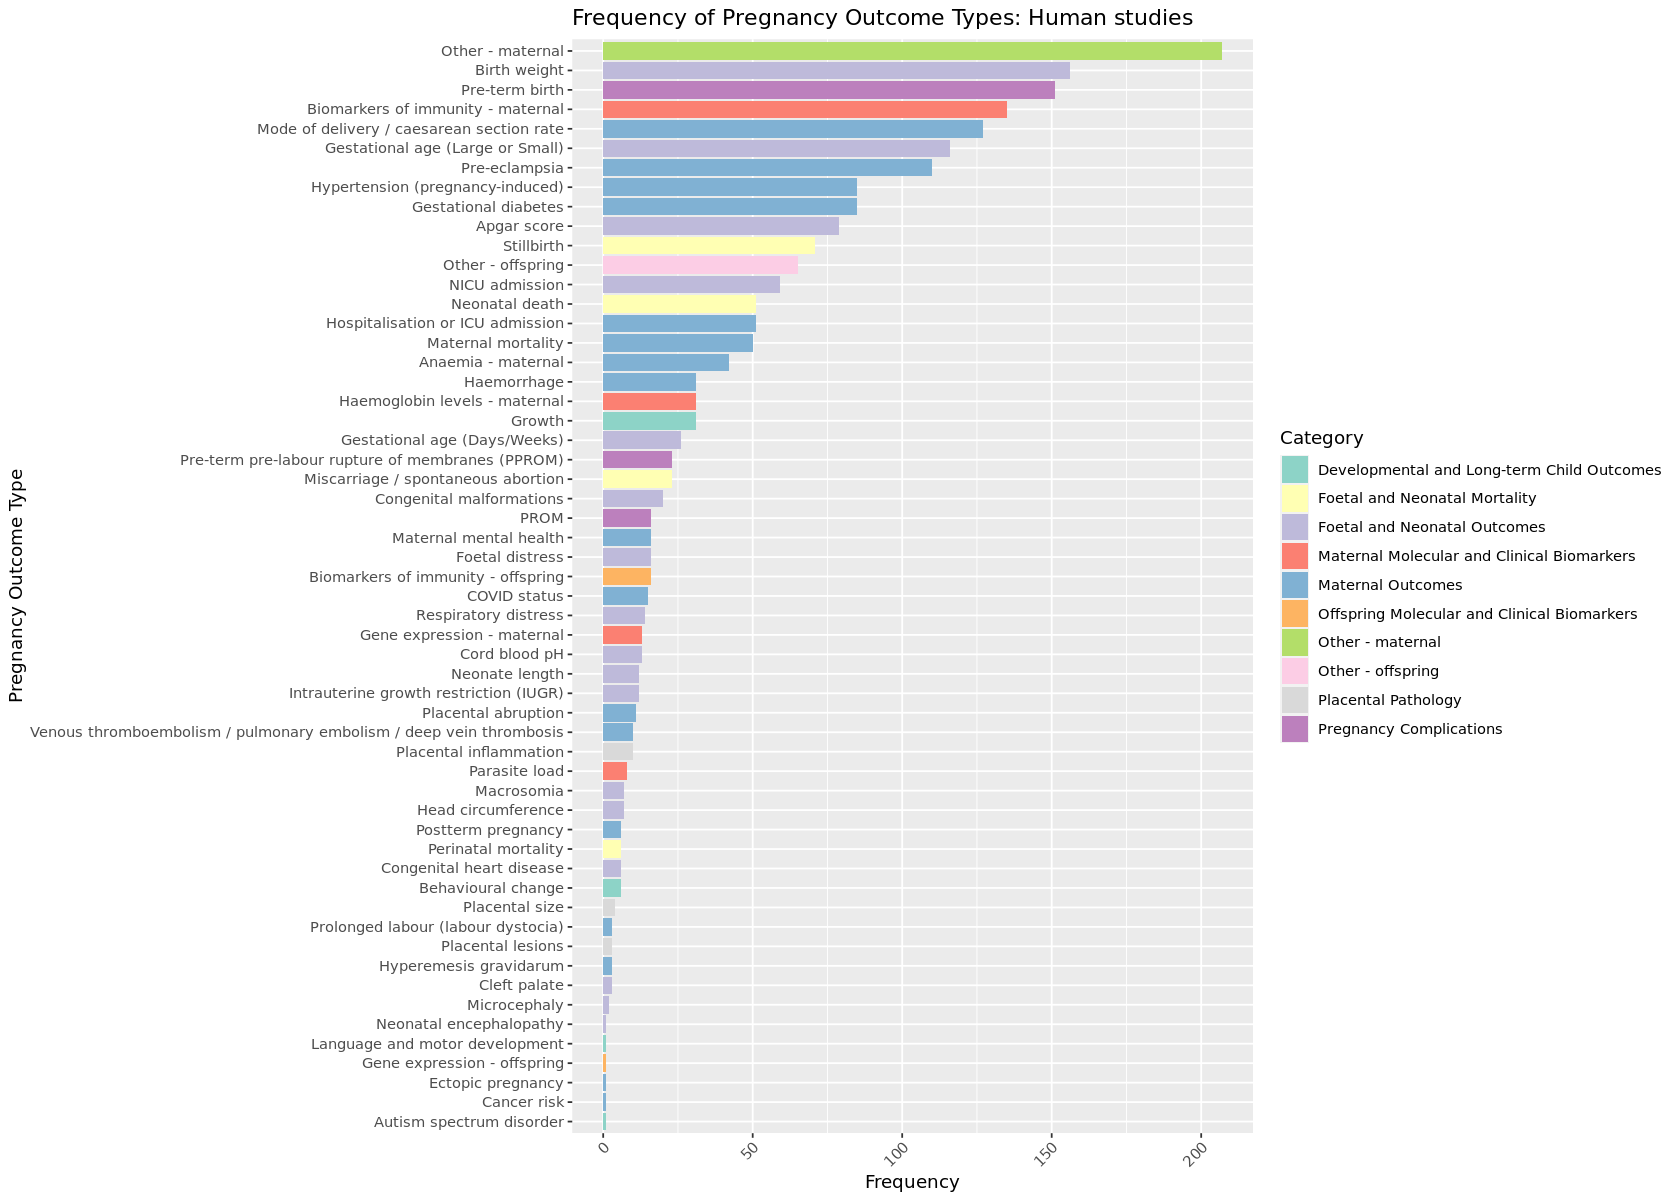

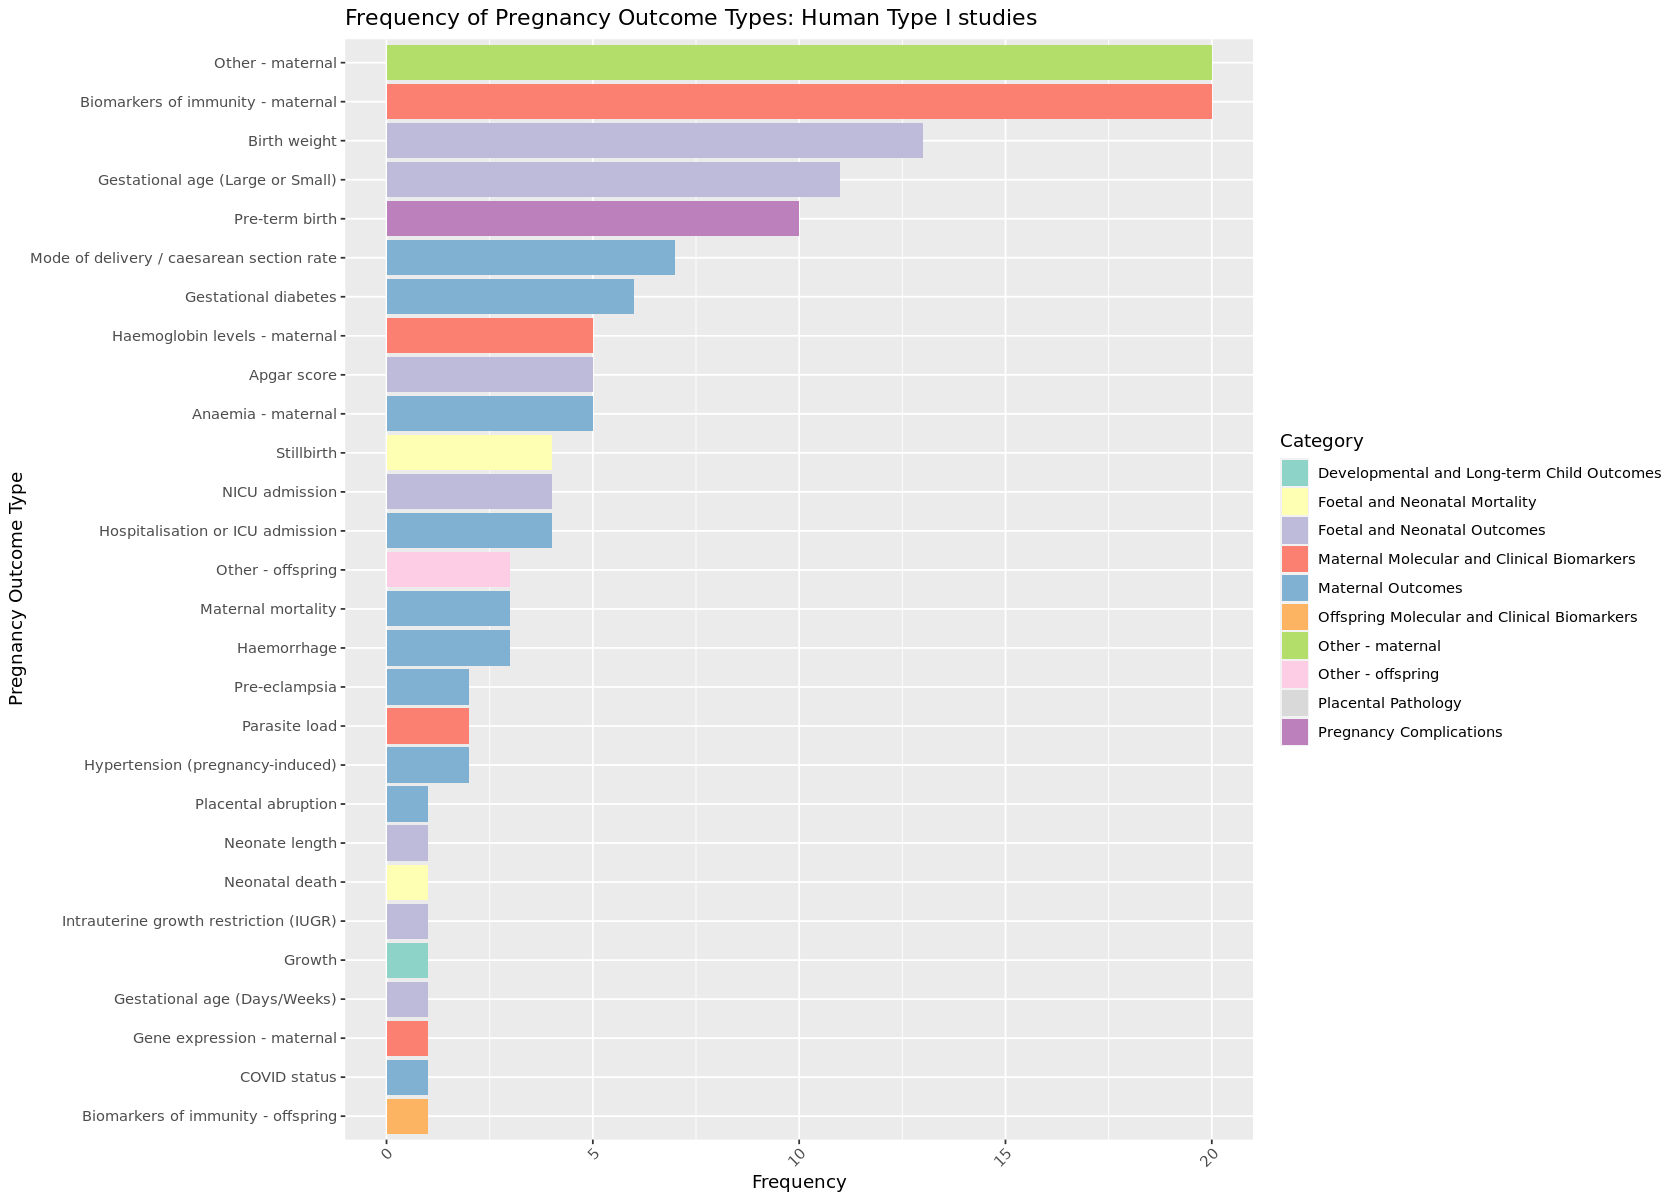

In [31]:
# Draw plots based on Humans/Other and Type I vs all studies:

# Step 1: Create a df based on datPregType_long for Humans only and for Humans Type I only.
dfs_list <- list(datMeta, datPregType_long)  # Full join all data frames by "studyRef"

datMetaPreg <- Reduce(function(x, y) full_join(x, y, by = "studyRef"), dfs_list)

# Create a speciesCat column
datMetaPreg <- datMetaPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

# Filter Human data only
datMetaPreg_human <- datMetaPreg %>% filter(speciesCat == "Human")
dim(datMetaPreg_human)
head(datMetaPreg_human)

# Filter Human Type I data only
datMetaPreg_humanI <- datMetaPreg %>% filter(speciesCat == "Human", studyScore == "Type I")
dim(datMetaPreg_humanI)
head(datMetaPreg_humanI)

# Filter Other data only
datMetaPreg_other <- datMetaPreg %>% filter(speciesCat == "Other")
dim(datMetaPreg_other)
head(datMetaPreg_other)

# Filter Other Type I data only
datMetaPreg_otherI <- datMetaPreg %>% filter(speciesCat == "Other", studyScore == "Type I")
dim(datMetaPreg_otherI)
head(datMetaPreg_otherI)

# 1: Count occurrences of each pregnancy outcome type
datMetaPreg_human_cat <- datMetaPreg_human %>%
    filter(pregnancyOutcomeType != "") %>%
    count(pregnancyOutcomeType) %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

datMetaPreg_humanI_cat <- datMetaPreg_humanI %>%
    filter(pregnancyOutcomeType != "") %>%
    count(pregnancyOutcomeType) %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

# 2: Left join with the lookup table from before to add Category
datMetaPreg_human_cat <- datMetaPreg_human_cat %>% 
    left_join(pregnancy_lookup %>% select(Pregnancy, Category),
        by = c("pregnancyOutcomeType" = "Pregnancy"))

datMetaPreg_humanI_cat <- datMetaPreg_humanI_cat %>% 
    left_join(pregnancy_lookup %>% select(Pregnancy, Category),
        by = c("pregnancyOutcomeType" = "Pregnancy"))

# 3: Ensure pregnancyOutcomeType is ordered by frequency
datMetaPreg_human_cat <- datMetaPreg_human_cat %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

datMetaPreg_humanI_cat <- datMetaPreg_humanI_cat %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

dim(datMetaPreg_human_cat)
head(datMetaPreg_human_cat)

dim(datMetaPreg_humanI_cat)
head(datMetaPreg_humanI_cat)

# 4: Draw the plot

ggplot(datMetaPreg_human_cat, aes(x = pregnancyOutcomeType, y = n, fill = Category)) +
  coord_flip() +  # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Pregnancy Outcome Types: Human studies", x = "Pregnancy Outcome Type", y = "Frequency") +
  scale_fill_manual(values = pregcat_colors)

ggplot(datMetaPreg_humanI_cat, aes(x = pregnancyOutcomeType, y = n, fill = Category)) +
  coord_flip() +  # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Pregnancy Outcome Types: Human Type I studies", x = "Pregnancy Outcome Type", y = "Frequency") +
  scale_fill_manual(values = pregcat_colors)


[1] 26  3

pregnancyOutcomeType       n Category                                  
1 Anaemia - maternal         1 Maternal Outcomes                         
2 Congenital malformations   1 Foetal and Neonatal Outcomes              
3 DNA methylation - maternal 1 Maternal Molecular and Clinical Biomarkers
4 Microcephaly               1 Foetal and Neonatal Outcomes              
5 Motor development          1 Developmental and Long-term Child Outcomes
6 Placental lesions          1 Placental Pathology

[1] 25  3

pregnancyOutcomeType                   n
1 Anaemia - maternal                     1
2 Congenital malformations               1
3 Intrauterine growth restriction (IUGR) 1
4 Microcephaly                           1
5 Motor development                      1
6 Placental lesions                      1
  Category                                  
1 Maternal Outcomes                         
2 Foetal and Neonatal Outcomes              
3 Foetal and Neonatal Outcomes              
4 Foetal and Neonatal Outcomes              
5 Developmental and Long-term Child Outcomes
6 Placental Pathology

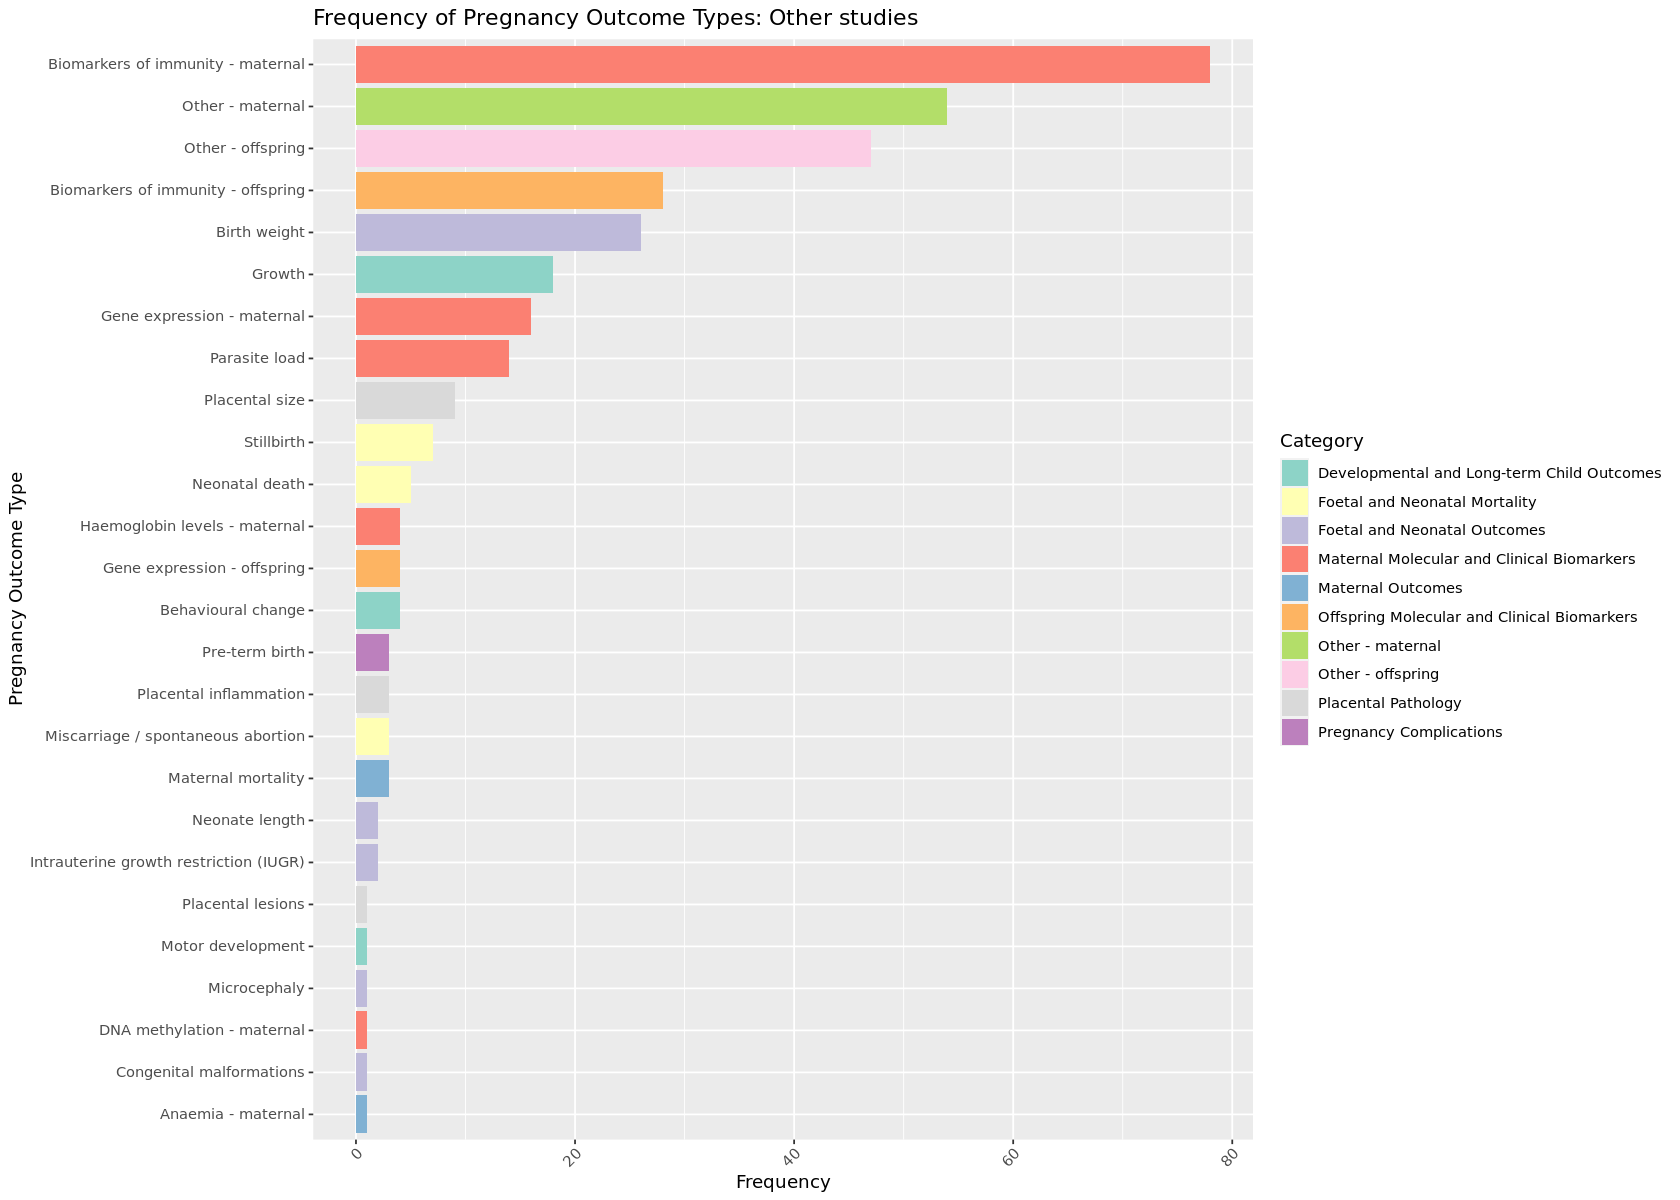

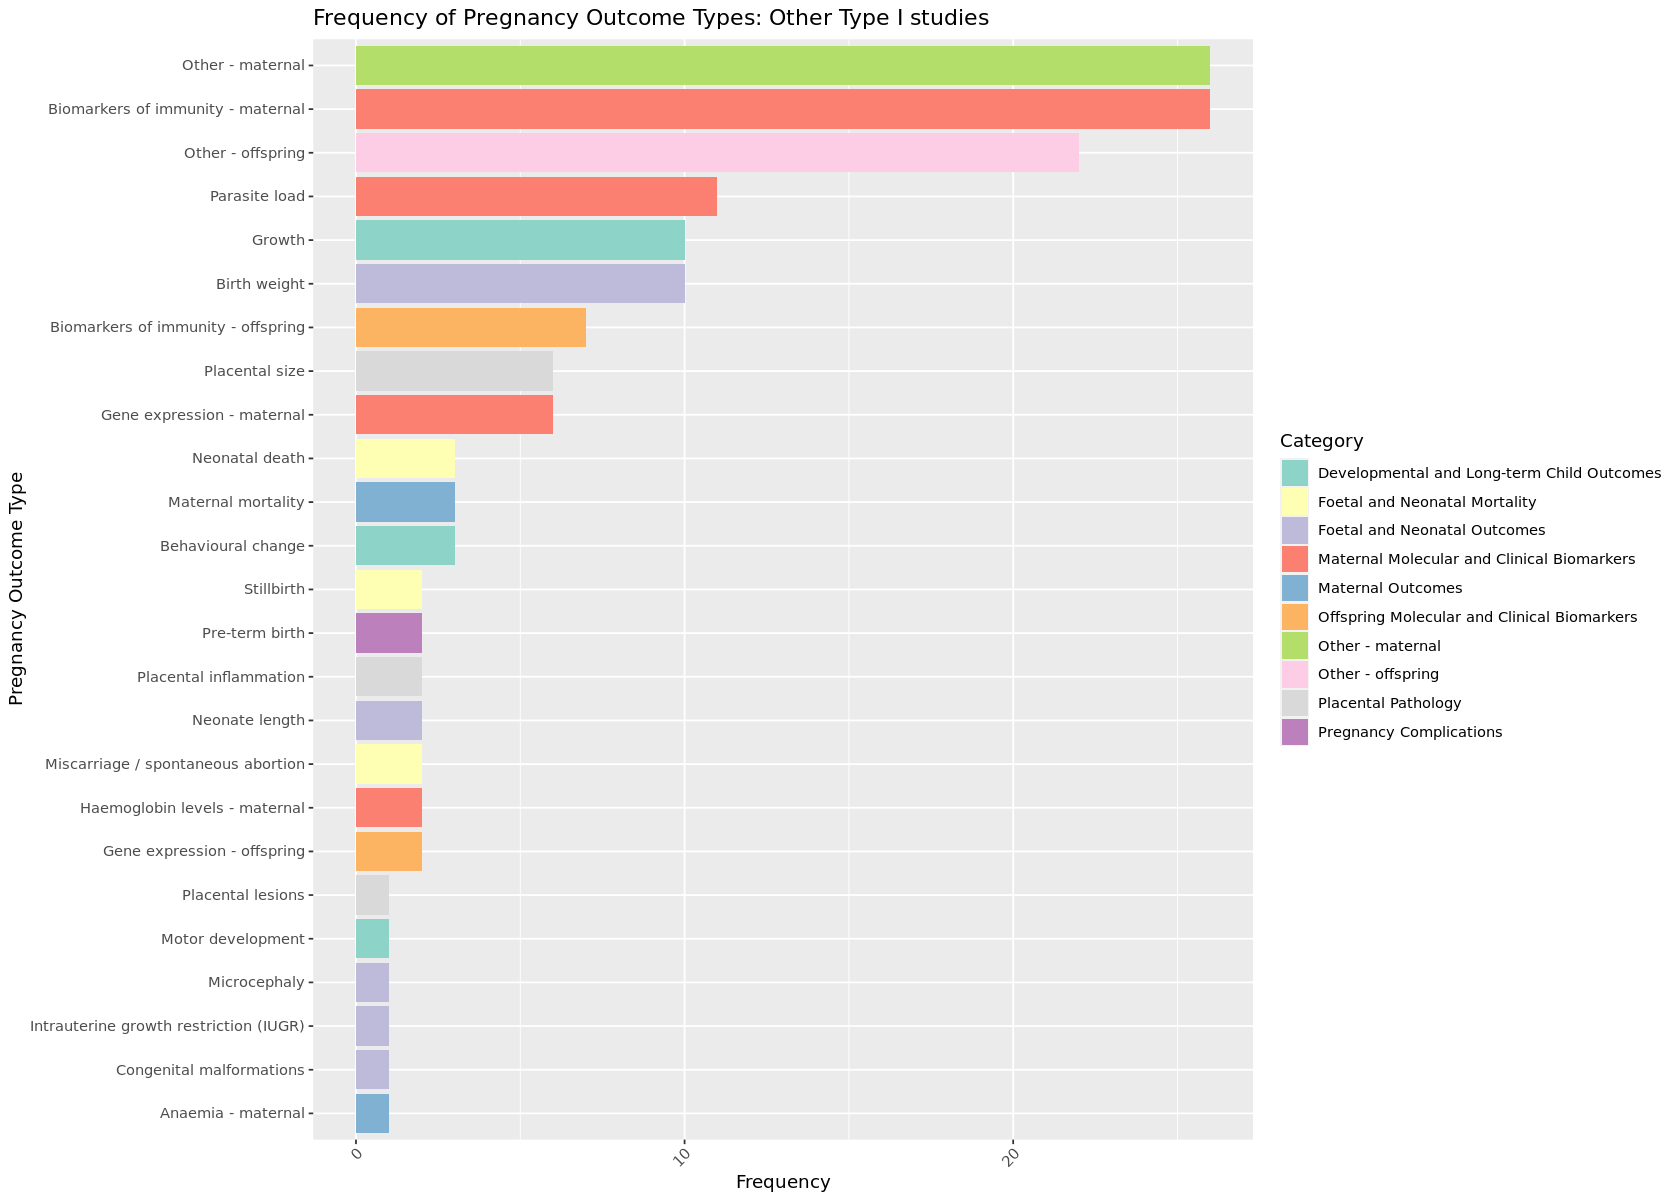

In [32]:
# 1: Count occurrences of each pregnancy outcome type
datMetaPreg_other_cat <- datMetaPreg_other %>%
    filter(pregnancyOutcomeType != "") %>%
    count(pregnancyOutcomeType) %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))

datMetaPreg_otherI_cat <- datMetaPreg_otherI %>%
    filter(pregnancyOutcomeType != "") %>%
    count(pregnancyOutcomeType) %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))


# 2: Left join with the lookup table from before to add Category
datMetaPreg_other_cat <- datMetaPreg_other_cat %>% 
    left_join(pregnancy_lookup %>% select(Pregnancy, Category),
        by = c("pregnancyOutcomeType" = "Pregnancy"))

datMetaPreg_otherI_cat <- datMetaPreg_otherI_cat %>% 
    left_join(pregnancy_lookup %>% select(Pregnancy, Category),
        by = c("pregnancyOutcomeType" = "Pregnancy"))


# 3: Ensure pregnancyOutcomeType is ordered by frequency
datMetaPreg_other_cat <- datMetaPreg_other_cat %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))


datMetaPreg_otherI_cat <- datMetaPreg_otherI_cat %>%
    arrange(n) %>%
    mutate(pregnancyOutcomeType = factor(pregnancyOutcomeType, levels = pregnancyOutcomeType))


dim(datMetaPreg_other_cat)
head(datMetaPreg_other_cat)

dim(datMetaPreg_otherI_cat)
head(datMetaPreg_otherI_cat)

# 4: Draw the plot

ggplot(datMetaPreg_other_cat, aes(x = pregnancyOutcomeType, y = n, fill = Category)) +
  coord_flip() +  # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Pregnancy Outcome Types: Other studies", x = "Pregnancy Outcome Type", y = "Frequency") +
  scale_fill_manual(values = pregcat_colors)

ggplot(datMetaPreg_otherI_cat, aes(x = pregnancyOutcomeType, y = n, fill = Category)) +
  coord_flip() + # Horizontal bars
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequency of Pregnancy Outcome Types: Other Type I studies", x = "Pregnancy Outcome Type", y = "Frequency") +
  scale_fill_manual(values = pregcat_colors)


### Frequency plots of terms across time. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1992    2011    2019    2016    2022    2024 

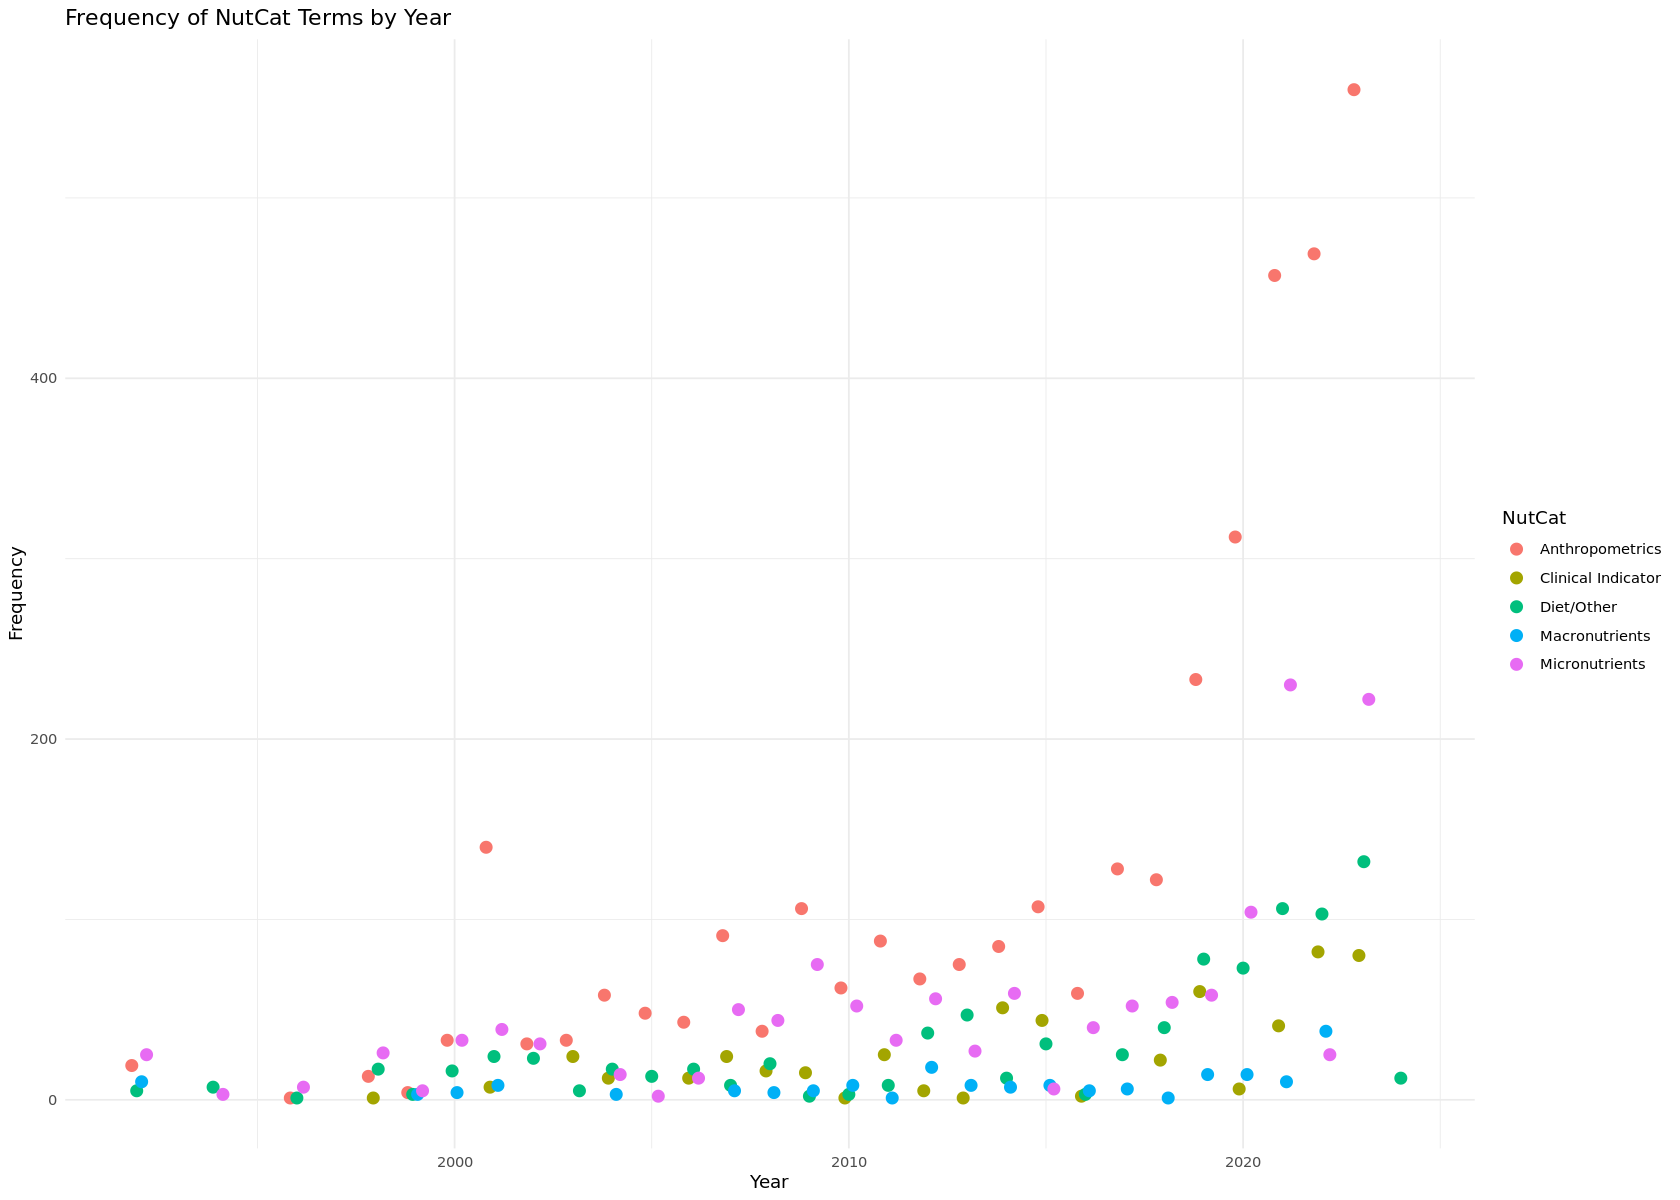

In [33]:

options(repr.plot.width = 14, repr.plot.height = 10)

# Use of different terms/types over time for each dataset
summary(datMetaNutInfPreg$year)

# Infection

# Load necessary libraries
library(ggplot2)
library(dplyr)

# Count the number of NutCat entries per year
nutcat_counts <- datMetaNutInfPreg %>%
  group_by(year, NutCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(nutcat_counts, aes(x = year, y = count, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of NutCat Terms by Year",
    x = "Year",
    y = "Frequency",
    color = "NutCat"
  ) +
  theme_minimal()


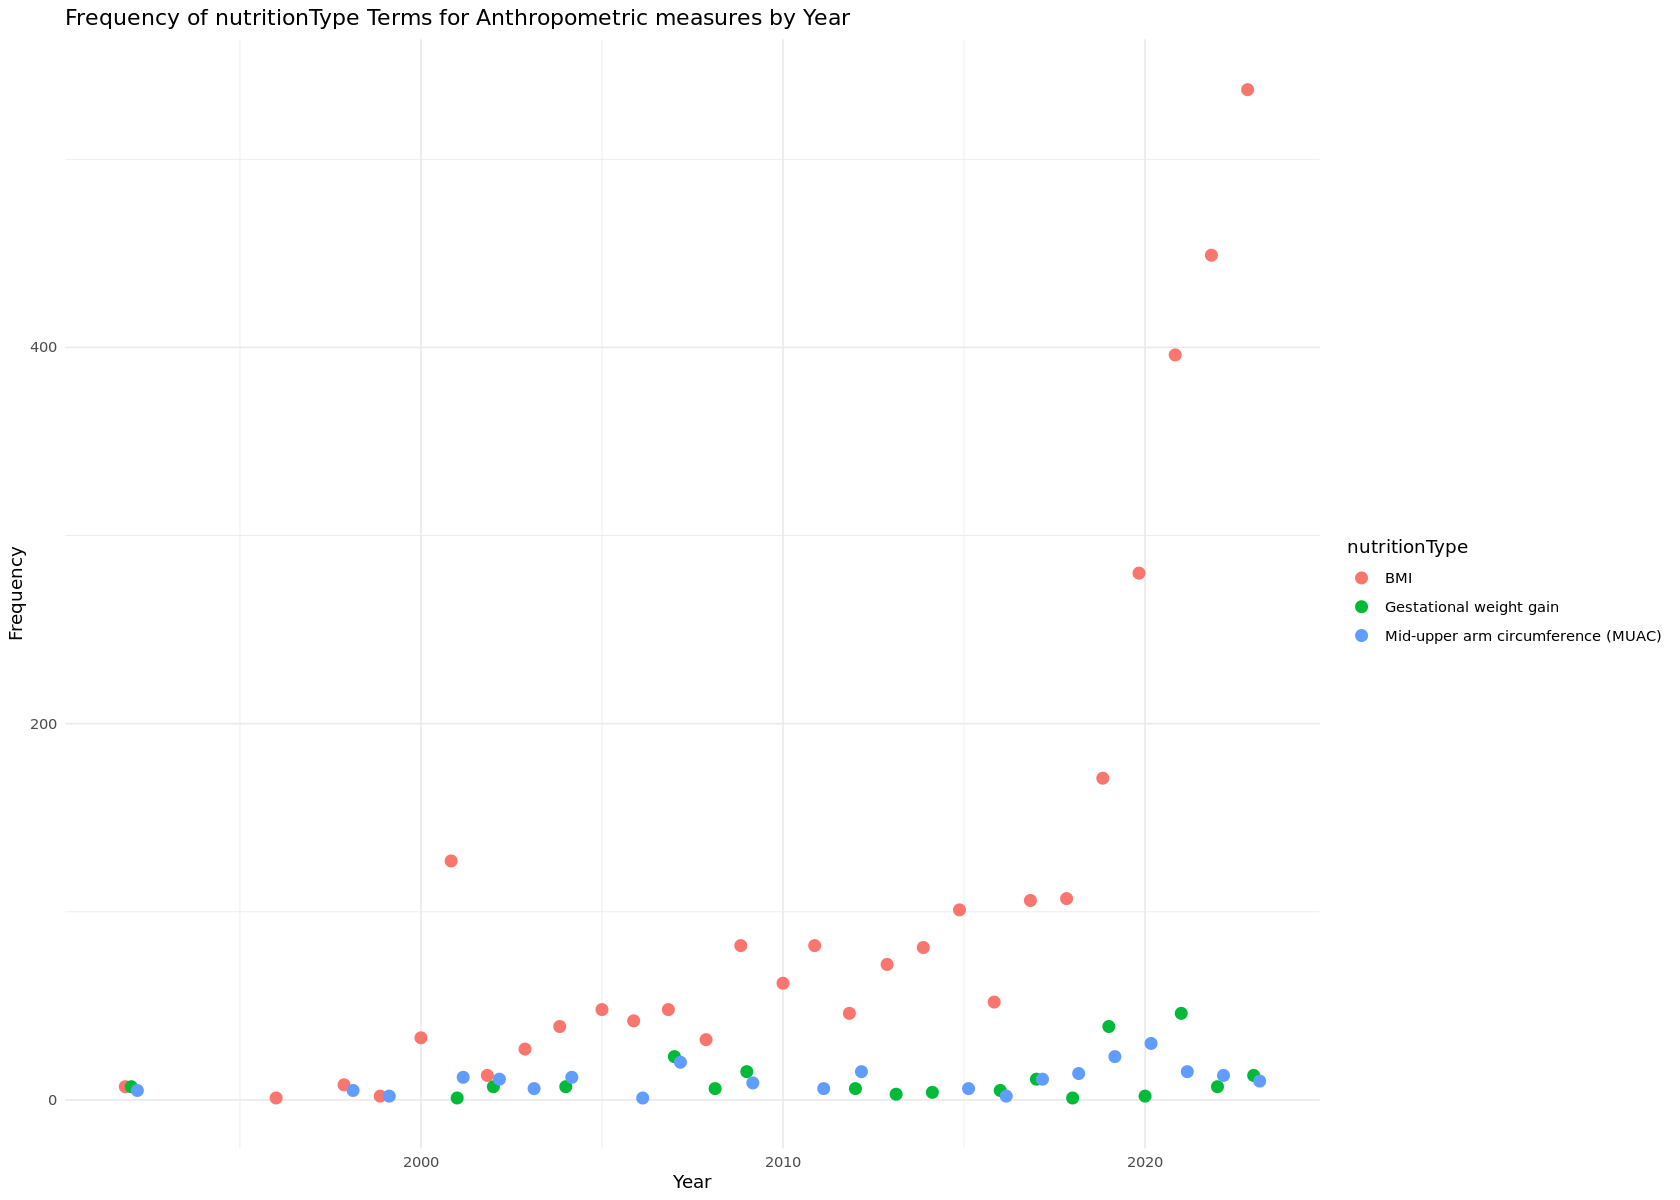

In [34]:
# Is this driven by a new Anthropometric measurement? 

filtered_df <- datMetaNutInfPreg %>% filter(NutCat == "Anthropometrics")

# Count the number of nutritionType entries per year for the NutCat Anthropometrics
nuttype_counts <- filtered_df %>%
  group_by(year, nutritionType) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(nuttype_counts, aes(x = year, y = count, color = nutritionType)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of nutritionType Terms for Anthropometric measures by Year",
    x = "Year",
    y = "Frequency",
    color = "nutritionType"
  ) +
  theme_minimal()



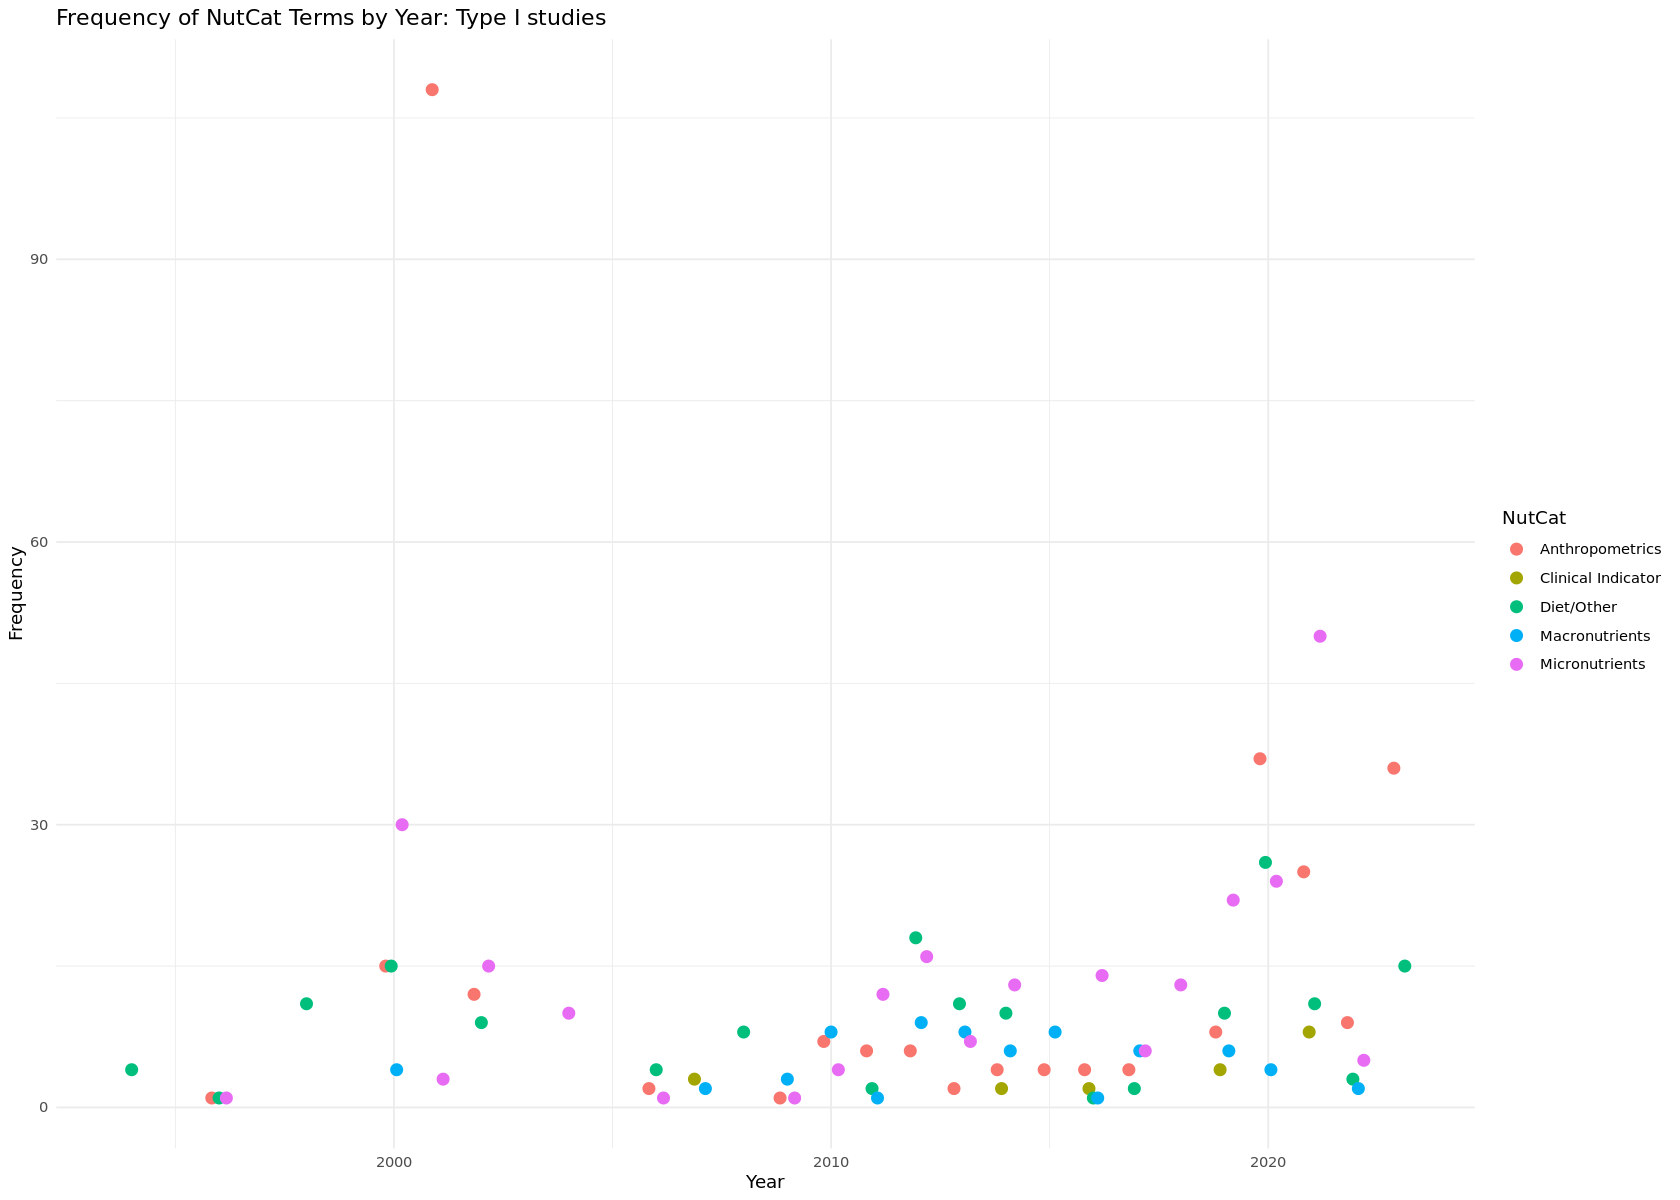

In [35]:
# Does this trend hold for Type I studies?

filtered_df <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Count the number of NutCat entries per year
nutcat_counts <- filtered_df %>%
  group_by(year, NutCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(nutcat_counts, aes(x = year, y = count, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of NutCat Terms by Year: Type I studies",
    x = "Year",
    y = "Frequency",
    color = "NutCat"
  ) +
  theme_minimal()

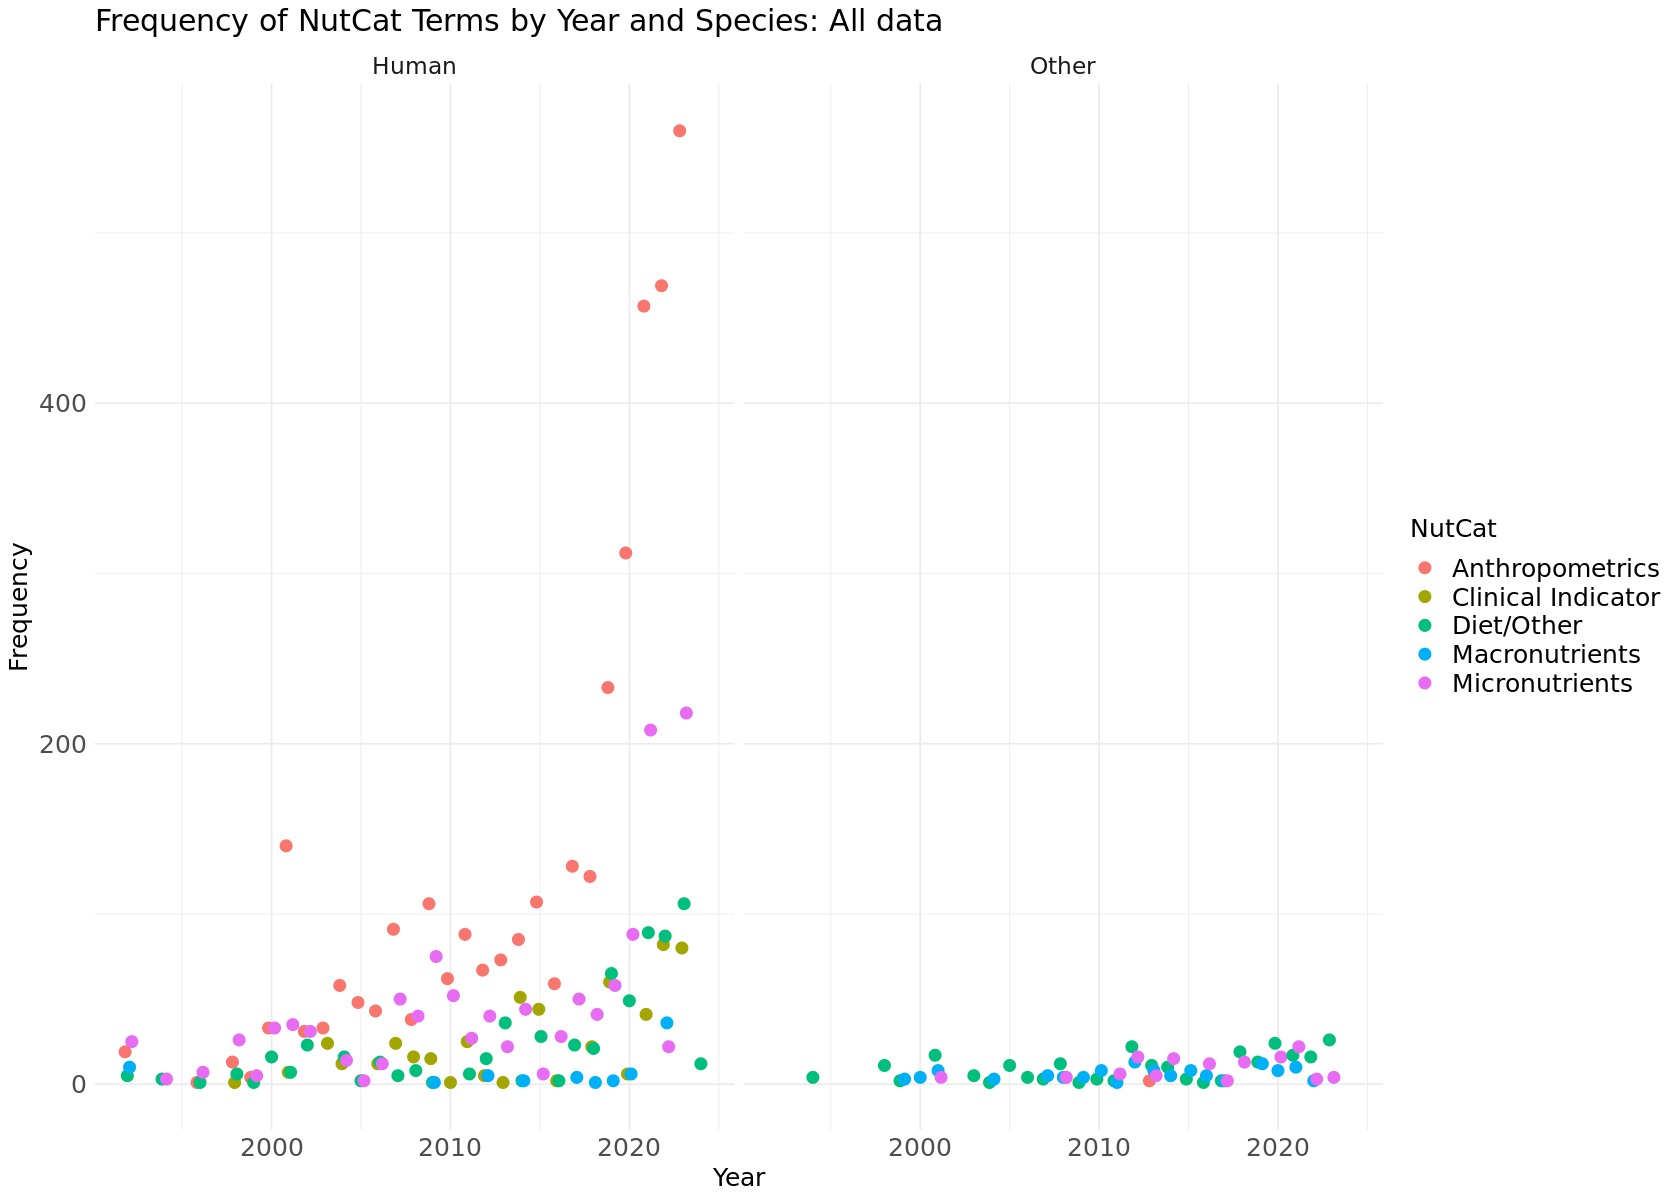

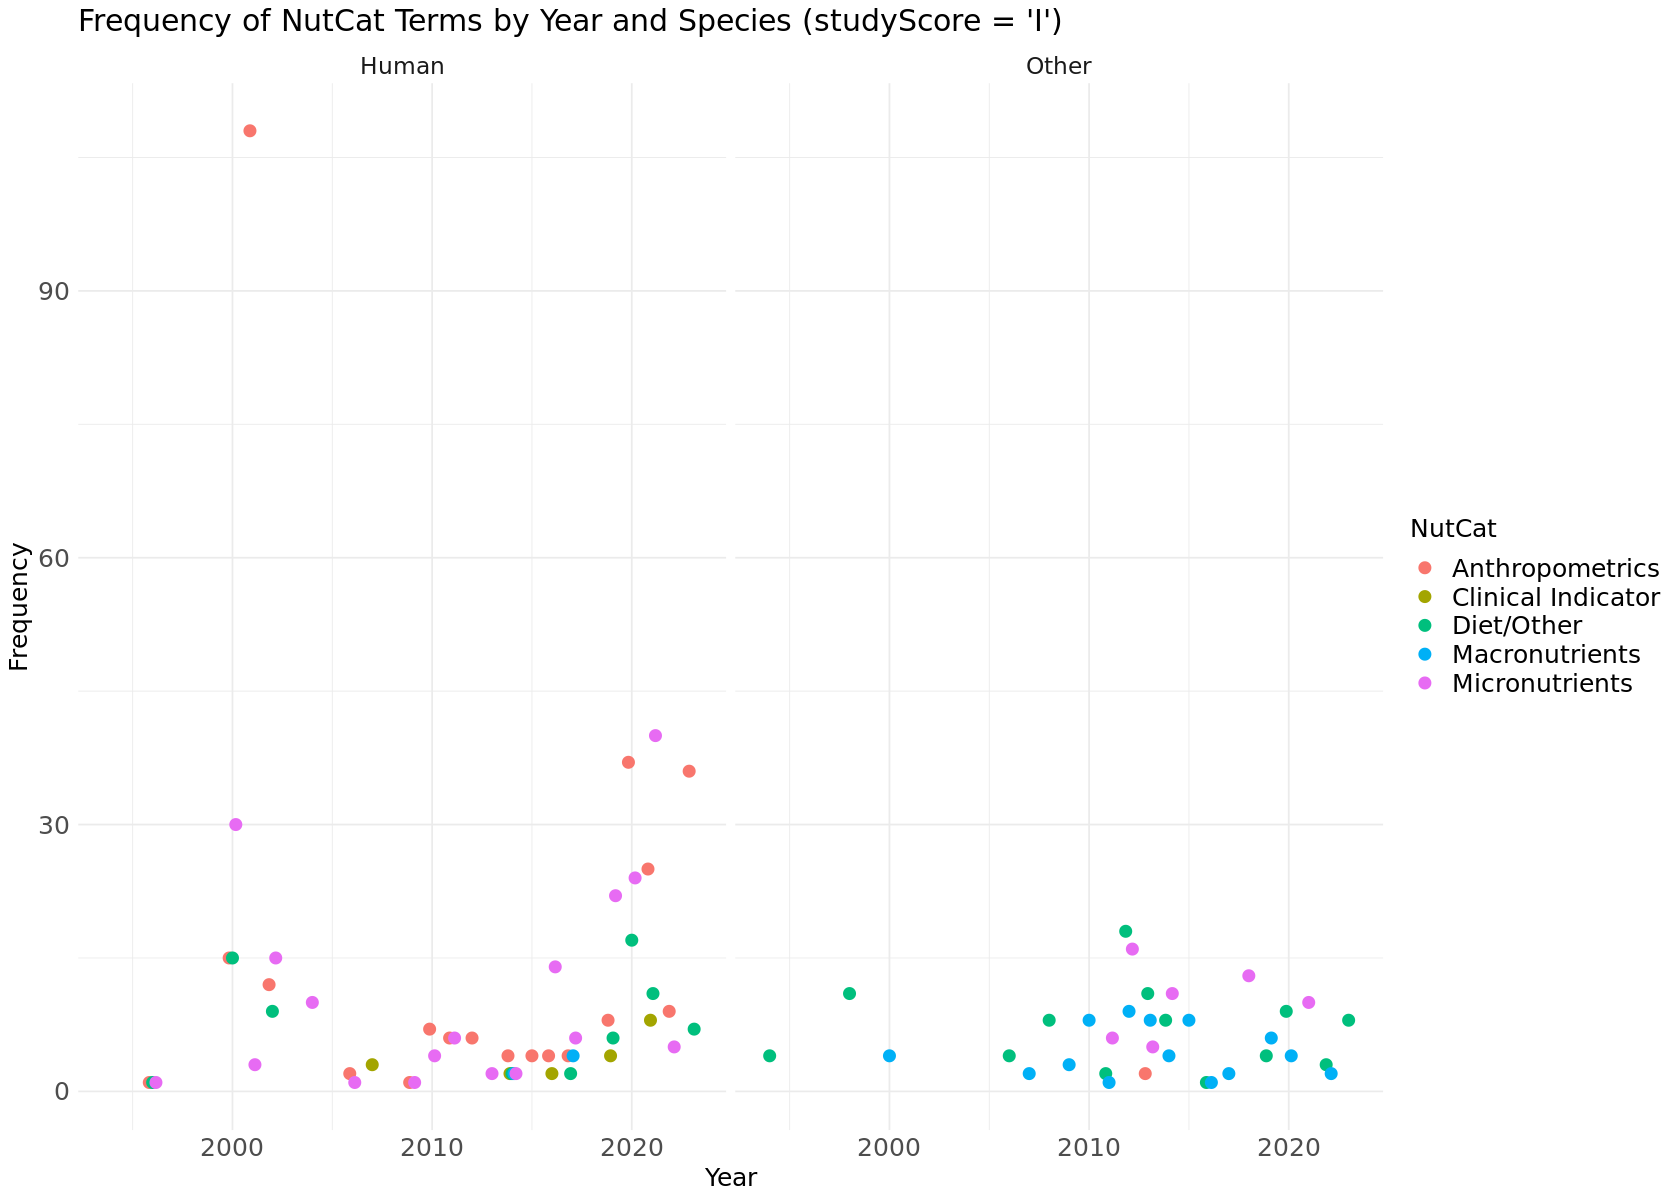

In [36]:
# Is this true for Human and Other?

options(repr.plot.width = 14, repr.plot.height = 10)


# Count NutCat entries per year and species
nutcat_counts <- datMetaNutInfPreg %>%
  group_by(year, NutCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(nutcat_counts, aes(x = year, y = count, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of NutCat Terms by Year and Species: All data",
    x = "Year",
    y = "Frequency",
    color = "NutCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )




# Filter for studyScore == "I" and count NutCat entries per year and species
nutcat_counts_I <- datMetaNutInfPreg %>%
  filter(studyScore == "I") %>%
  group_by(year, NutCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(nutcat_counts_I, aes(x = year, y = count, color = NutCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of NutCat Terms by Year and Species (studyScore = 'I')",
    x = "Year",
    y = "Frequency",
    color = "NutCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )



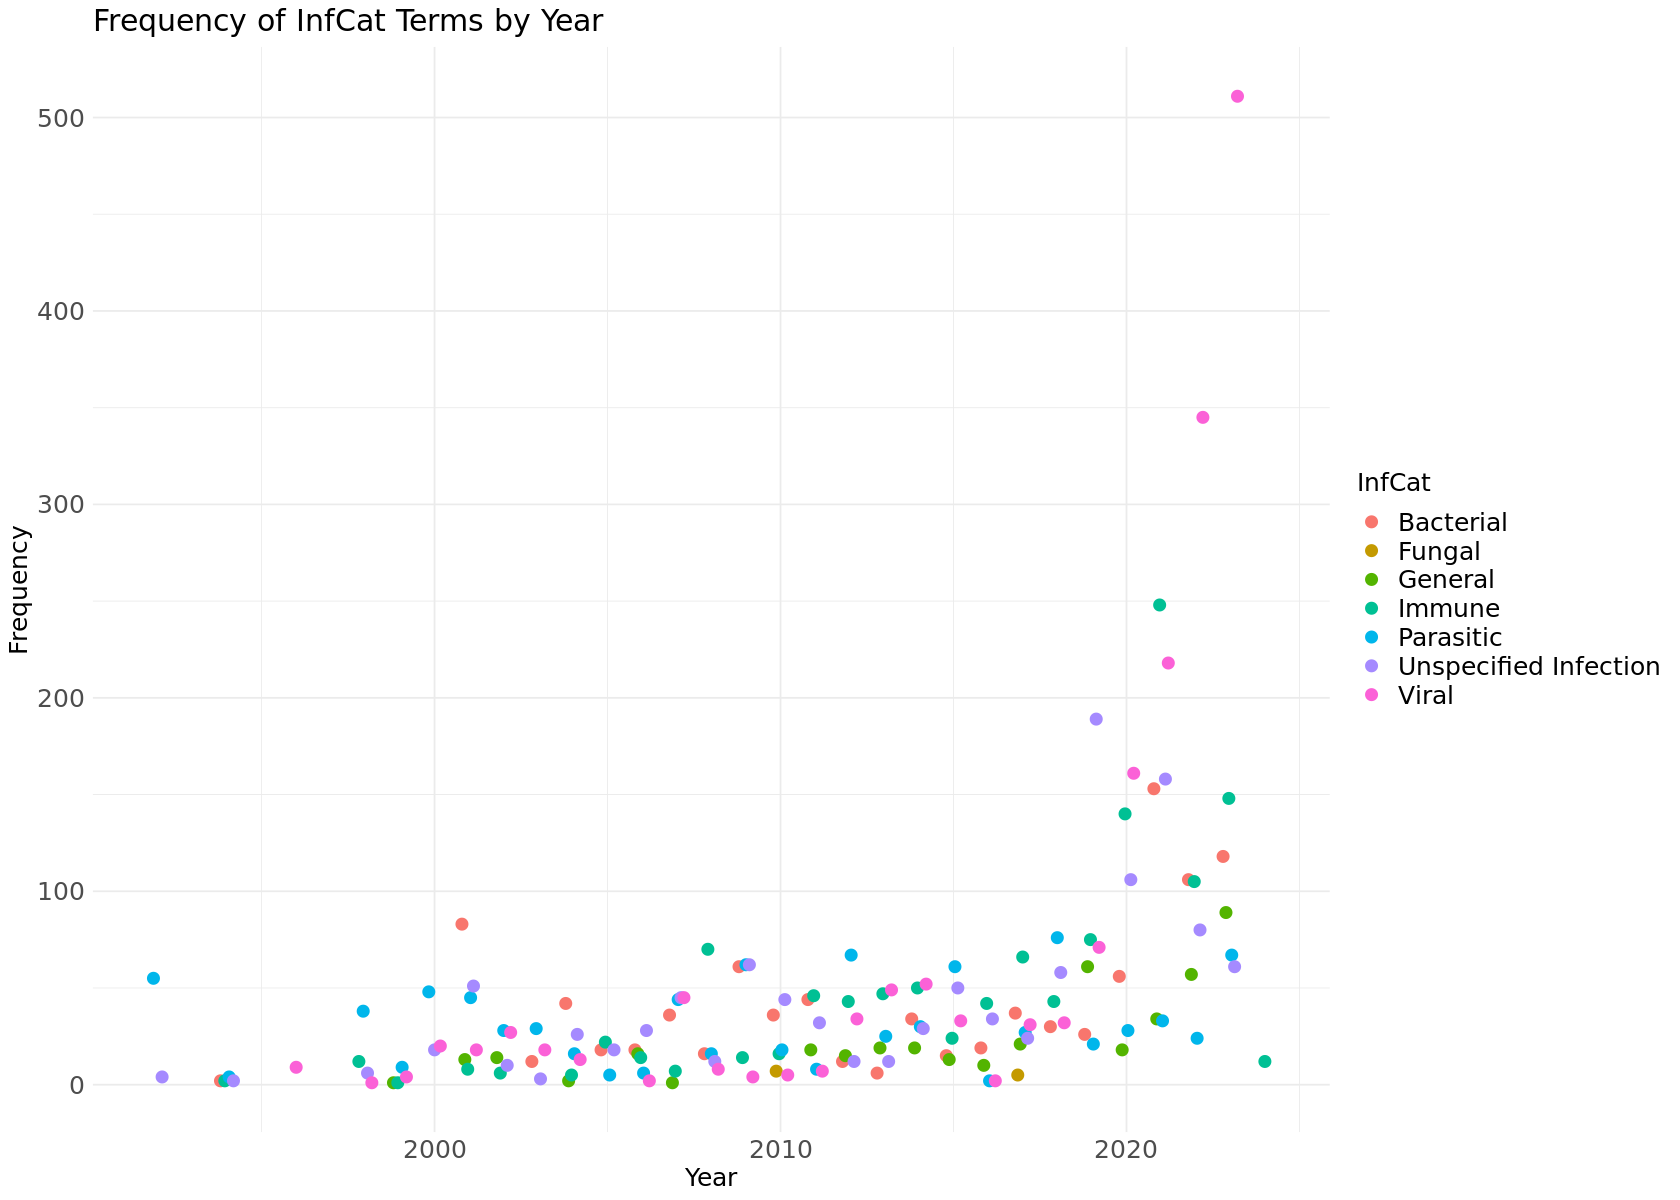

In [37]:
# Infection

options(repr.plot.width = 14, repr.plot.height = 10)

# Count the number of InfCat entries per year
infcat_counts <- datMetaNutInfPreg %>%
  group_by(year, InfCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(infcat_counts, aes(x = year, y = count, color = InfCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of InfCat Terms by Year",
    x = "Year",
    y = "Frequency",
    color = "InfCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )


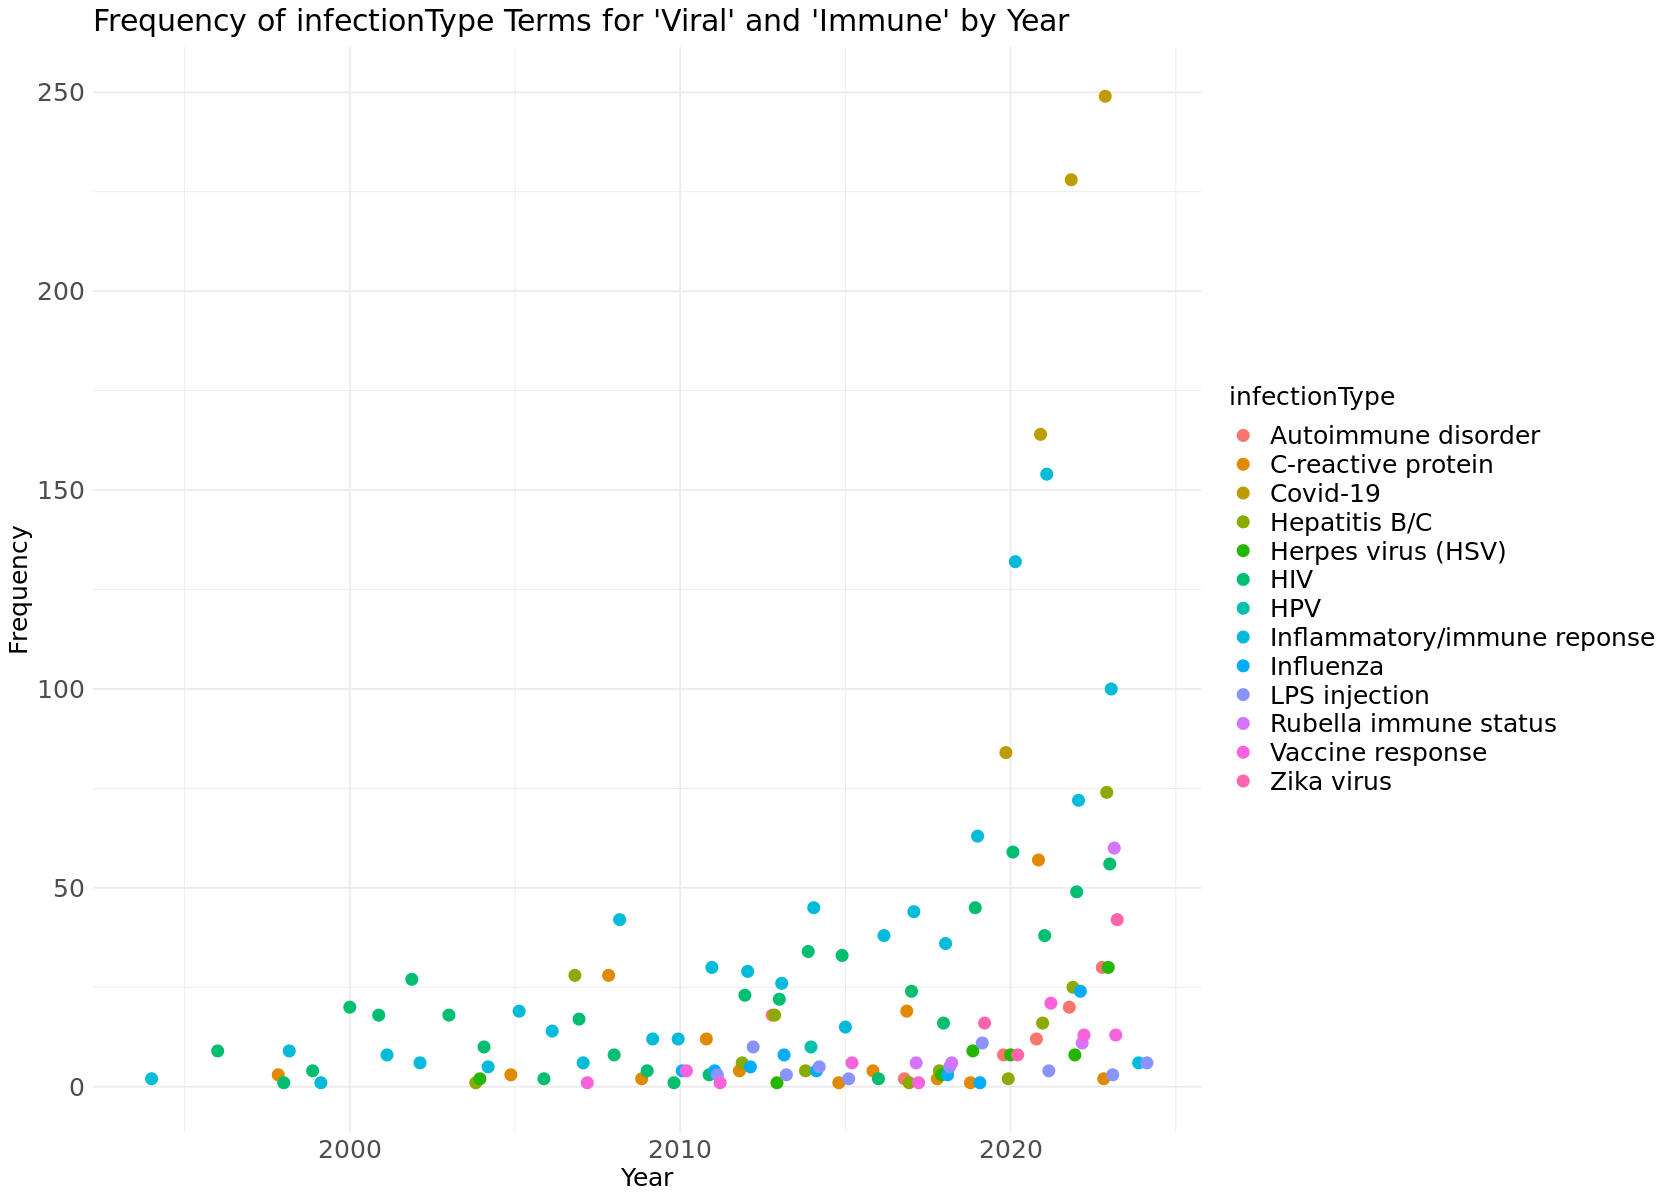

In [38]:
# Is this driven by Covid?


filtered_df <- datMetaNutInfPreg %>% filter(InfCat %in% c("Viral", "Immune"))

# Count the number of nutritionType entries per year for the NutCat Anthropometrics
inftype_counts <- filtered_df %>%
  group_by(year, infectionType) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot
ggplot(inftype_counts, aes(x = year, y = count, color = infectionType)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  labs(
    title = "Frequency of infectionType Terms for 'Viral' and 'Immune' by Year",
    x = "Year",
    y = "Frequency",
    color = "infectionType"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )


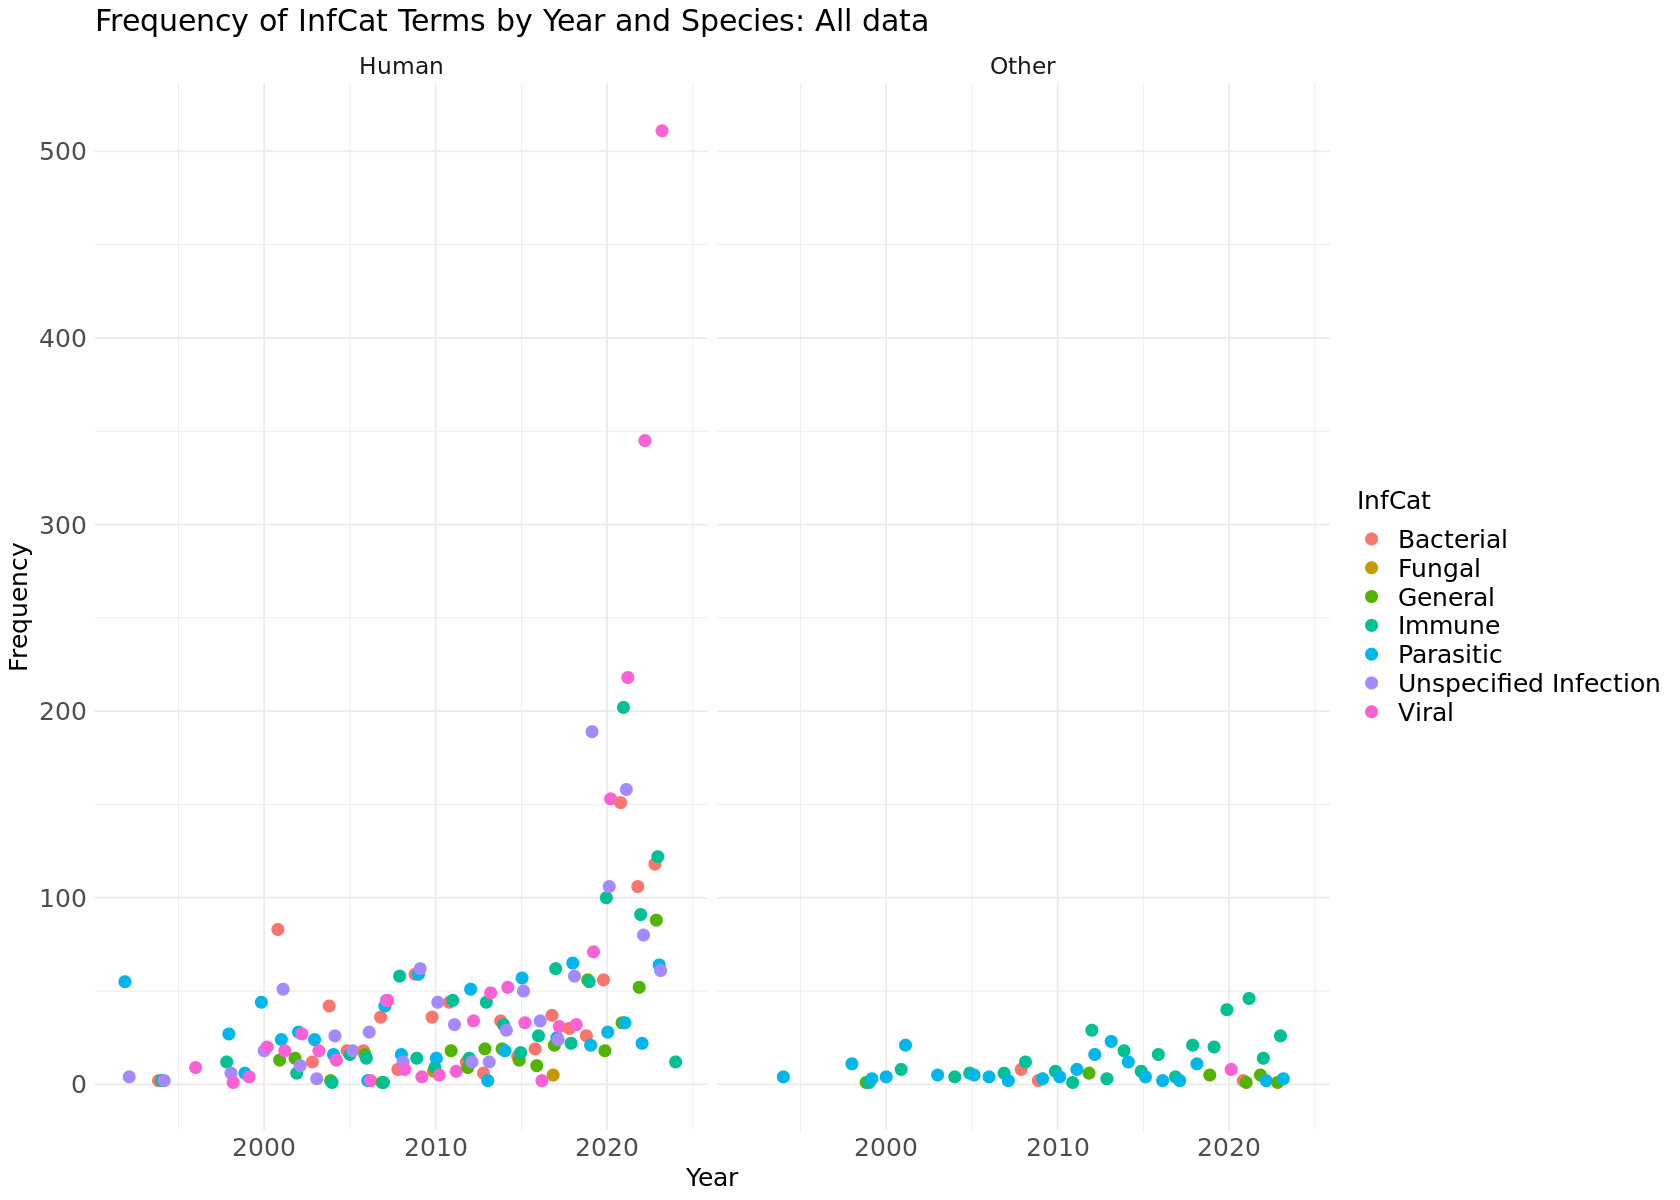

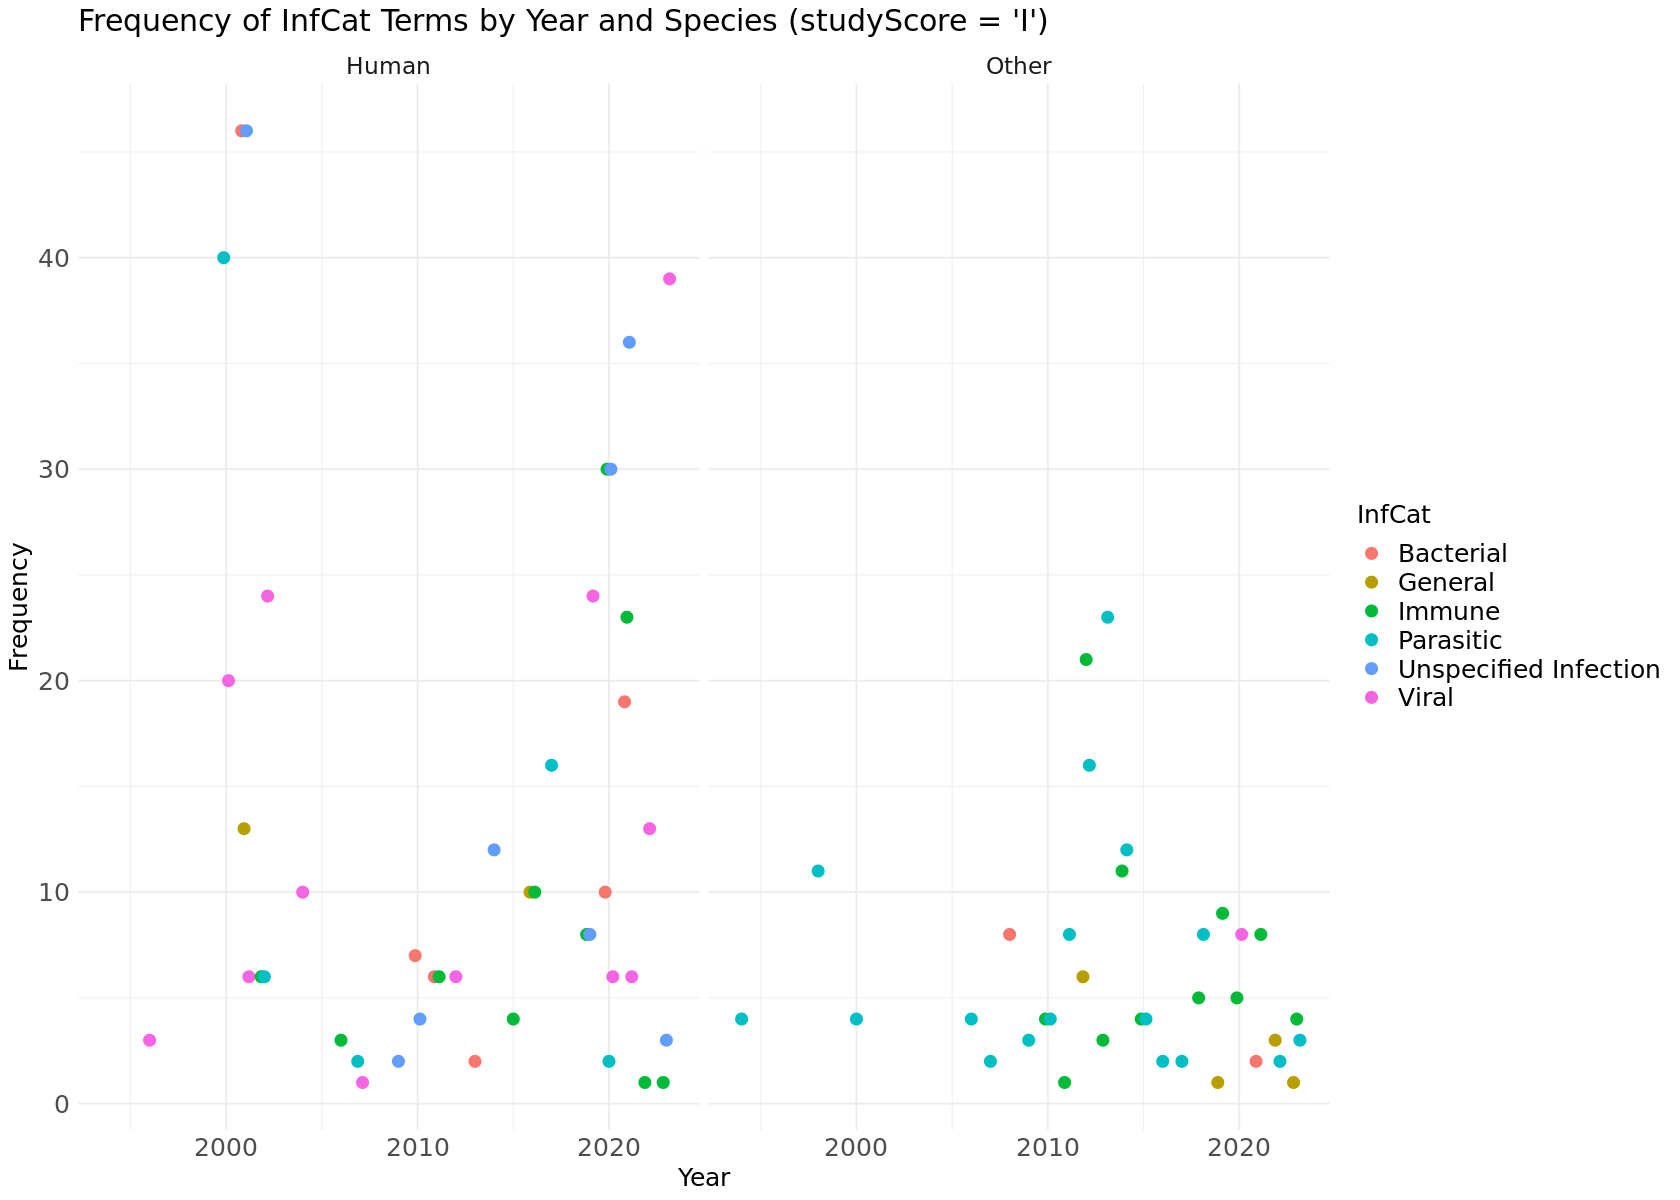

In [39]:
# Is this true for Human and Other?

options(repr.plot.width = 14, repr.plot.height = 10)


# Count InfCat entries per year and species
infcat_counts <- datMetaNutInfPreg %>%
  group_by(year, InfCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(infcat_counts, aes(x = year, y = count, color = InfCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of InfCat Terms by Year and Species: All data",
    x = "Year",
    y = "Frequency",
    color = "InfCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )




# Filter for studyScore == "I" and count NutCat entries per year and species
infcat_counts_I <- datMetaNutInfPreg %>%
  filter(studyScore == "I") %>%
  group_by(year, InfCat, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(infcat_counts_I, aes(x = year, y = count, color = InfCat)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of InfCat Terms by Year and Species (studyScore = 'I')",
    x = "Year",
    y = "Frequency",
    color = "InfCat"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(size = 18), # Title text size
    axis.title = element_text(size = 15), # Axis titles
    axis.text = element_text(size = 15), # Axis tick labels
    legend.title = element_text(size = 15), # Legend title
    legend.text = element_text(size = 15), # Legend labels
    strip.text = element_text(size = 14) # Facet labels
    )


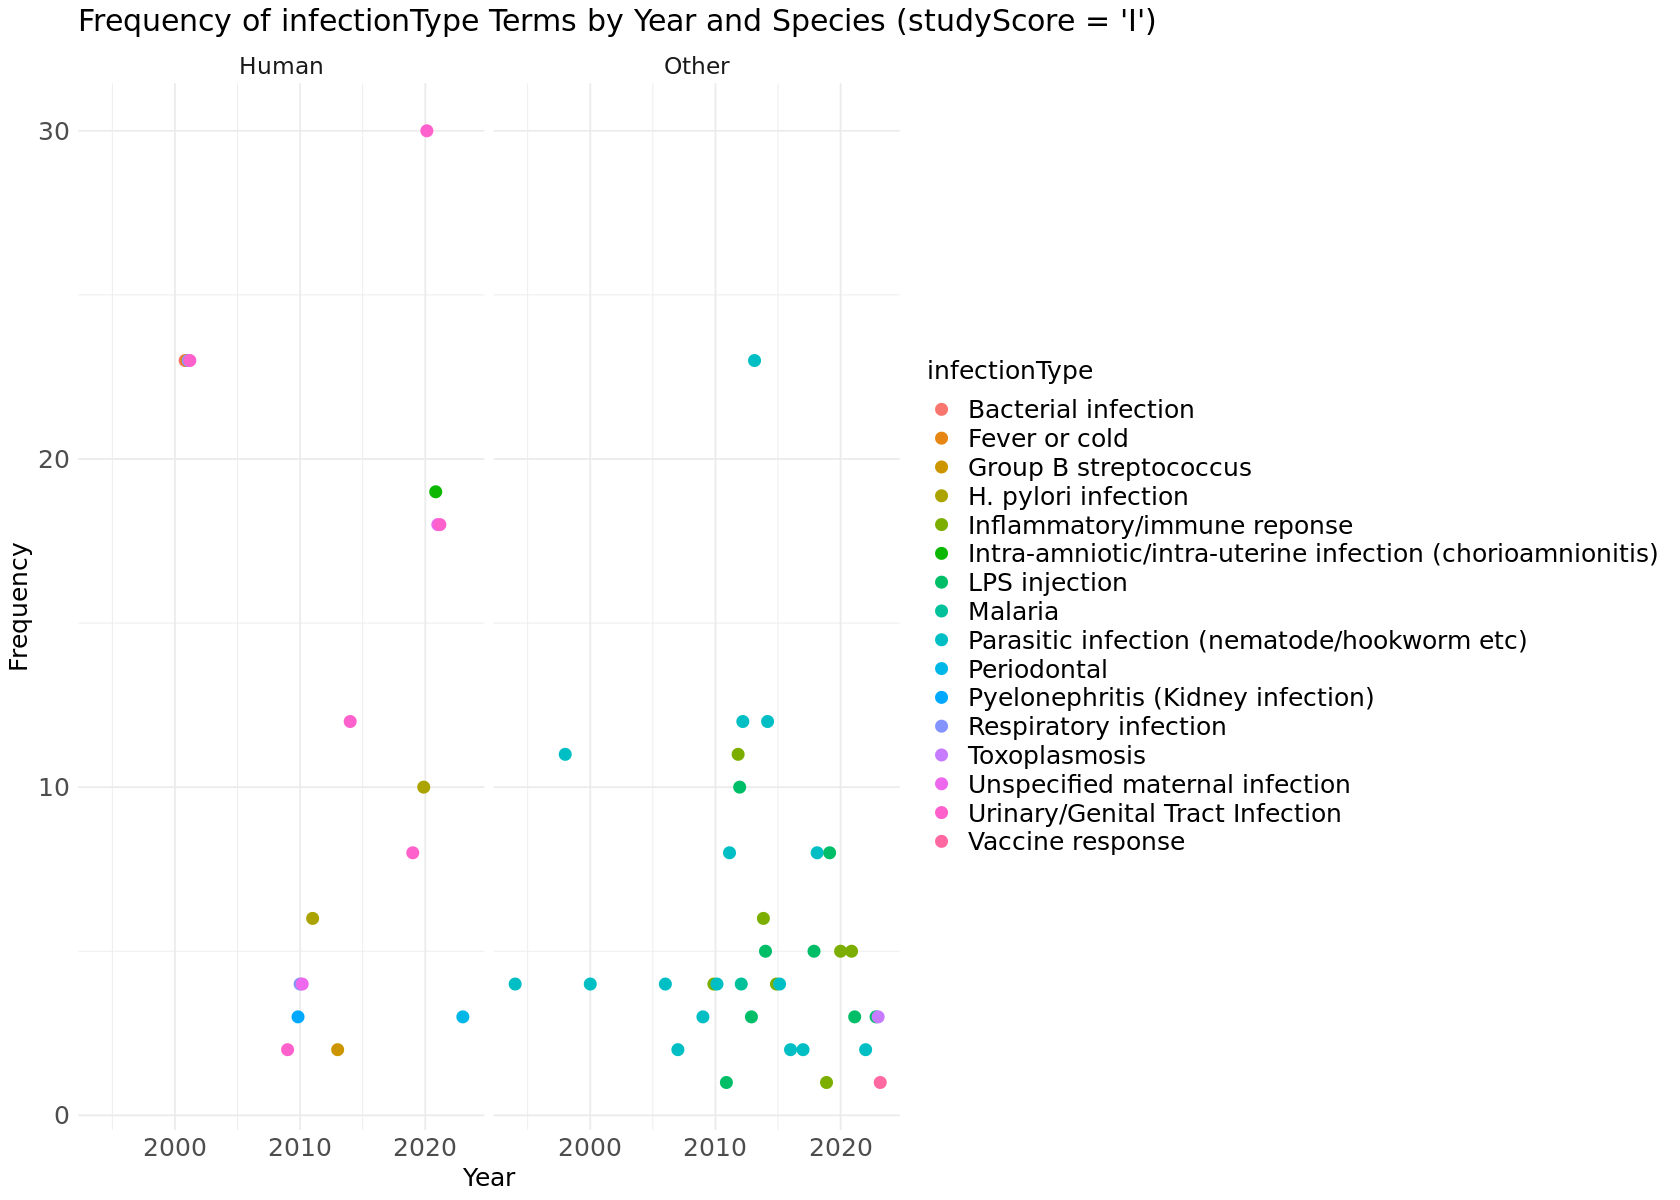

In [40]:
# What are these high points? 

options(repr.plot.width = 14, repr.plot.height = 10)

# Filter for studyScore == "I" and specific InfCat values by speciesCat
infcat_counts_I <- datMetaNutInfPreg %>%
  filter(
    studyScore == "I" &
    (
      (speciesCat == "Human" & InfCat %in% c("Unspecified Infection", "Bacterial")) |
      (speciesCat == "Other" & InfCat %in% c("Parasitic", "Immune"))
    )
  ) %>%
  group_by(year, infectionType, speciesCat) %>%
  summarise(count = n(), .groups = 'drop')

# Create the dot plot with facets for speciesCat
ggplot(infcat_counts_I, aes(x = year, y = count, color = infectionType)) +
  geom_point(size = 3, position = position_dodge(width = 0.5)) +
  facet_wrap(~ speciesCat) +
  labs(
    title = "Frequency of infectionType Terms by Year and Species (studyScore = 'I')",
    x = "Year",
    y = "Frequency",
    color = "infectionType"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18),
    axis.title = element_text(size = 15),
    axis.text = element_text(size = 15),
    legend.title = element_text(size = 15),
    legend.text = element_text(size = 15),
    strip.text = element_text(size = 14)
  )


In [41]:
# Pregnancy Terms

[1] 5988   15

[1] 477  15

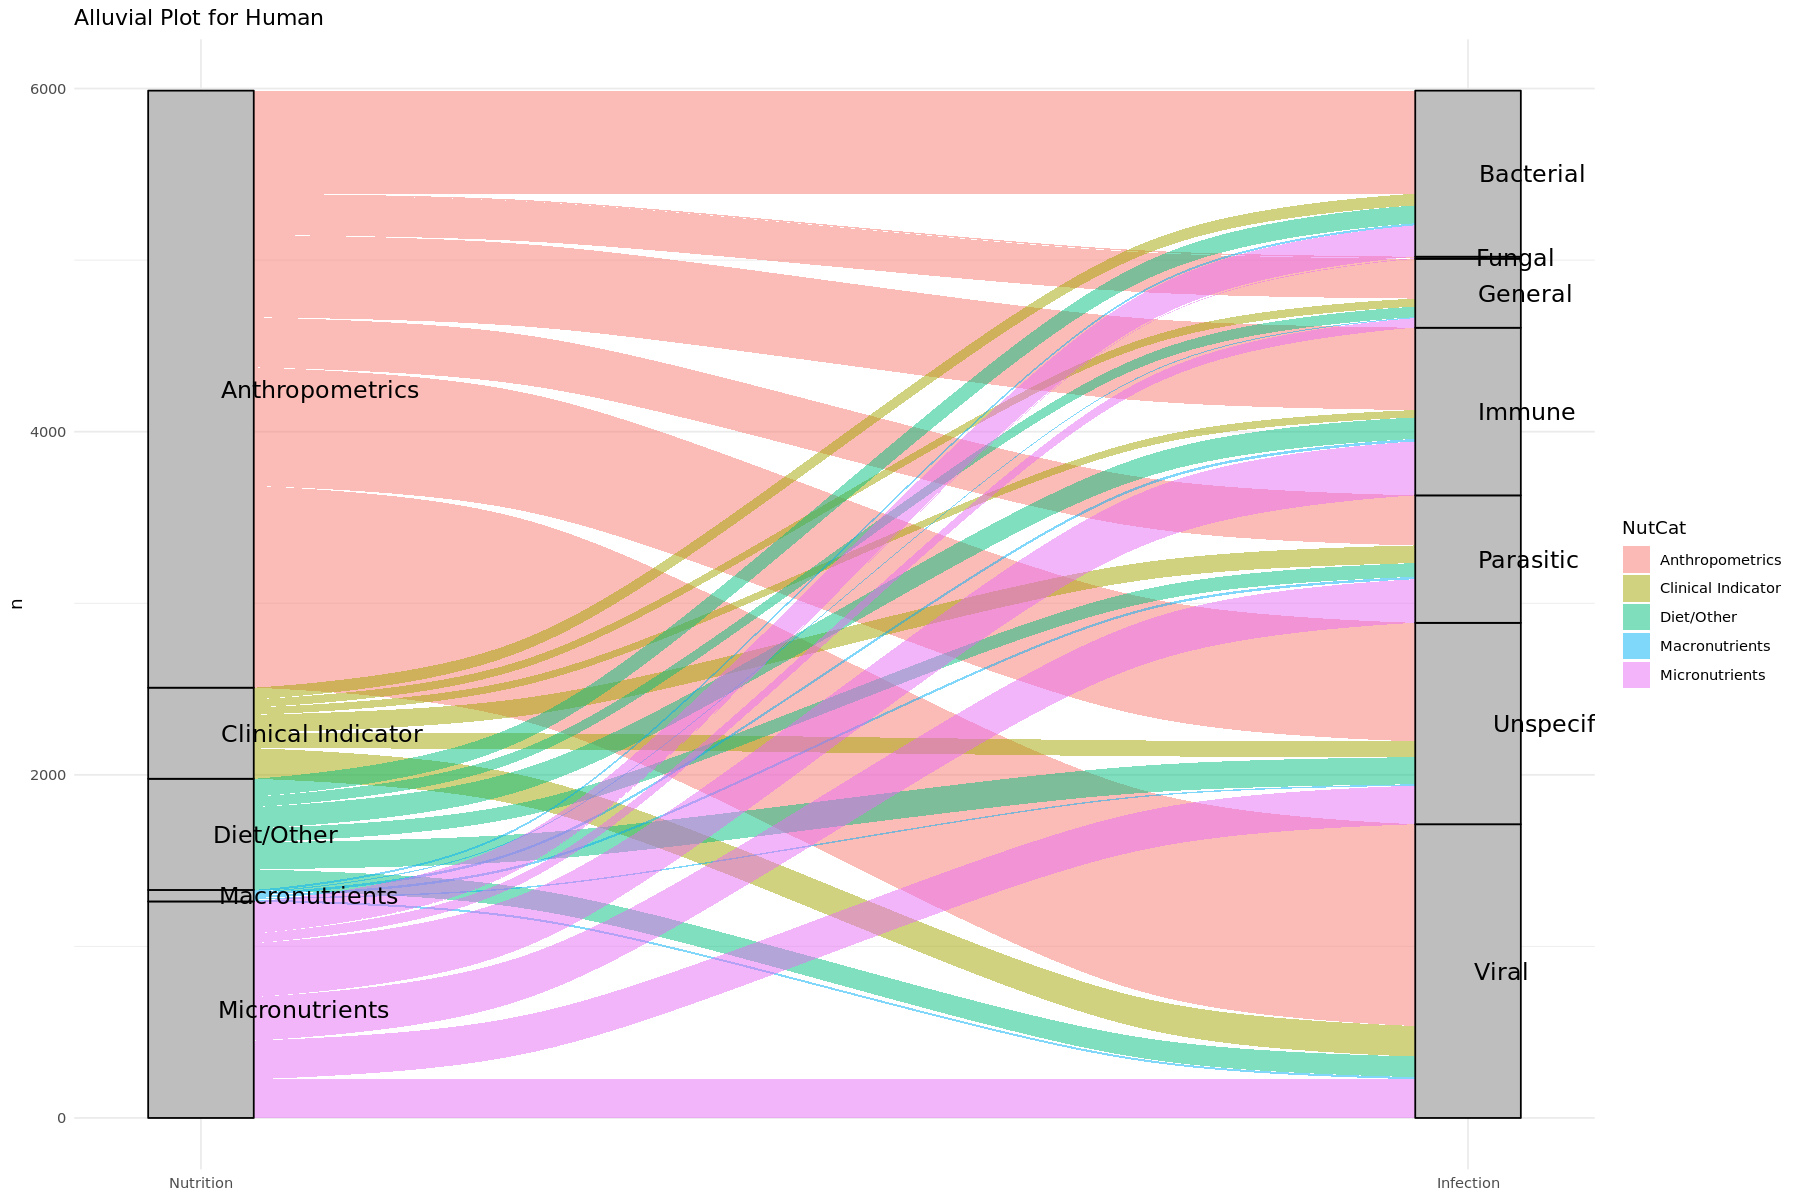

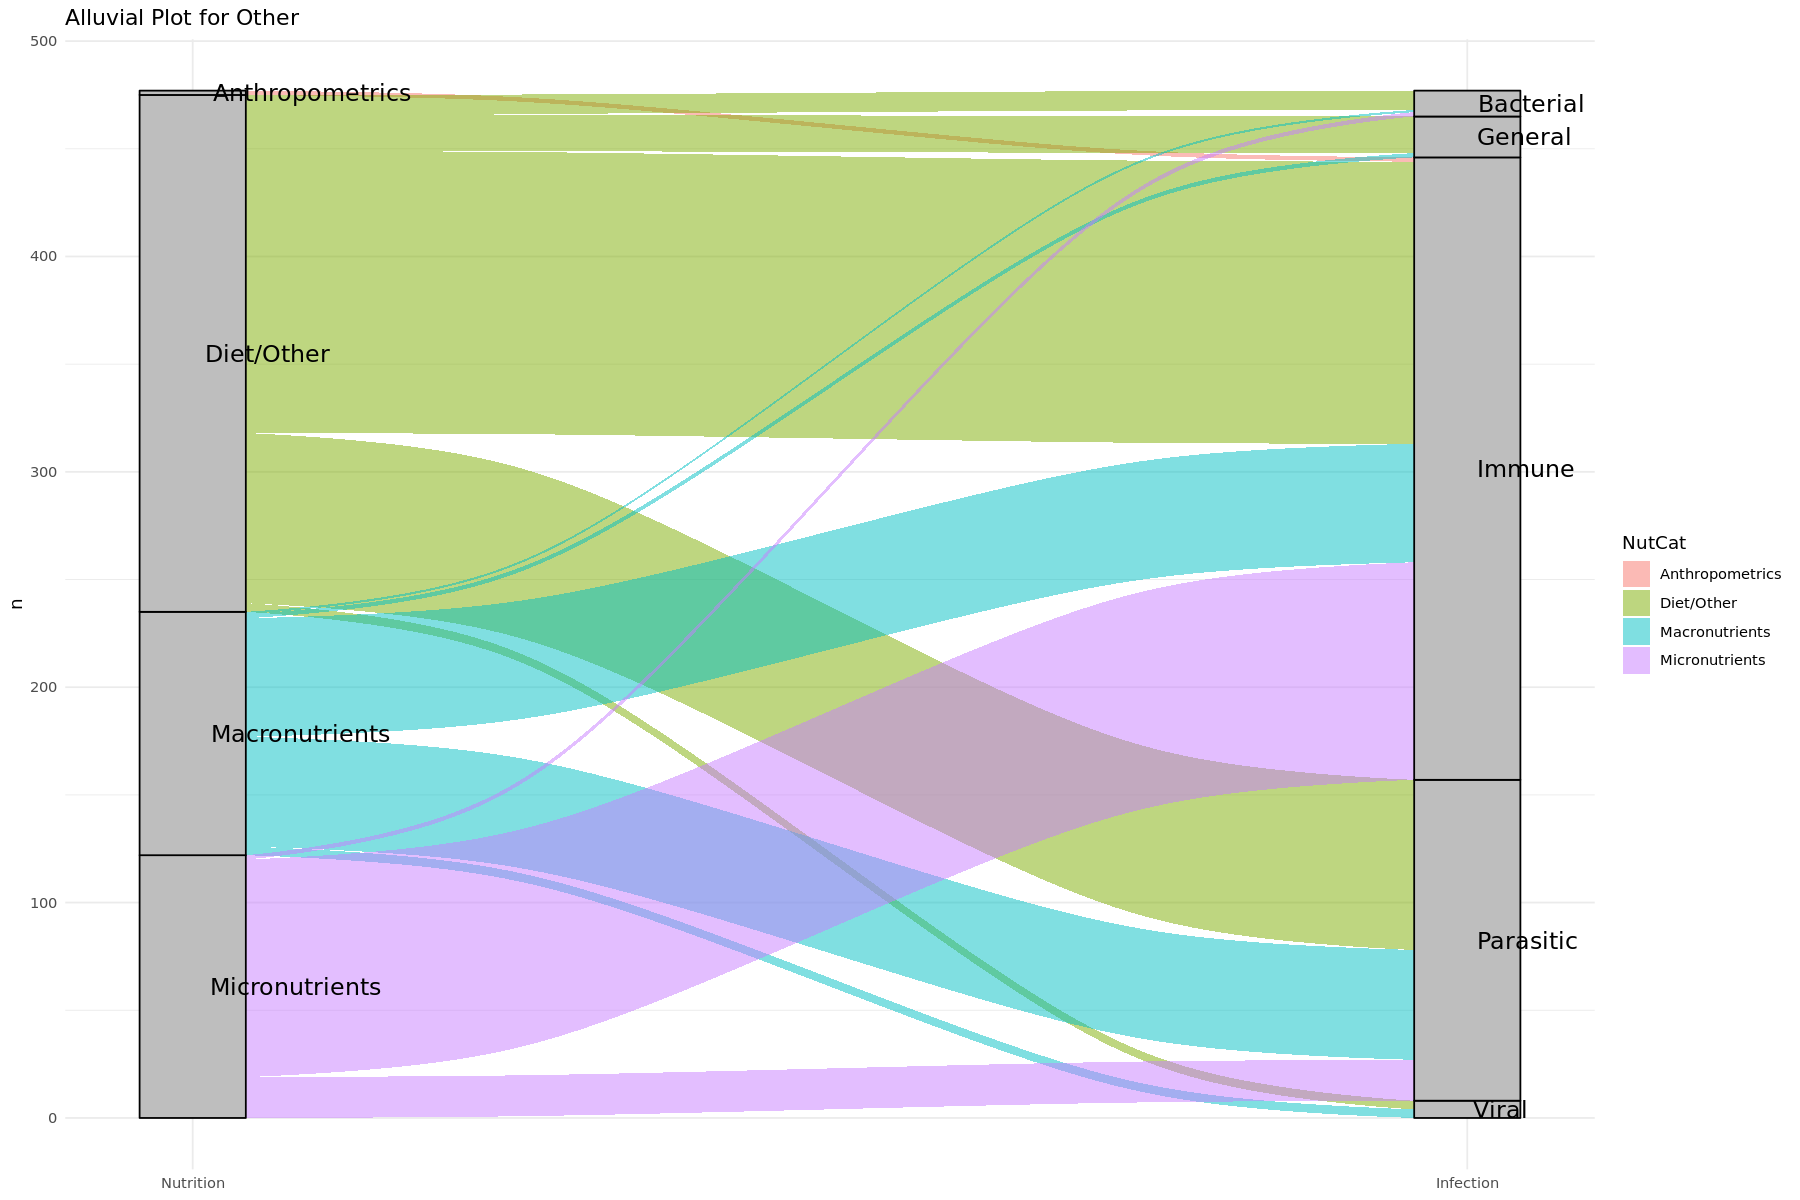

In [42]:
# Alluvial plots 

# Load required packages
library(ggplot2)
library(ggalluvial)
library(dplyr)

# Inf ~ Nutrition categories for all studies

# Function to plot alluvial diagram
plot_alluvial <- function(data, title) {
# Aggregate data to count flows
    flow_data <- data %>%
    count(NutCat, InfCat)

    ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 5, hjust = -0.1) +
    scale_x_discrete(limits = c("Nutrition", "Infection"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal()
}

#set the default width of figures in notebook

options(repr.plot.width = 15, repr.plot.height = 10)


# Plot for Human
dim(datMetaNutInfPreg %>% filter(speciesCat == "Human"))
plot_alluvial(datMetaNutInfPreg %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
dim(datMetaNutInfPreg %>% filter(speciesCat == "Other"))
plot_alluvial(datMetaNutInfPreg %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")

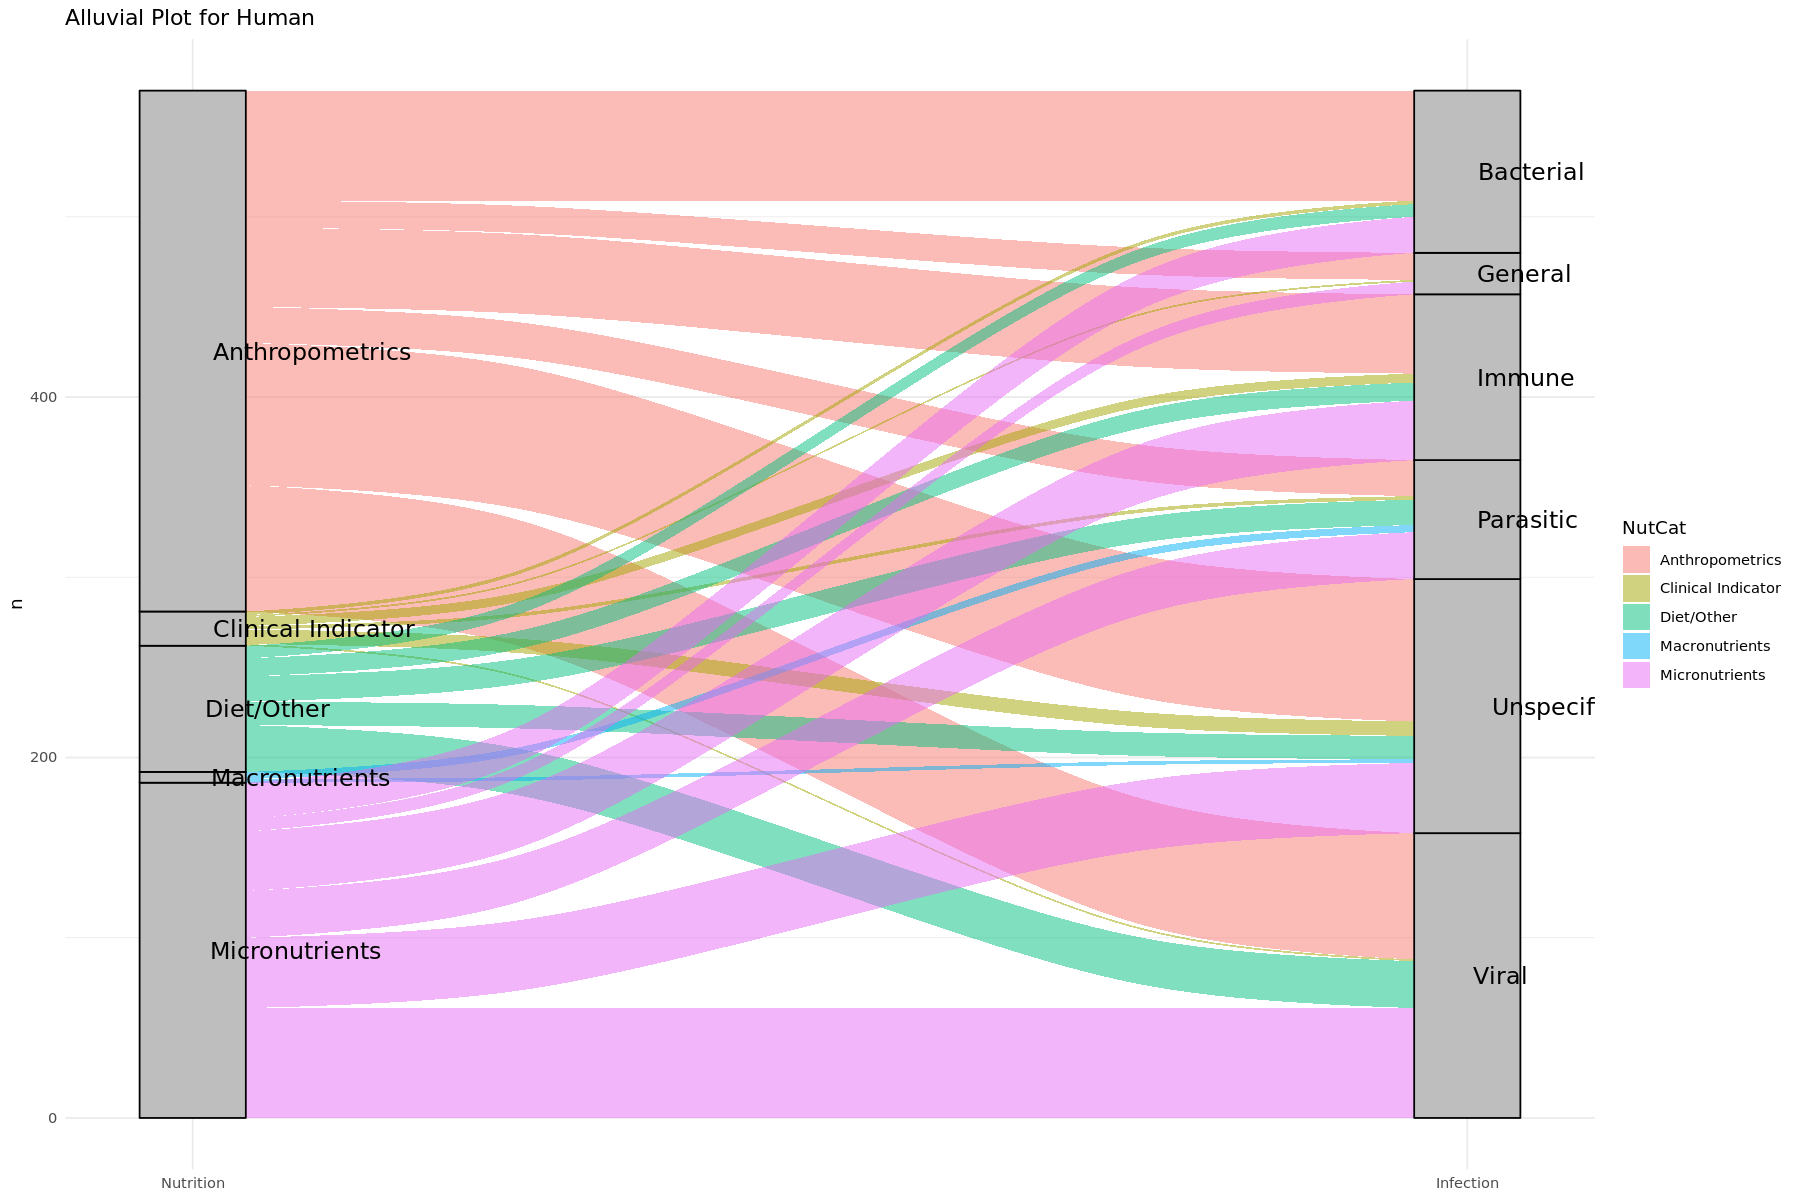

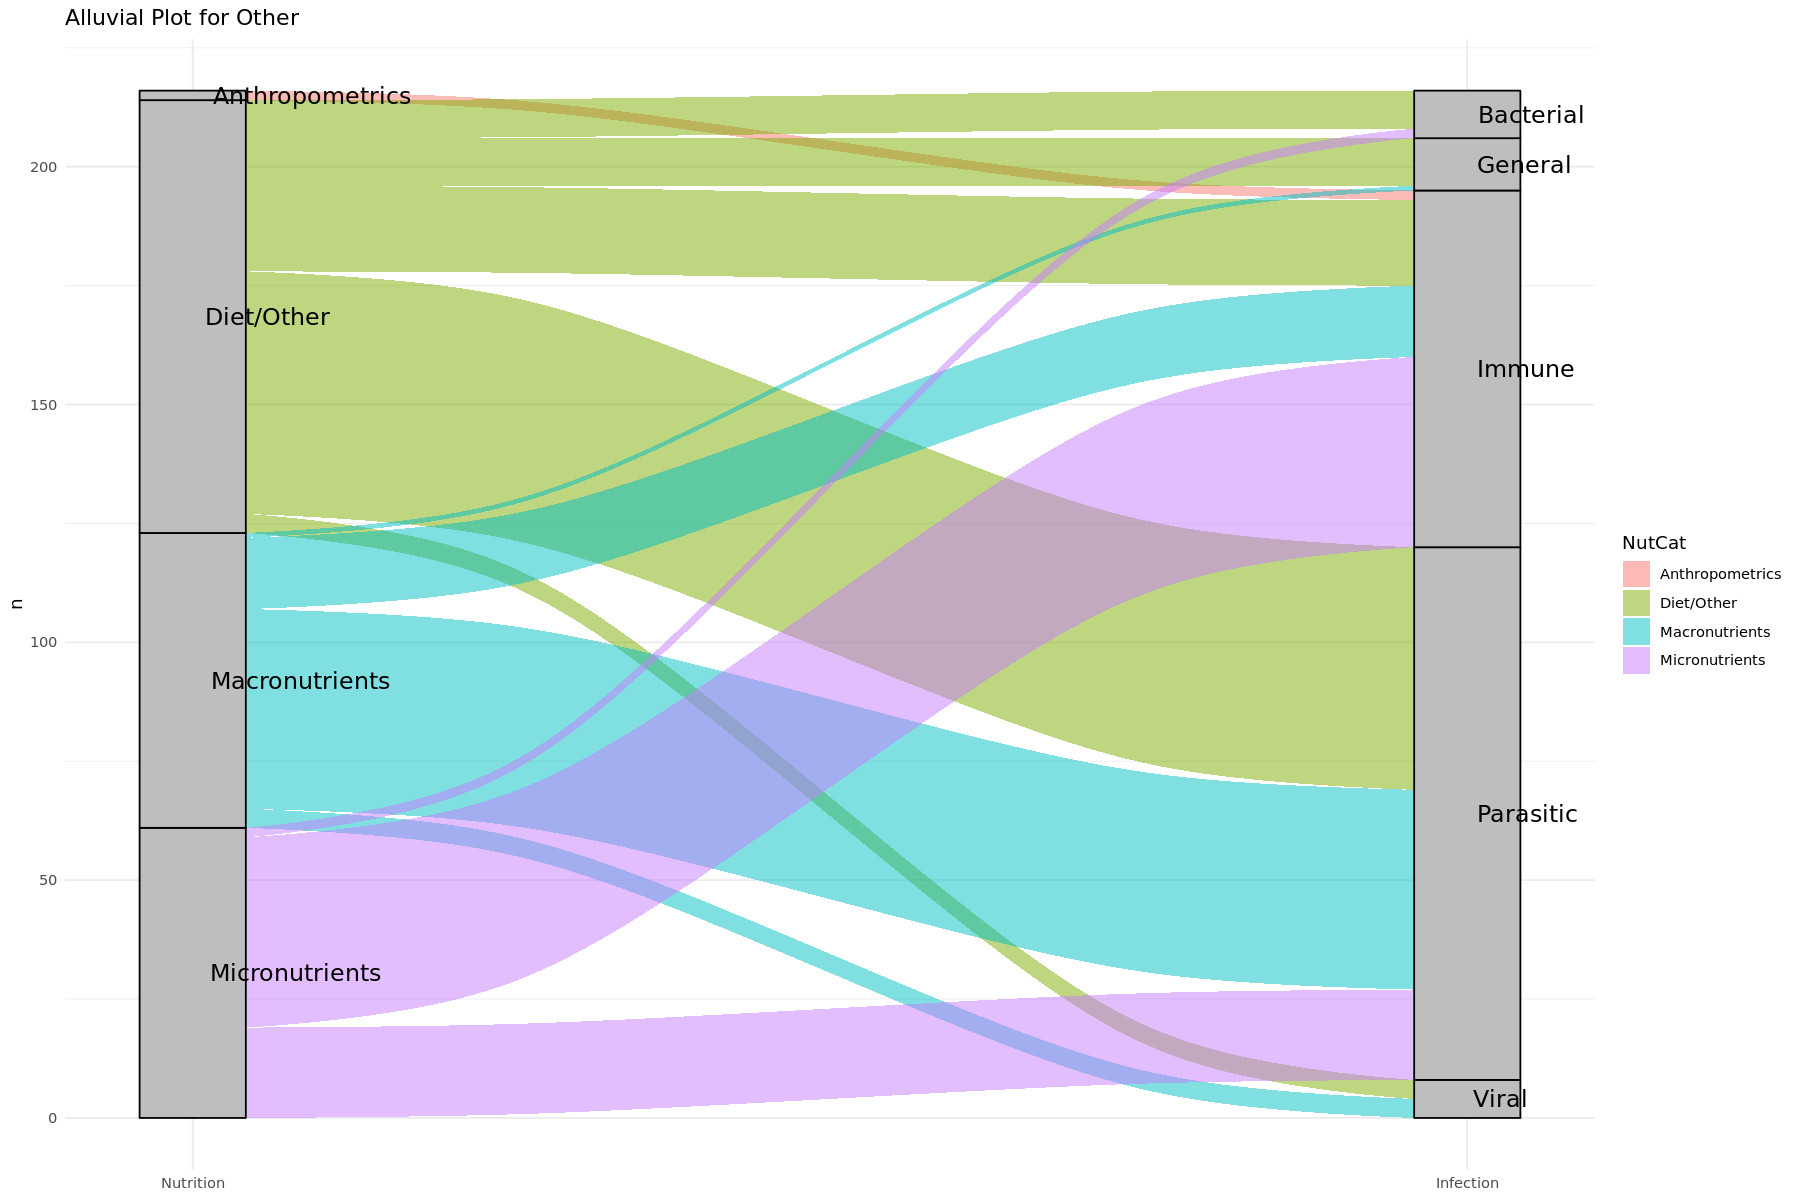

In [43]:
# StudyType I only

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot alluvial diagram
plot_alluvial <- function(data, title) {
# Aggregate data to count flows
    flow_data <- data %>%
    count(NutCat, InfCat)

    ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 5, hjust = -0.1) +
    scale_x_discrete(limits = c("Nutrition", "Infection"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal()
}

#set the default width of figures in notebook

options(repr.plot.width = 15, repr.plot.height = 10)


# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")


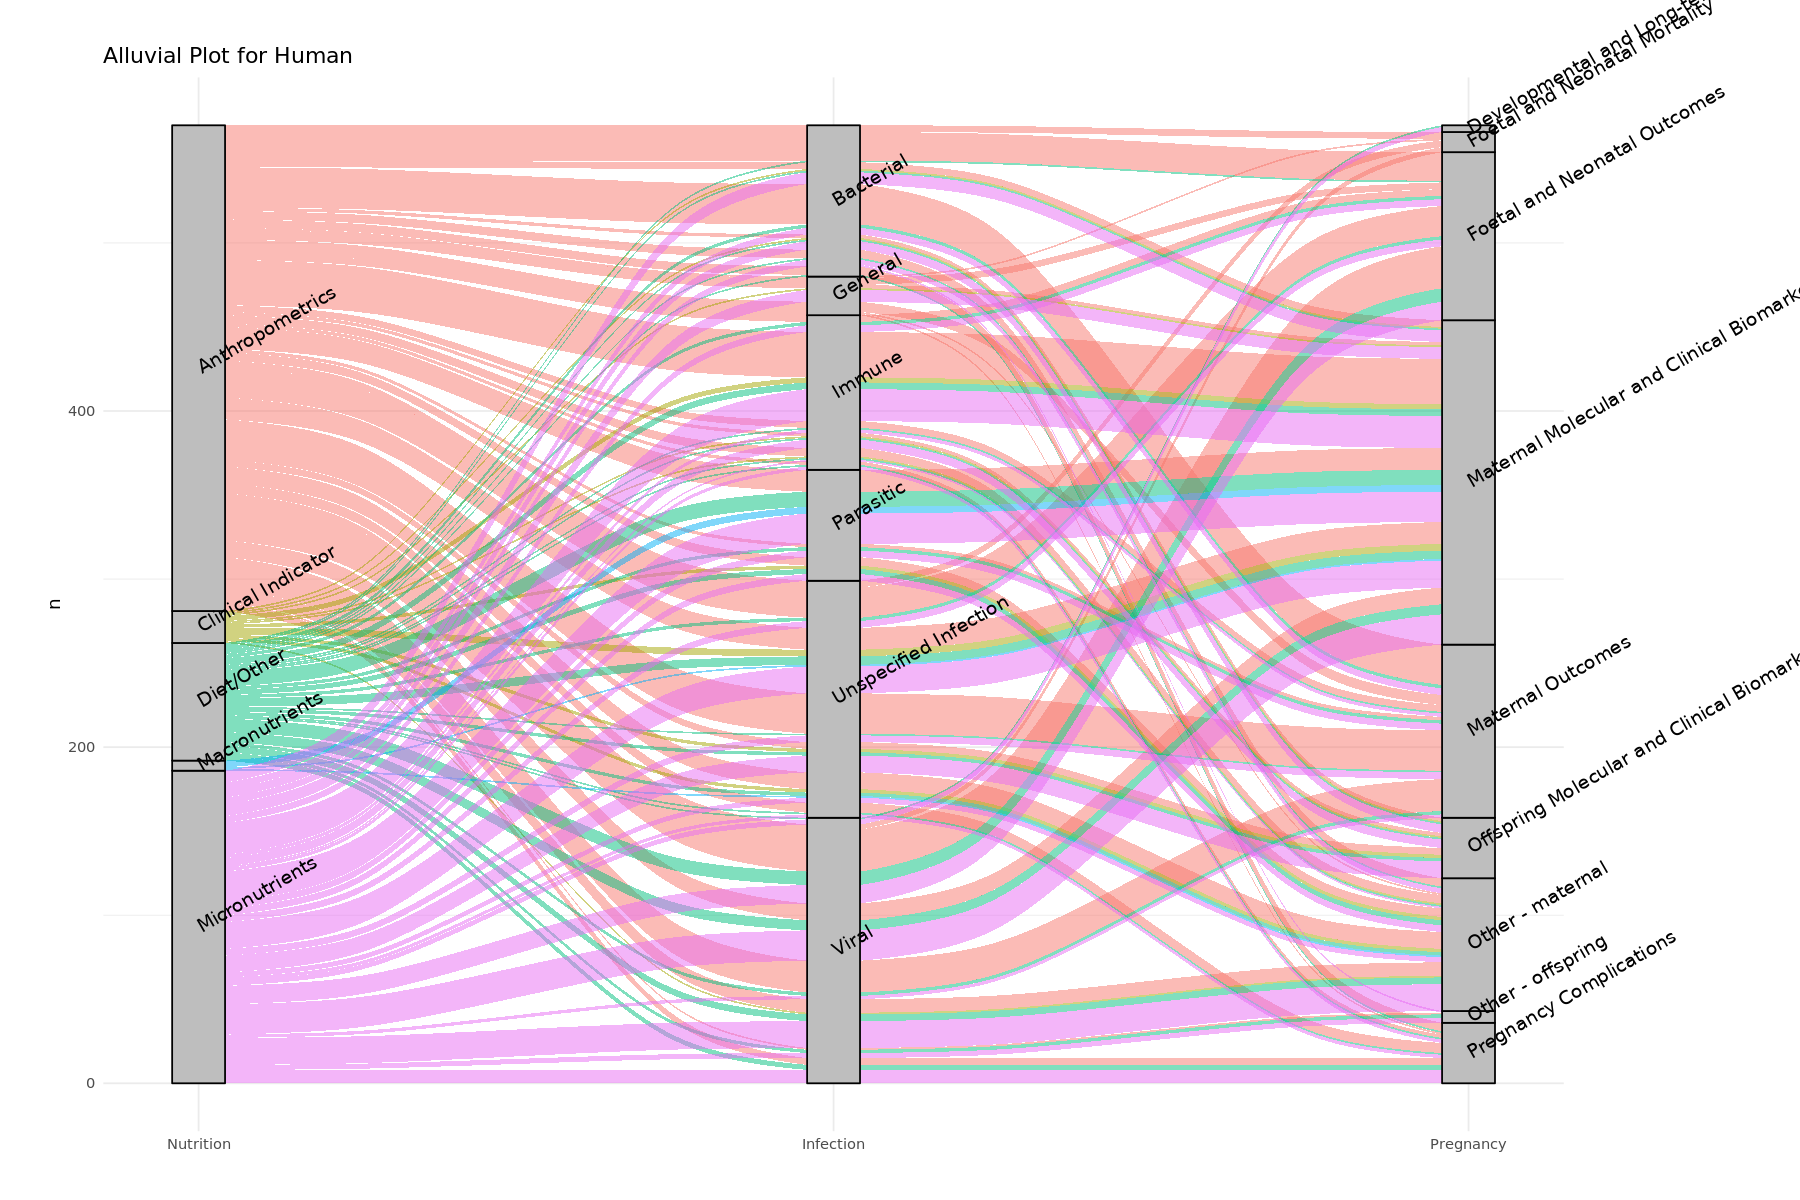

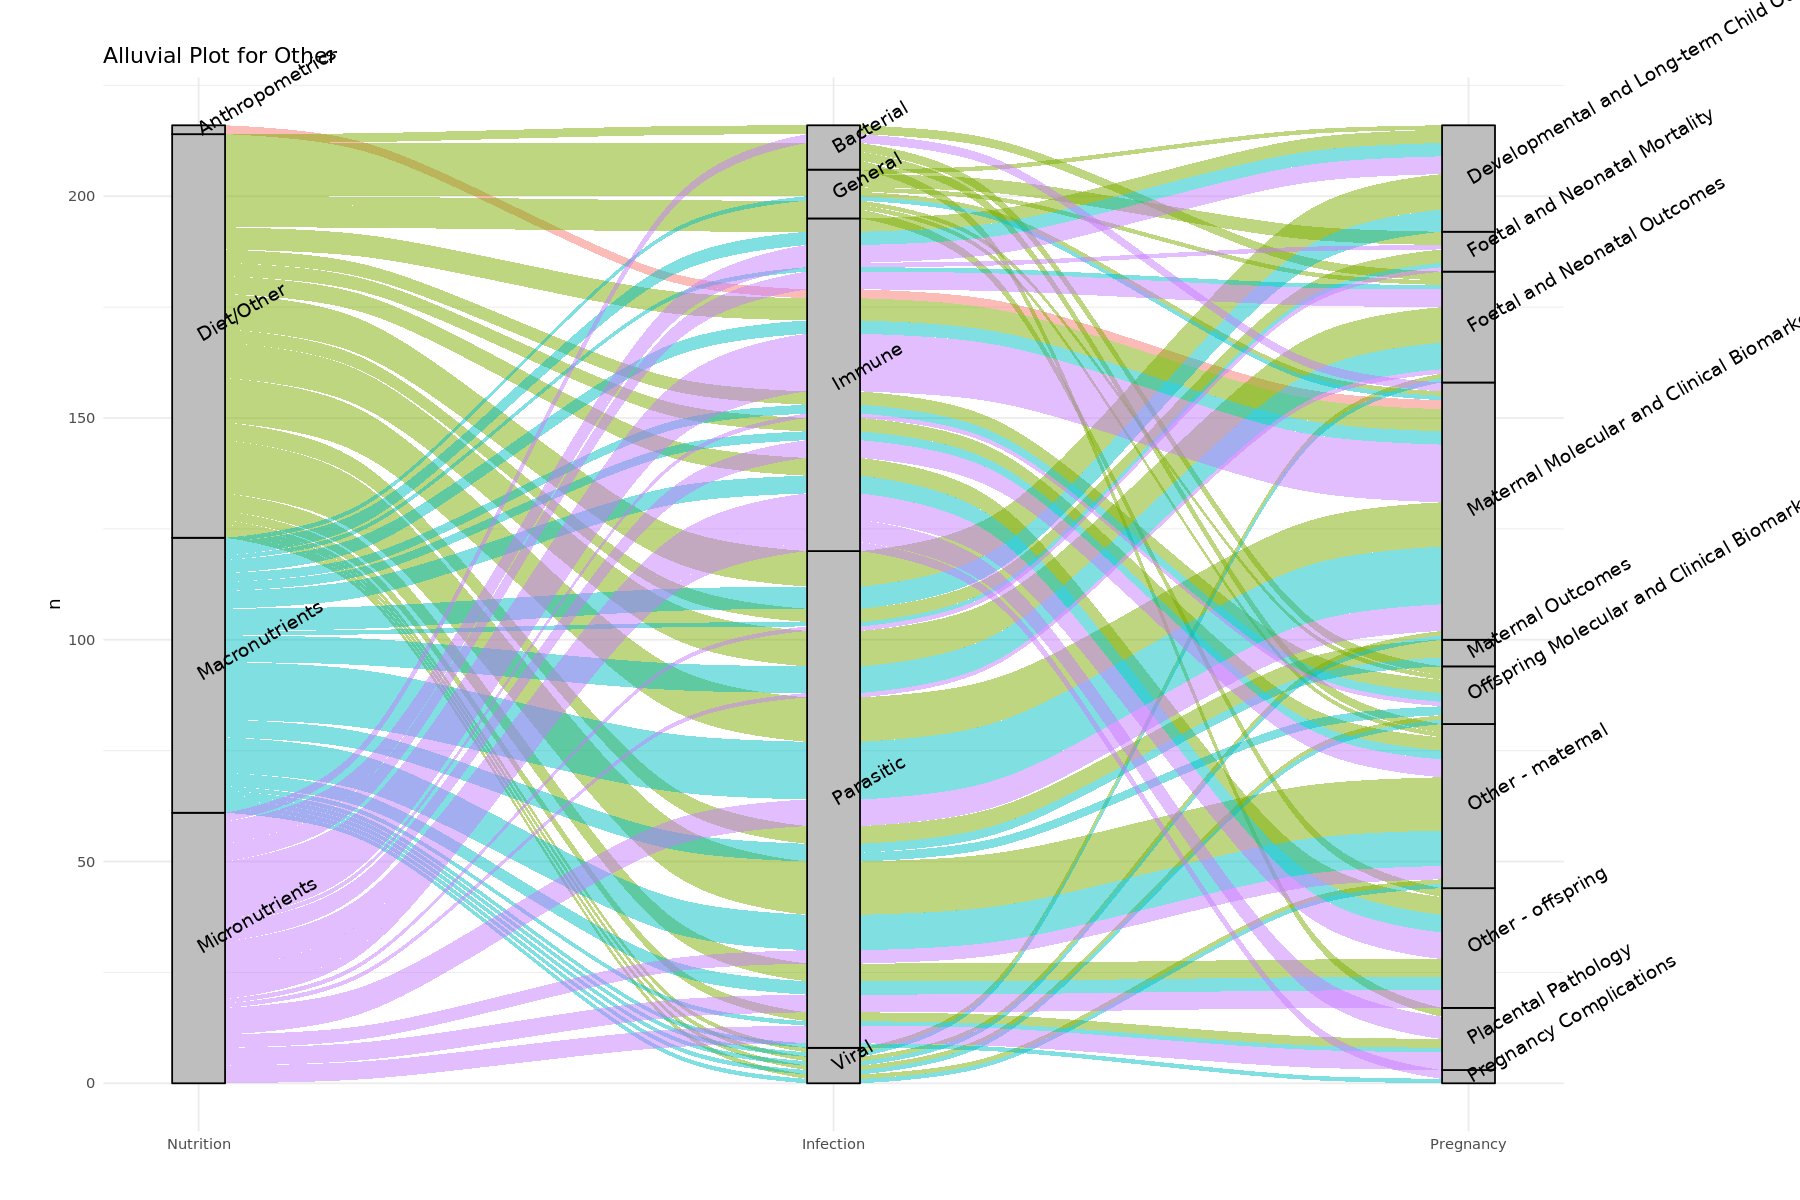

In [44]:
#Increase Binder figure size
#options(repr.plot.width = 50, repr.plot.height = 10)

# Load required packages
library(ggplot2)
library(ggalluvial)
library(dplyr)

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot three-level alluvial diagram
plot_alluvial <- function(data, title) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, PregCat)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = PregCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 4, angle = 30, hjust = 0) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Pregnancy"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal() +
    theme(
        legend.position = "none",
        plot.margin = unit(c(1, 5, 1, 1), "cm")  # Increase right margin
) +
coord_cartesian(clip = "off")
  #print the labels beyond the extent of the figure
}

# Set the default width of figures in notebook
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")



In [45]:
#Sanity check: Are there no Placental Pathology outcomes in human studies? There are none for studyScore I, but there are for studyScore II
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I") %>% filter(speciesCat == "Human")
df_filtered %>% filter(PregCat == "Placental Pathology")

studyRef assessedBy firstAuthor year species countryStudy mainOutcome
     studyScore nutritionType NutCat infectionType InfCat pregnancyOutcomeType
     PregCat speciesCat

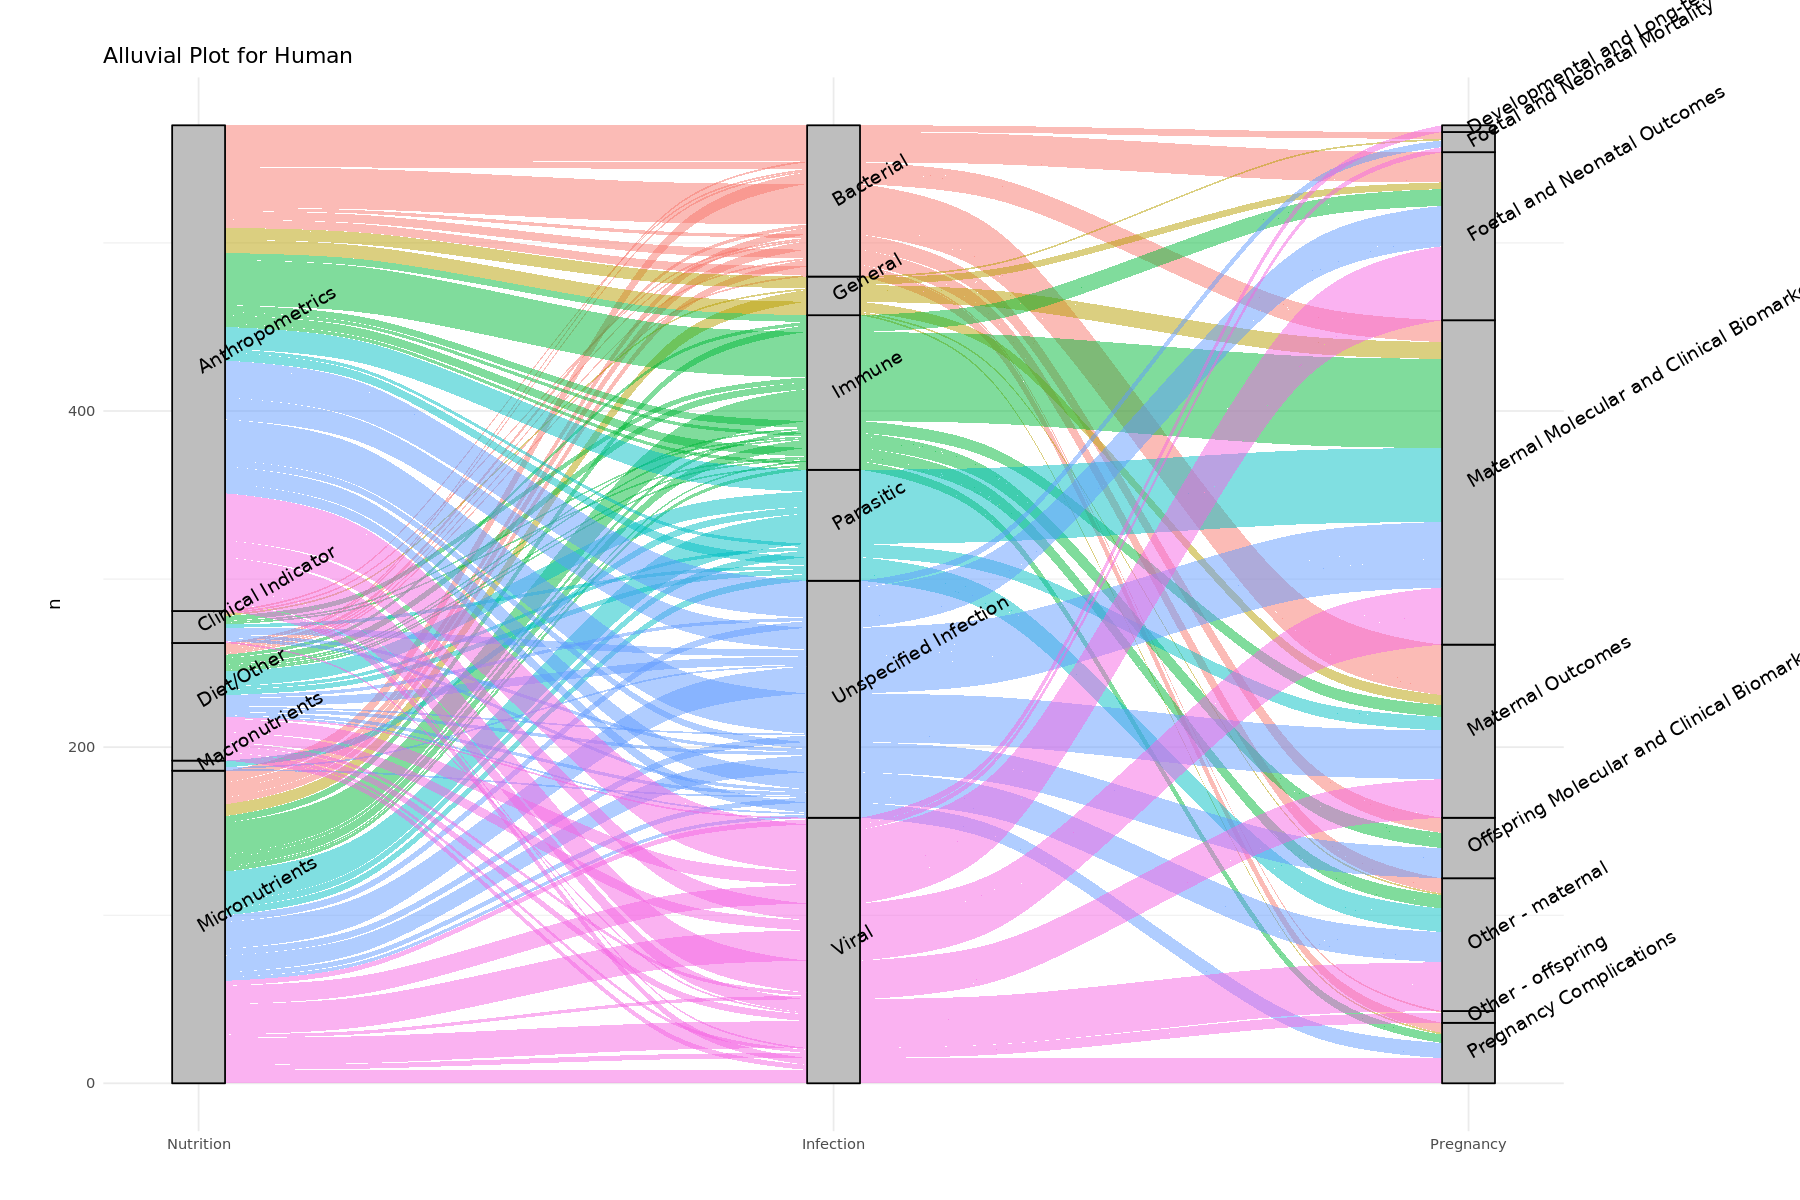

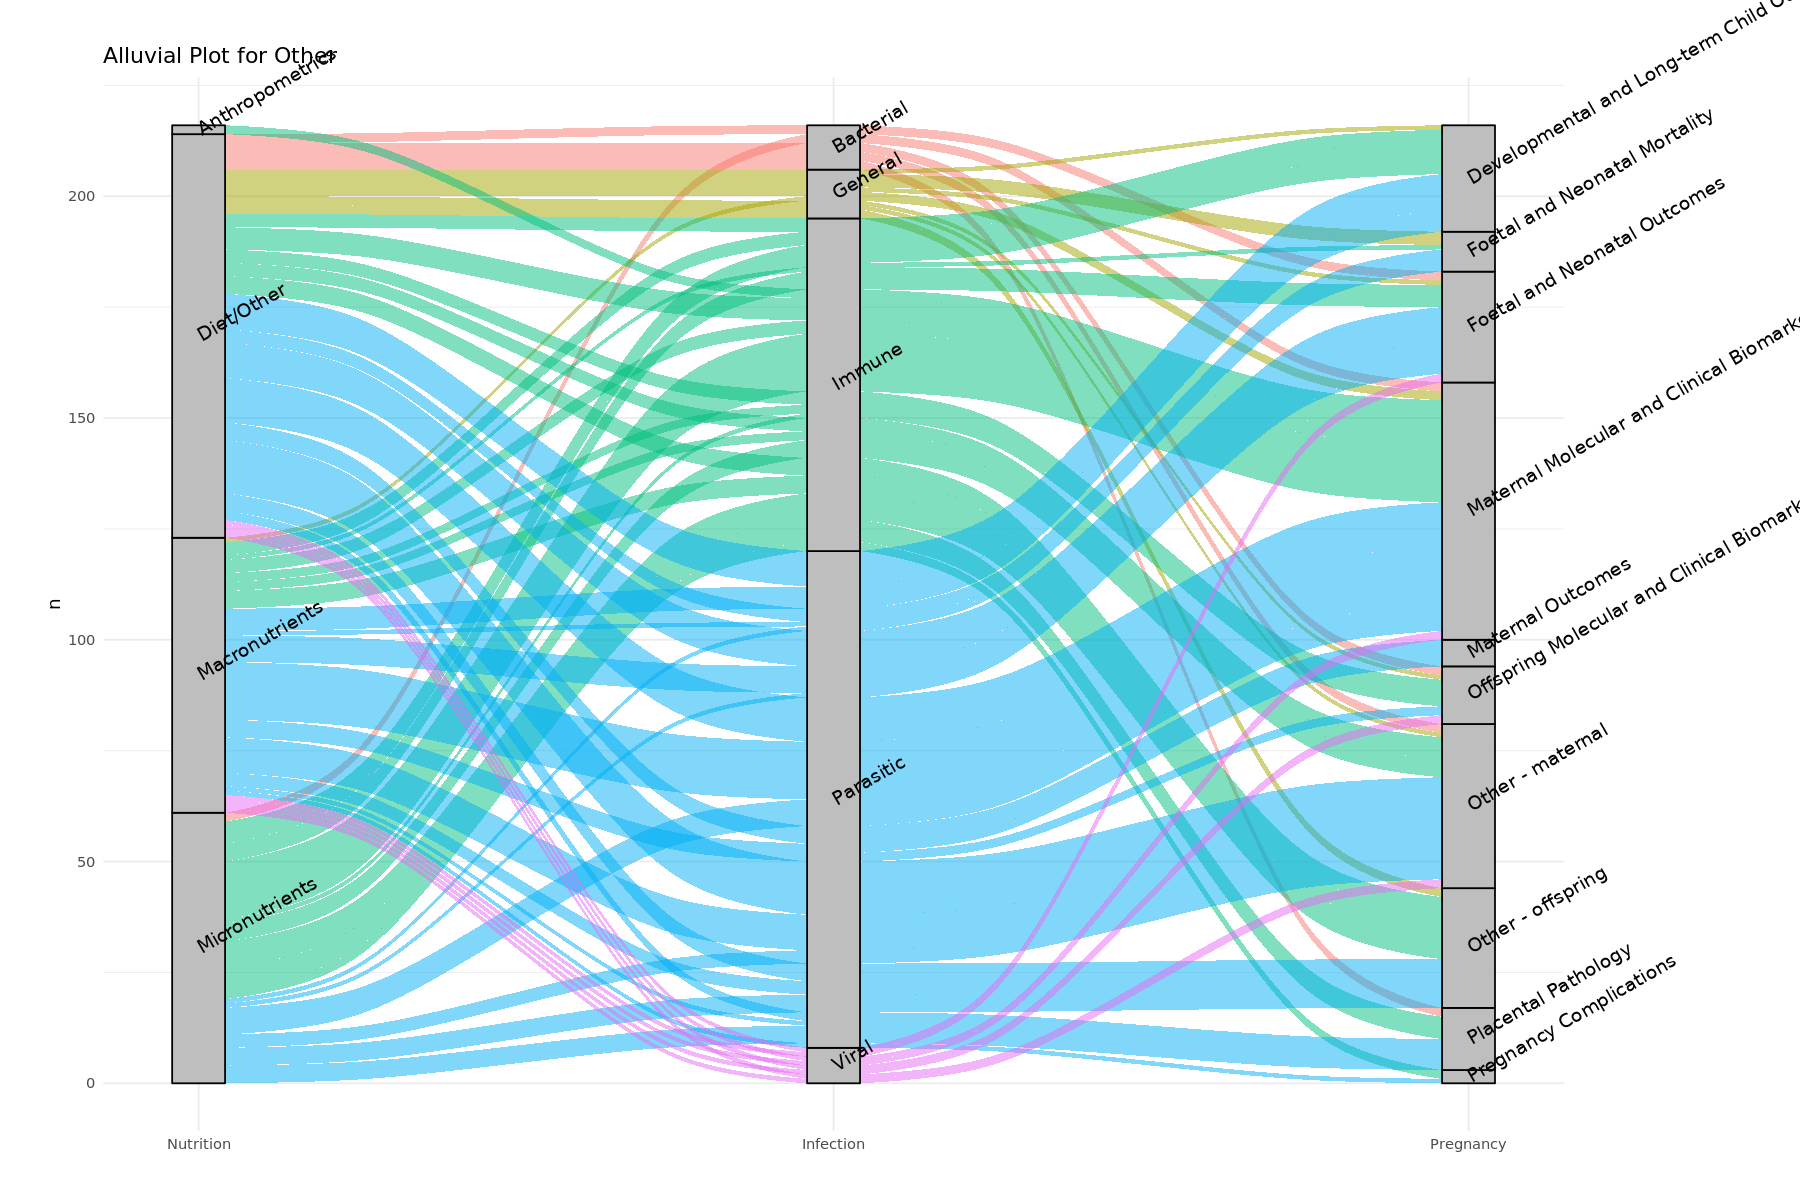

In [46]:
# Fill the alluvial plots by infection

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot three-level alluvial diagram
plot_alluvial <- function(data, title) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, PregCat)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = PregCat, y = n)) +
    geom_alluvium(aes(fill = InfCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 4, angle = 30, hjust = 0) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Pregnancy"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal() +
    theme(
        legend.position = "none",
        plot.margin = unit(c(1, 5, 1, 1), "cm")  # Increase right margin
) +
coord_cartesian(clip = "off")
  #print the labels beyond the extent of the figure
}

# Set the default width of figures in notebook
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")

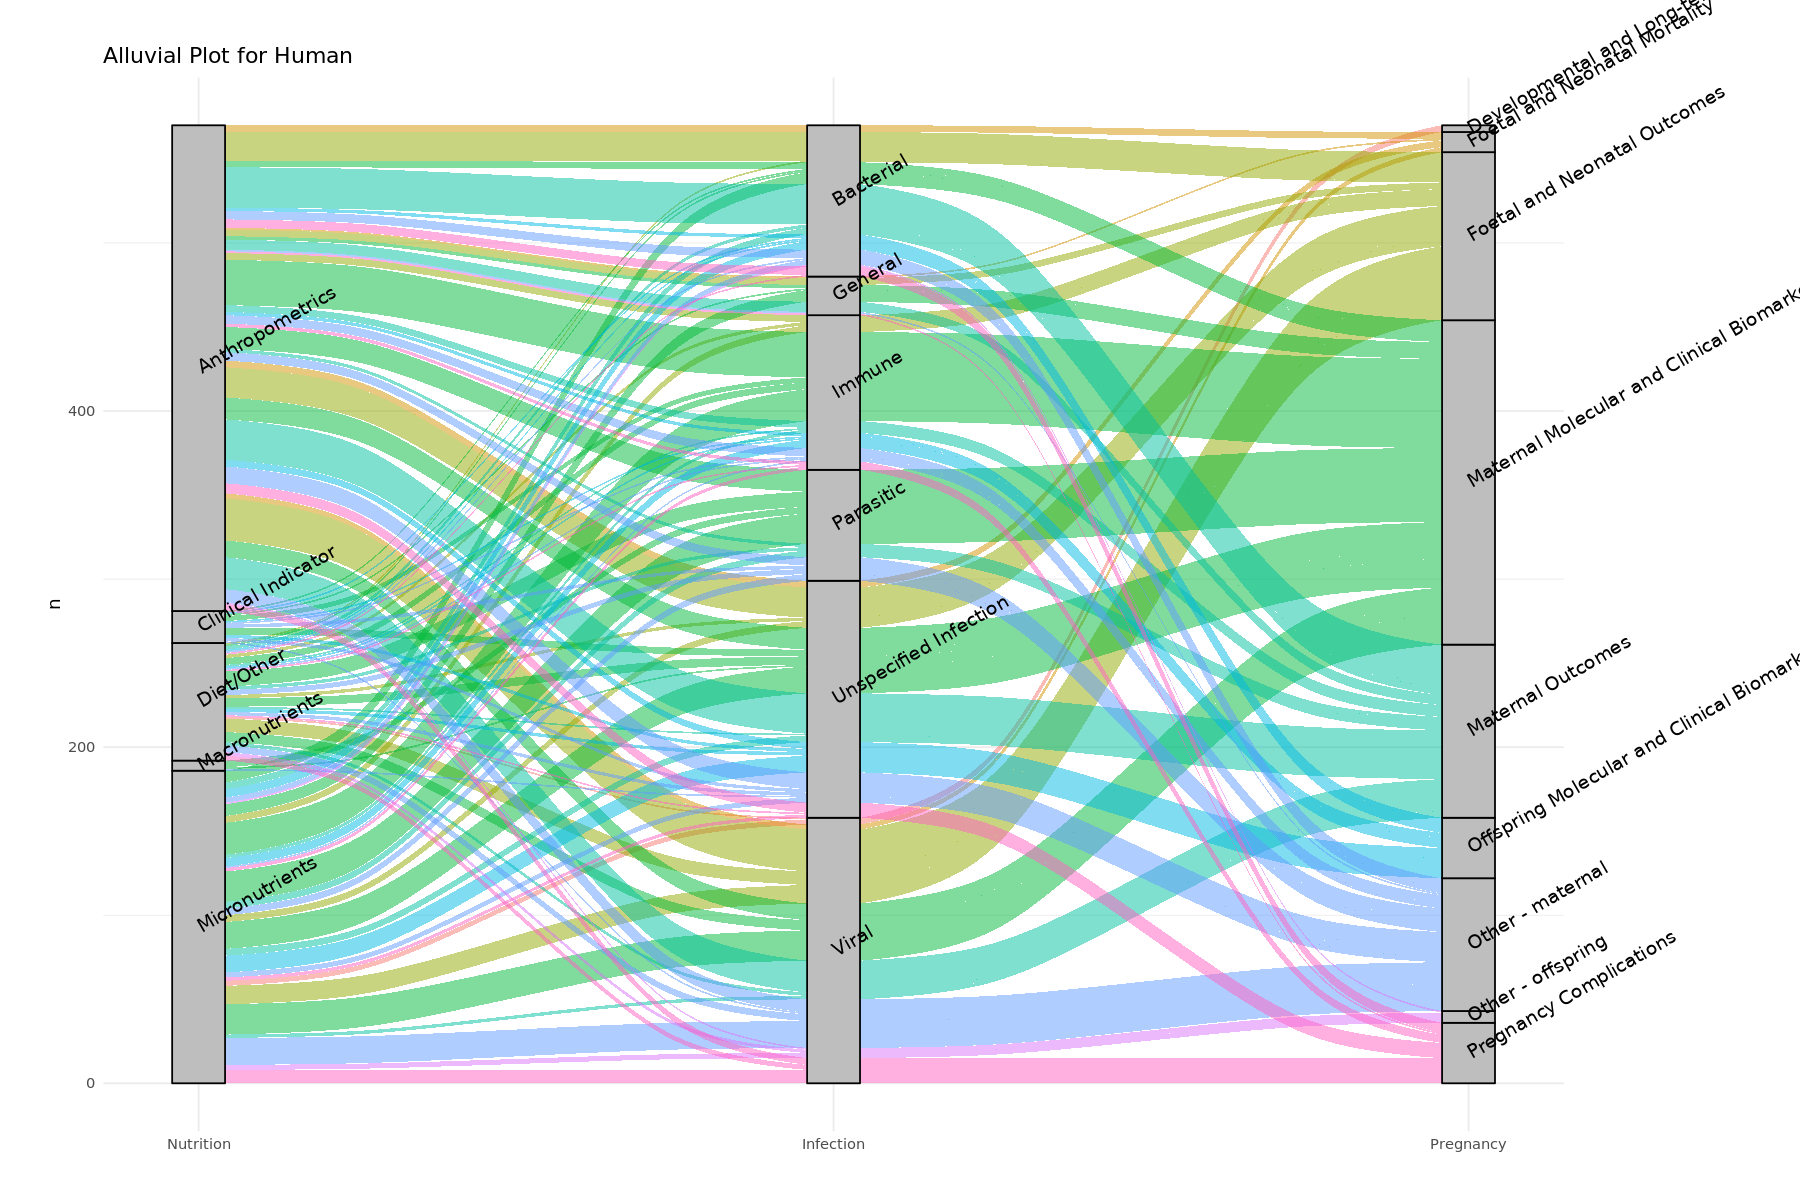

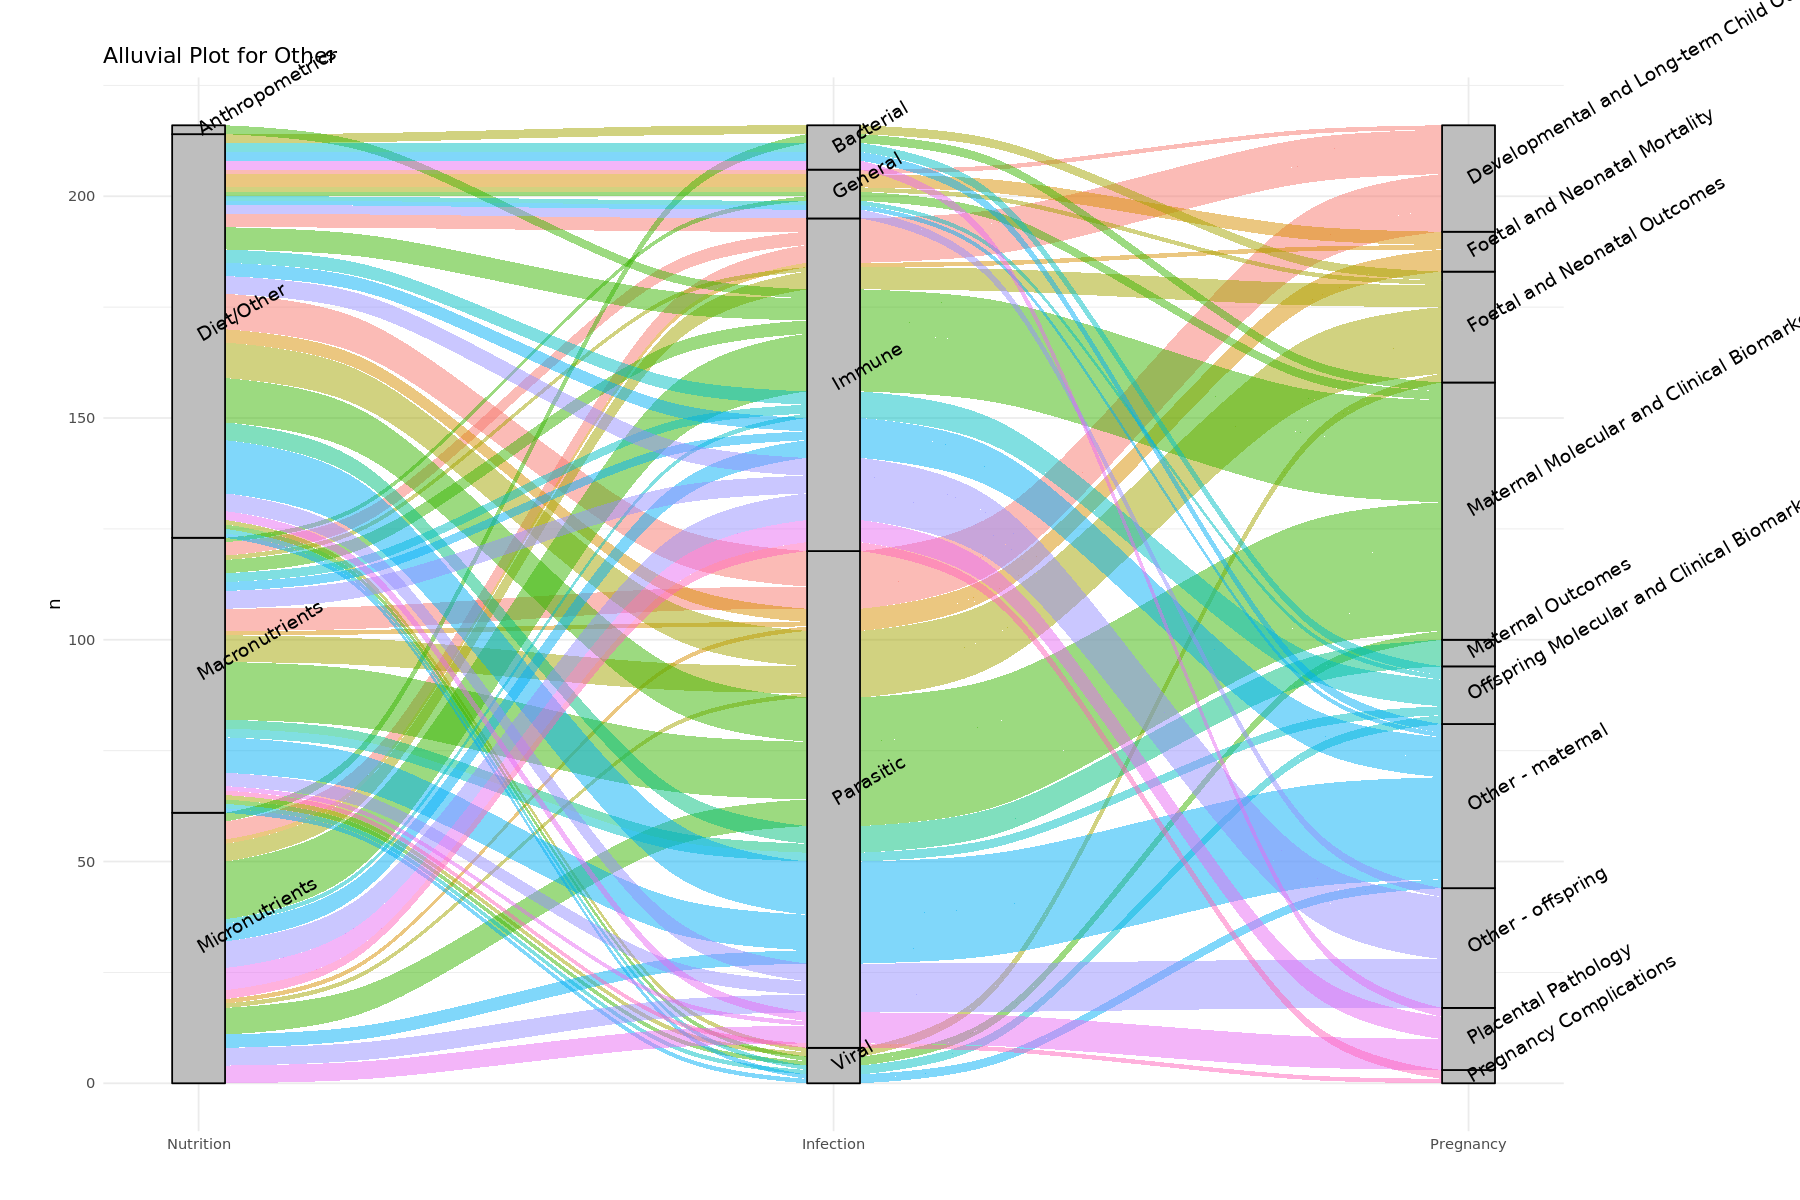

In [47]:
# Fill the alluvial plots by pregnancy outcome

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot three-level alluvial diagram
plot_alluvial <- function(data, title) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, PregCat)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = PregCat, y = n)) +
    geom_alluvium(aes(fill = PregCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 4, angle = 30, hjust = 0) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Pregnancy"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal() +
    theme(
        legend.position = "none",
        plot.margin = unit(c(1, 5, 1, 1), "cm")  # Increase right margin
) +
coord_cartesian(clip = "off")
  #print the labels beyond the extent of the figure
}

# Set the default width of figures in notebook
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")

## Direction and size of Effects



Choose a few papers to pull out the size and direction of effects. 

What combination of Inf x Nut? 

What data are we looking for? 

In [48]:
# How many papers have Parasite x Micronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Parasite x Micronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Parasite x Micronutrient interactions:")
length(unique(efsz_subset_other$studyRef))


[1] "Number of Human Type I studies investigating Parasite x Micronutrient interactions:"


[1] 2

[1] "Number of Other Type I studies investigating Parasite x Micronutrient interactions:"


[1] 4

In [49]:
# How many papers have Bacterial x Micronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Bacterial x Micronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Bacterial x Micronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Bacterial x Micronutrient interactions:"


[1] 4

[1] "Number of Other Type I studies investigating Bacterial x Micronutrient interactions:"


[1] 1

In [50]:
# How many papers have Viral x Micronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Micronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Viral x Micronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Viral x Micronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Viral x Micronutrient interactions:"


[1] 8

[1] "Number of Other Type I studies investigating Viral x Micronutrient interactions:"


[1] 0

In [51]:
# How many papers have Parasite x Anthropometrics for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Parasite x Anthropometrics interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Parasite x Anthropometrics interactions:")
length(unique(efsz_subset_other$studyRef))


[1] "Number of Human Type I studies investigating Parasite x Anthropometrics interactions:"


[1] 4

[1] "Number of Other Type I studies investigating Parasite x Anthropometrics interactions:"


[1] 0

In [52]:
# How many papers have Bacterial x Anthropometrics for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Bacterial x Anthropometrics interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Bacterial x Anthropometrics interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Bacterial x Anthropometrics interactions:"


[1] 7

[1] "Number of Other Type I studies investigating Bacterial x Anthropometrics interactions:"


[1] 0

In [53]:
# How many papers have Viral x Anthropometrics for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Anthropometrics", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Viral x Anthropometrics interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Viral x Anthropometrics interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Viral x Anthropometrics interactions:"


[1] 13

[1] "Number of Other Type I studies investigating Viral x Anthropometrics interactions:"


[1] 0

In [54]:
# How many papers have Parasitic x Macronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Parasitic", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Parasitic x Macronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Parasitic x Macronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Parasitic x Macronutrient interactions:"


[1] 1

[1] "Number of Other Type I studies investigating Parasitic x Macronutrient interactions:"


[1] 13

In [55]:
# How many papers have Bacterial x Macronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Bacterial", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Bacterial x Macronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Bacterial x Macronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Bacterial x Macronutrient interactions:"


[1] 0

[1] "Number of Other Type I studies investigating Bacterial x Macronutrient interactions:"


[1] 0

In [56]:
# How many papers have Viral x Macronutrients for Type I studies? 

efsz_subset_human <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Human", studyScore=="I")
efsz_subset_other <- datMetaNutInfPreg %>% filter(datMetaNutInfPreg$InfCat == "Viral", datMetaNutInfPreg$NutCat == "Macronutrients", speciesCat =="Other", studyScore=="I")

print("Number of Human Type I studies investigating Viral x Macronutrient interactions:")
length(unique(efsz_subset_human$studyRef))


print("Number of Other Type I studies investigating Viral x Macronutrient interactions:")
length(unique(efsz_subset_other$studyRef))

[1] "Number of Human Type I studies investigating Viral x Macronutrient interactions:"


[1] 0

[1] "Number of Other Type I studies investigating Viral x Macronutrient interactions:"


[1] 1

In [ ]:
## New data: Direction of effects

In [71]:
datEffect <- read.csv("tblStudyEffectSizeI_temp.csv", header=T)


head(datEffect)


studyRef   firstAuthor year species studyScore studyType sampleSize
1 1182475990 Akinbamijo  1994 Sheep   I                              
2 1182475990 Akinbamijo  1994 Sheep   I                              
3 1182475990 Akinbamijo  1994 Sheep   I                              
4 1182475990 Akinbamijo  1994 Sheep   I                              
5 1182477924 Phuapradit  1996 Human   I                              
6 1182475988 Osaer       1998 Sheep   I                              
  time_of_infection time_of_diet statistical_analysis control_infected
1                                                                     
2                                                                     
3                                                                     
4                                                                     
5                                                                     
6                                                                     
  medication directionOfEffects pregnancyOutcome                  
1                               Birth weight                      
2                               Growth                            
3                               Miscarriage / spontaneous abortion
4                               Other - maternal                  
5                               Biomarkers of immunity - maternal 
6                               Aemia - maternal                  
  Category                                  
1 Foetal and Neotal Outcomes                
2 Developmental and Long-term Child Outcomes
3 Foetal and Neotal Mortality               
4 Other - maternal                          
5 maternal Molecular and Clinical Biomarkers
6 maternal Outcomes

In [59]:
# join to our full data table: 
head(datMetaNutInfPreg)

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
2 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
3 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
4 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
5 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
6 1182475512 AS/SE      O'Higgins   2014 Human   Ireland      Both       
  studyScore nutritionType NutCat          infectionType       InfCat   
1 II         BMI           Anthropometrics Bacterial infection Bacterial
2 II         BMI           Anthropometrics Bacterial infection Bacterial
3 II         BMI           Anthropometrics Bacterial infection Bacterial
4 II         BMI           Anthropometrics Bacterial infection Bacterial
5 II         BMI           Anthropometrics Bacterial infection Bacterial
6 II         BMI           Anthropometrics Bacterial infection Bacterial
  pregnancyOutcomeType                      PregCat                     
1 Apgar score                               Foetal and Neonatal Outcomes
2 Birth weight                              Foetal and Neonatal Outcomes
3 Maternal mortality                        Maternal Outcomes           
4 Mode of delivery / caesarean section rate Maternal Outcomes           
5 Other - maternal                          Other - maternal            
6 Pre-term birth                            Pregnancy Complications     
  speciesCat
1 Human     
2 Human     
3 Human     
4 Human     
5 Human     
6 Human

In [72]:
#We're using only the Type I studies: 

df <- datMetaNutInfPreg %>% filter(studyScore=="I")
head(df)



# Step 1: Select only the columns you want from datEffect
datEffect_subset <- datEffect %>%
  select(studyRef, pregnancyOutcome, Category, studyType, sampleSize, time_of_infection, 
         time_of_diet, control_infected, medication, directionOfEffects)  

head(datEffect_subset)

#left join the two tables
datMetaNutInfPregEffect <- left_join(df, datEffect_subset, 
              by = c("studyRef" = "studyRef", "pregnancyOutcomeType" = "pregnancyOutcome", "PregCat" = "Category"))


head(datMetaNutInfPregEffect)

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
3 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
4 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
5 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
6 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
  studyScore nutritionType NutCat          infectionType InfCat
1 I          Iron          Micronutrients  LPS injection Immune
2 I          Iron          Micronutrients  LPS injection Immune
3 I          BMI           Anthropometrics Covid-19      Viral 
4 I          BMI           Anthropometrics Covid-19      Viral 
5 I          BMI           Anthropometrics Covid-19      Viral 
6 I          BMI           Anthropometrics Covid-19      Viral 
  pregnancyOutcomeType              PregCat                                   
1 Behavioural change                Developmental and Long-term Child Outcomes
2 Biomarkers of immunity - maternal Maternal Molecular and Clinical Biomarkers
3 Apgar score                       Foetal and Neonatal Outcomes              
4 Gestational age (Days/Weeks)      Foetal and Neonatal Outcomes              
5 Gestational age (Large or Small)  Foetal and Neonatal Outcomes              
6 Hospitalisation or ICU admission  Maternal Outcomes                         
  speciesCat
1 Other     
2 Other     
3 Human     
4 Human     
5 Human     
6 Human

studyRef   pregnancyOutcome                  
1 1182475990 Birth weight                      
2 1182475990 Growth                            
3 1182475990 Miscarriage / spontaneous abortion
4 1182475990 Other - maternal                  
5 1182477924 Biomarkers of immunity - maternal 
6 1182475988 Aemia - maternal                  
  Category                                   studyType sampleSize
1 Foetal and Neotal Outcomes                                     
2 Developmental and Long-term Child Outcomes                     
3 Foetal and Neotal Mortality                                    
4 Other - maternal                                               
5 maternal Molecular and Clinical Biomarkers                     
6 maternal Outcomes                                              
  time_of_infection time_of_diet control_infected medication directionOfEffects
1                                                                              
2                                                                              
3                                                                              
4                                                                              
5                                                                              
6

studyRef   assessedBy firstAuthor year species countryStudy mainOutcome
1 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
2 1182475095 AS         Harvey      2014 Rat     Canada       Offspring  
3 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
4 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
5 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
6 1182475268 AS         Mihajlovic  2023 Human   Serbia       Both       
  studyScore nutritionType NutCat          ⋯ pregnancyOutcomeType             
1 I          Iron          Micronutrients  ⋯ Behavioural change               
2 I          Iron          Micronutrients  ⋯ Biomarkers of immunity - maternal
3 I          BMI           Anthropometrics ⋯ Apgar score                      
4 I          BMI           Anthropometrics ⋯ Gestational age (Days/Weeks)     
5 I          BMI           Anthropometrics ⋯ Gestational age (Large or Small) 
6 I          BMI           Anthropometrics ⋯ Hospitalisation or ICU admission 
  PregCat                                    speciesCat studyType sampleSize
1 Developmental and Long-term Child Outcomes Other                          
2 Maternal Molecular and Clinical Biomarkers Other      NA        NA        
3 Foetal and Neonatal Outcomes               Human      NA        NA        
4 Foetal and Neonatal Outcomes               Human      NA        NA        
5 Foetal and Neonatal Outcomes               Human      NA        NA        
6 Maternal Outcomes                          Human      NA        NA        
  time_of_infection time_of_diet control_infected medication directionOfEffects
1                                                                              
2 NA                NA           NA               NA         NA                
3 NA                NA           NA               NA         NA                
4 NA                NA           NA               NA         NA                
5 NA                NA           NA               NA         NA                
6 NA                NA           NA               NA         NA

In [ ]:
# Plot 1: 
